# AlphaPept Systems Check

This notebook will run several tests and compare the performance to MaxQuant. Depending on the machine, this can take several hours.
Each run is called via the `test_ci.py` script, which downloads files to a temporary folder which can be specified in this file.

This notebook requires the `matplotlib_venn` (`!pip install matplotlib_venn`) package.

## Reference Data

Download MaxQuant reference files. Referance MaxQuant data from `PXD006109` and `PXD010012` were taken from the paper, the others were analyzed with `MaxQuant_1.6.14`, default settings w/o second peptides and provided with the given contaminants file.

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import test_ci

try:
    import wget
except ImportError:
    !pip install wget
    import wget
    
FILE_DICT = {}
#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/1E2G1IwgcgdsCHC/download' #OLD MQ FILES
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/Fn2uxeYNL60JSd3/download'

#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/vMNferEoSoROJbb/download' #AP Files
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/KLBotZbodMByigh/download'

FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/fLhxQ8mVb29x9xH/download'
FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/BkMMHPregCQgKLg/download'
FILE_DICT['PXD010012_ref.txt'] = 'https://datashare.biochem.mpg.de/s/ps226k7Fme1K0jf/download'
FILE_DICT['PXD010012_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/pyhKMrytjdDU2sX/download'
FILE_DICT['bruker_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/fRcoGuwlcbH2SBJ/download'
FILE_DICT['thermo_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/p4Omj9K5hHmSoDl/download'

tmp_folder = os.path.join(os.getcwd(),'temp/')


BASE_DIR = os.path.join(tmp_folder , 'test_files/') # Storarge location for test files
TEST_DIR = os.path.join(tmp_folder, 'test_temp/')
ARCHIVE_DIR = os.path.join(tmp_folder, ' test_archive/')

MONGODB_USER = 'github_actions'
MONGODB_URL = 'ci.yue0n.mongodb.net/'

if not os.path.isdir(tmp_folder):
    os.mkdir(tmp_folder)


test_ci.config_test_paths(BASE_DIR, TEST_DIR, ARCHIVE_DIR, MONGODB_USER, MONGODB_URL)

for file in FILE_DICT:
    target = os.path.join(tmp_folder, file)
    if not os.path.isfile(target):
        wget.download(FILE_DICT[file], target)
        
software_1 = 'AlphaPept'
software_2 = 'MaxQuant'

## Single Files

Compare to the single HeLa test files

### Thermo IRT

In [2]:
%run -i ../test_ci.py $tmp_folder thermo_irt

2021-08-26 12:12:02> Logging to C:\Users\admin\alphapept\logs\log_20210826121202.txt.
2021-08-26 12:12:02> Platform information:
2021-08-26 12:12:02> system     - Windows
2021-08-26 12:12:02> release    - 10
2021-08-26 12:12:02> version    - 10.0.18363
2021-08-26 12:12:02> machine    - AMD64
2021-08-26 12:12:02> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-08-26 12:12:02> cpu count  - 24
2021-08-26 12:12:02> ram memory - 122.2/127.7 Gb (available/total)
2021-08-26 12:12:02> 
2021-08-26 12:12:02> Python information:
2021-08-26 12:12:02> SQLAlchemy       - 1.3.22
2021-08-26 12:12:02> alphapept        - 0.3.28
2021-08-26 12:12:02> biopython        - 1.78
2021-08-26 12:12:02> click            - 7.1.2
2021-08-26 12:12:02> comtypes         - 1.1.7
2021-08-26 12:12:02> fastcore         - 1.3.21
2021-08-26 12:12:02> h5py             - 3.1.0
2021-08-26 12:12:02> lxml             - 4.6.2
2021-08-26 12:12:02> matplotlib       - 3.3.3
2021-08-26 12:12:02> networkx         -

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:12:03> FASTA contains 247 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:28<00:00, 28.87s/it]

2021-08-26 12:12:32> Digested 247 proteins and generated 50,840 spectra
2021-08-26 12:12:32> Database saved to F:\develop\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 0.02 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:12:32> Processing 1 files for step raw_conversion
2021-08-26 12:12:32> File F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT has extension .raw - converting from Thermo.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:30<00:00, 30.22s/it]


2021-08-26 12:12:36> File conversion complete. Extracted 2,603 precursors.
2021-08-26 12:12:36> File conversion of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:12:40> Processing 1 files for step find_features
2021-08-26 12:12:40> No *.hdf file with features found for F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf. Adding to feature finding list.
2021-08-26 12:12:40> Feature finding on F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT.raw
2021-08-26 12:12:40> Hill extraction with centroid_tol 8 and max_gap 2
2021-08-26 12:12:43> Number of hills 45,516, len = 20.18
2021-08-26 12:12:43> Repeating hill extraction with centroid_tol 5.10
2021-08-26 12:12:44> Number of hills 52,919, len = 21.29
2021-08-26 12:12:50> After split hill_ptrs 79,545
2021-08-26 12:12:51> After filter hill_ptrs 77,220
2021-08-26 12:13:04> Extracting hill stats complete
2021-08-26 12:13:07> Found 7,527 pre isotope patterns.
2021-08-26 12:13:22> Extracted 7,607 isotope patterns.
2021-08-26 12:13:28> Report complete.
2021-08-26 12:13:28> Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:13:29> Starting first search.
2021-08-26 12:13:29> Processing 1 files for step search_db
2021-08-26 12:13:29> Calibrating fragments
2021-08-26 12:13:31> Performing search on 3,225 query and 50,840 db entries with frag_tol = 30.00 and prec_tol = 30.00.


  0%|                                                                                            | 0/1 [00:51<?, ?it/s]


2021-08-26 12:13:32> Found 71 psms.
2021-08-26 12:13:32> Extracting columns for scoring.
2021-08-26 12:13:38> Extracted columns from 71 spectra.
2021-08-26 12:13:38> Saving first_search results to F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2021-08-26 12:13:38> Search of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2021-08-26 12:13:38> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:13:38> Processing 1 files for step calibrate_hdf
2021-08-26 12:13:38> Scoring using X-Tandem
2021-08-26 12:13:38> 20 target (0 decoy) of 31 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.01)
2021-08-26 12:13:38> Not enough data points present. Skipping recalibration.
2021-08-26 12:13:38> Calibration of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf complete.
2021-08-26 12:13:38> Calibrating fragments
2021-08-26 12:13:38> Median fragment offset 1.18 - std 14.40 ppm - mad 10.37 ppm




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:13:38> Starting second search with DB.
2021-08-26 12:13:38> Processing 1 files for step search_db
2021-08-26 12:13:38> Found calibrated prec_tol with value 5.29
2021-08-26 12:13:38> Found calibrated frag_tol with value 31.10
2021-08-26 12:13:39> Performing search on 3,225 query and 50,840 db entries with frag_tol = 31.10 and prec_tol = 5.29.


  0%|                                                                                            | 0/1 [00:01<?, ?it/s]


2021-08-26 12:13:40> Found 62 psms.
2021-08-26 12:13:40> Extracting columns for scoring.
2021-08-26 12:13:45> Extracted columns from 62 spectra.
2021-08-26 12:13:45> Saving second_search results to F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2021-08-26 12:13:45> Search of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2021-08-26 12:13:46> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:13:46> Processing 1 files for step score_hdf
2021-08-26 12:13:46> Found second search psms for scoring.
2021-08-26 12:13:46> Last q_value 0.000 of dataset is smaller than fdr_level 0.100
2021-08-26 12:13:46> 26 target (0 decoy) of 26 PSMs. fdr 0.000000 for a cutoff of 15.12 (set fdr was 0.1)
2021-08-26 12:13:46> The total number of available decoys is lower than the initial set of high scoring targets.
2021-08-26 12:13:46> ML failed. Defaulting to x_tandem score
2021-08-26 12:13:46> There are fewer high scoring targets or decoys than required by 'min_train'.
2021-08-26 12:13:46> Converting x_tandem score to probabilities
2021-08-26 12:13:46> Filter df with custom score
2021-08-26 12:13:46> Global FDR on precursor
2021-08-26 12:13:46> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2021-08-26 12:13:46> 24 target (0 decoy) of 24 PSMs. fdr 0.000000 for a cutoff of 0.02 (set fdr was 0.01)
2021-08-26 12:13:46> FDR on peptides complete. For 0.01 FDR found 26 targe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:13:46> Fasta dict with length 247, Pept dict with length 50,842
2021-08-26 12:13:46> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-08-26 12:13:47> A total of 18 unique and 1 shared peptides.
2021-08-26 12:13:47> A total of 1 ambigious proteins
2021-08-26 12:13:47> A total of 0 unique and 0 shared peptides.
2021-08-26 12:13:47> A total of 0 ambigious proteins
2021-08-26 12:13:47> Global FDR on protein_group
2021-08-26 12:13:47> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2021-08-26 12:13:47> 5 target (0 decoy) of 5 PSMs. fdr 0.000000 for a cutoff of 0.03 (set fdr was 0.01)
2021-08-26 12:13:47> FDR on proteins complete. For 0.01 FDR found 26 targets and 0 decoys. A total of 5 proteins found.
2021-08-26 12:13:47> Saving complete.
2021-08-26 12:13:47> Protein groups complete.
2021-08-26 12:13:47> Complete. 
2021-08-26 12:13:47> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx', 'n_possible_proteins'],
      dtype='object')]

  pytables.to_hdf(

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:13:47> LFQ complete.
2021-08-26 12:13:47> Extracting protein_summary
2021-08-26 12:13:47> Saved protein_summary of length 5 saved to F:\develop\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-08-26 12:13:47> Exporting as csv.
2021-08-26 12:13:47> Saved df of length 26 saved to F:\develop\alphapept\sandbox\temp\test_temp\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.21it/s]


2021-08-26 12:13:47> Settings saved to F:\develop\alphapept\sandbox\temp\test_temp\results.yaml
2021-08-26 12:13:47> Analysis complete.


### Thermo HeLa

In [3]:
%run -i ../test_ci.py $tmp_folder thermo_hela

2021-08-26 12:13:47> Creating dir F:\develop\alphapept\sandbox\temp/test_temp.
2021-08-26 12:13:49> Using Python version for testing
2021-08-26 12:13:49> Logging to C:\Users\admin\alphapept\logs\log_20210826121349.txt.
2021-08-26 12:13:49> Platform information:
2021-08-26 12:13:49> system     - Windows
2021-08-26 12:13:49> release    - 10
2021-08-26 12:13:49> version    - 10.0.18363
2021-08-26 12:13:49> machine    - AMD64
2021-08-26 12:13:49> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-08-26 12:13:49> cpu count  - 24
2021-08-26 12:13:49> ram memory - 118.9/127.7 Gb (available/total)
2021-08-26 12:13:49> 
2021-08-26 12:13:49> Python information:
2021-08-26 12:13:49> SQLAlchemy       - 1.3.22
2021-08-26 12:13:49> alphapept        - 0.3.28
2021-08-26 12:13:49> biopython        - 1.78
2021-08-26 12:13:49> click            - 7.1.2
2021-08-26 12:13:49> comtypes         - 1.1.7
2021-08-26 12:13:49> fastcore         - 1.3.21
2021-08-26 12:13:49> h5py             - 3.1.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:13:50> FASTA contains 36,789 entries.


  0%|                                                                                            | 0/1 [01:29<?, ?it/s]

  3%|█▋                                                              | 0.02702702702702703/1 [01:26<51:56, 3202.59s/it]
  5%|███▍                                                            | 0.05405405405405406/1 [01:28<21:28, 1361.66s/it]
  8%|█████▎                                                           | 0.08108108108108109/1 [01:30<11:44, 766.93s/it]
 11%|███████                                                          | 0.10810810810810811/1 [01:32<07:21, 495.38s/it]
 14%|████████▊                                                        | 0.13513513513513514/1 [01:33<04:50, 336.24s/it]
 16%|██████████▌                                                      | 0.16216216216216217/1 [01:35<03:21, 240.04s/it]
 19%|████████████▍                                                     | 0.1891891891891892/1 [01:36<02:24, 177.91s/it]
 22%|██████████████                    

2021-08-26 12:16:24> Digested 36,789 proteins and generated 9,107,982 spectra
2021-08-26 12:17:48> Database saved to F:\develop\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.42 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:18:03> Processing 1 files for step raw_conversion
2021-08-26 12:18:03> File F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-08-26 12:20:15> File conversion complete. Extracted 120,226 precursors.
2021-08-26 12:20:16> File conversion of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:20:16> Processing 1 files for step find_features
2021-08-26 12:20:16> No *.hdf file with features found for F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-08-26 12:20:17> Feature finding on F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-08-26 12:20:17> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [02:18<?, ?it/s]


2021-08-26 12:20:23> Number of hills 1,105,353, len = 17.35
2021-08-26 12:20:23> Repeating hill extraction with centroid_tol 5.87
2021-08-26 12:20:29> Number of hills 1,227,331, len = 19.44
2021-08-26 12:20:49> After split hill_ptrs 1,635,903
2021-08-26 12:20:50> After filter hill_ptrs 1,585,989
2021-08-26 12:23:58> Extracting hill stats complete


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [10:26<00:00, 626.05s/it]


2021-08-26 12:24:20> Found 190,099 pre isotope patterns.
2021-08-26 12:27:47> Extracted 234,728 isotope patterns.
2021-08-26 12:27:50> Report complete.
2021-08-26 12:27:50> Matching features to query data.
2021-08-26 12:27:52> Saving feature table.
2021-08-26 12:27:52> Feature table saved to F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-08-26 12:27:52> Saving features.
2021-08-26 12:27:52> Feature finding of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:27:52> Starting first search.
2021-08-26 12:27:52> Processing 1 files for step search_db
2021-08-26 12:27:53> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-08-26 12:28:11> Performing search on 260,622 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2021-08-26 12:28:27> Found 961,105 psms.
2021-08-26 12:28:28> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [08:33<?, ?it/s]


2021-08-26 12:30:39> Extracted columns from 961,105 spectra.
2021-08-26 12:30:40> Saving first_search results to F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-08-26 12:30:44> Search of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2021-08-26 12:31:15> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:31:16> Processing 1 files for step calibrate_hdf
2021-08-26 12:31:18> Scoring using X-Tandem
2021-08-26 12:31:20> 39,754 target (397 decoy) of 120081 PSMs. fdr 0.009986 for a cutoff of 27.00 (set fdr was 0.01)
2021-08-26 12:31:23> Calibration of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-08-26 12:31:23> Calibrating fragments
2021-08-26 12:31:25> Median fragment offset -6.14 - std 13.77 ppm - mad 7.62 ppm




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:31:25> Starting second search with DB.
2021-08-26 12:31:25> Processing 1 files for step search_db
2021-08-26 12:31:25> Found calibrated prec_tol with value 6.09
2021-08-26 12:31:25> Found calibrated frag_tol with value 22.87
2021-08-26 12:31:28> Performing search on 260,622 query and 9,107,982 db entries with frag_tol = 22.87 and prec_tol = 6.09.


  0%|                                                                                            | 0/1 [00:12<?, ?it/s]


2021-08-26 12:31:32> Found 686,610 psms.
2021-08-26 12:31:32> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [03:59<?, ?it/s]


2021-08-26 12:32:59> Extracted columns from 686,610 spectra.
2021-08-26 12:33:00> Saving second_search results to F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-08-26 12:33:02> Search of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2021-08-26 12:33:31> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:33:32> Processing 1 files for step score_hdf
2021-08-26 12:33:33> Found second search psms for scoring.
2021-08-26 12:33:44> 66,562 target (6,656 decoy) of 108612 PSMs. fdr 0.099997 for a cutoff of 20.52 (set fdr was 0.1)
2021-08-26 12:33:44> Training & cross-validation on 14307 targets and 14307 decoys
2021-08-26 12:34:06> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-08-26 12:34:06> The train accuracy was 0.952505766408052
2021-08-26 12:34:06> Testing on 57228 targets and 57228 decoys
2021-08-26 12:34:07> The test accuracy was 0.9173743622003215
2021-08-26 12:34:07> Top features {'x_tandem': 0.24663002886000013, 'y_hits': 0.22311290052649838, 'hits': 0.16233626606884993, 'matched_ion_fraction': 0.0763463120142824, 'n_ions': 0.05549601959519501, 'matched_int_ratio': 0.03966382446068992, 'n_missed': 0.027407288503770767, 'matched_int': 0.023541643434832674, 'b_hits': 0.014032310645024462, 'dist': 0.008

  0%|                                                                                            | 0/1 [03:03<?, ?it/s]


2021-08-26 12:34:36> Extracting ions complete.
2021-08-26 12:34:36> Scoring of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-08-26 12:34:36> Only 1 dataset present. Skipping alignment.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:34:36> Fasta dict with length 36,789, Pept dict with length 9,107,988
2021-08-26 12:34:36> Extracting protein groups.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-08-26 12:34:36> A total of 44,103 unique and 2,962 shared peptides.
2021-08-26 12:34:38> A total of 914 ambigious proteins
2021-08-26 12:34:38> A total of 506 unique and 33 shared peptides.
2021-08-26 12:34:38> A total of 33 ambigious proteins
2021-08-26 12:34:38> Global FDR on protein_group
2021-08-26 12:34:38> 5,867 target (58 decoy) of 7178 PSMs. fdr 0.009886 for a cutoff of 0.98 (set fdr was 0.01)
2021-08-26 12:34:39> FDR on proteins complete. For 0.01 FDR found 54,163 targets and 60 decoys. A total of 5,925 proteins found.
2021-08-26 12:34:41> Saving complete.
2021-08-26 12:34:41> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-08-26 12:34:41> Complete. 
2021-08-26 12:34:41> Starting profile extraction.



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.89it/s]

2021-08-26 12:34:42> LFQ complete.
2021-08-26 12:34:42> Extracting protein_summary
2021-08-26 12:34:42> Saved protein_summary of length 5,925 saved to F:\develop\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-08-26 12:34:42> Exporting as csv.
2021-08-26 12:34:44> Saved df of length 54,223 saved to F:\develop\alphapept\sandbox\temp\test_temp\results
2021-08-26 12:34:48> Settings saved to F:\develop\alphapept\sandbox\temp\test_temp\results.yaml
2021-08-26 12:34:48> Analysis complete.


In [4]:
try:
    import matplotlib_venn
except ModuleNotFoundError:
    !pip install matplotlib_venn
    import matplotlib_venn

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.46s/it]


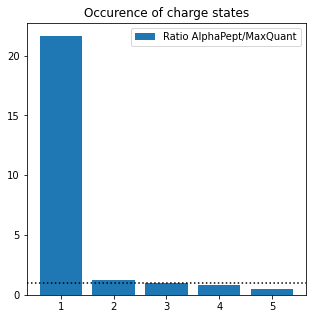

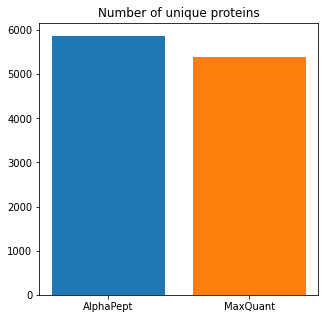

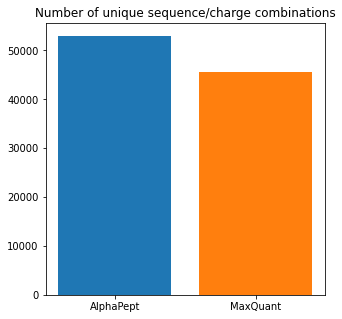

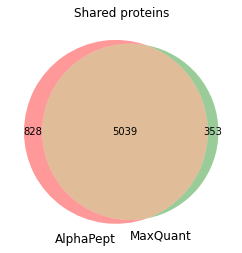

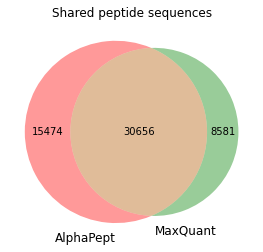

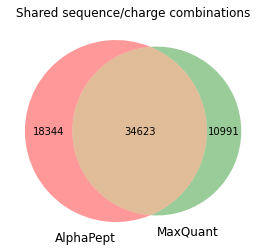

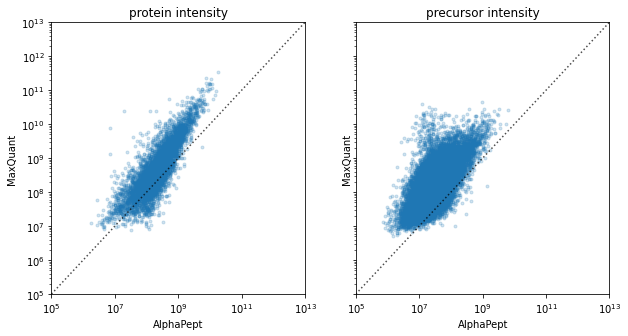

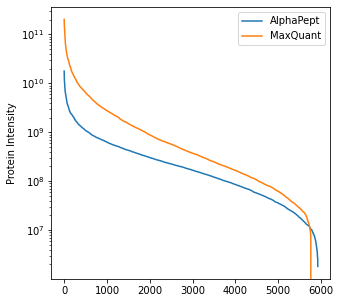

In [5]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'thermo_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Calling custom steps of the pipeline

Work with already processed results and call individual steps

--- ML ---
2021-08-26 12:35:04> 66,562 target (6,656 decoy) of 108612 PSMs. fdr 0.099997 for a cutoff of 20.52 (set fdr was 0.1)
2021-08-26 12:35:05> Training & cross-validation on 14307 targets and 14307 decoys
2021-08-26 12:35:24> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-08-26 12:35:24> The train accuracy was 0.952505766408052
2021-08-26 12:35:24> Testing on 57228 targets and 57228 decoys
2021-08-26 12:35:25> The test accuracy was 0.9173743622003215
2021-08-26 12:35:25> Top features {'x_tandem': 0.24663002886000013, 'y_hits': 0.22311290052649838, 'hits': 0.16233626606884993, 'matched_ion_fraction': 0.0763463120142824, 'n_ions': 0.05549601959519501, 'matched_int_ratio': 0.03966382446068992, 'n_missed': 0.027407288503770767, 'matched_int': 0.023541643434832674, 'b_hits': 0.014032310645024462, 'dist': 0.008977044877133668, 'b-H2O_hits': 0.008734498008231905, 'prec_offset_ppm': 0.008463048553032872, 'int_apex': 0

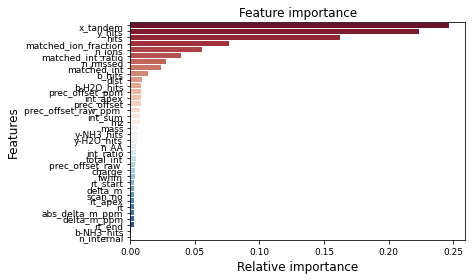

2021-08-26 12:35:26> Filter df with x_tandem score
2021-08-26 12:35:32> Global FDR on precursor
2021-08-26 12:35:33> 53,907 target (539 decoy) of 105256 PSMs. fdr 0.009999 for a cutoff of 0.85 (set fdr was 0.01)


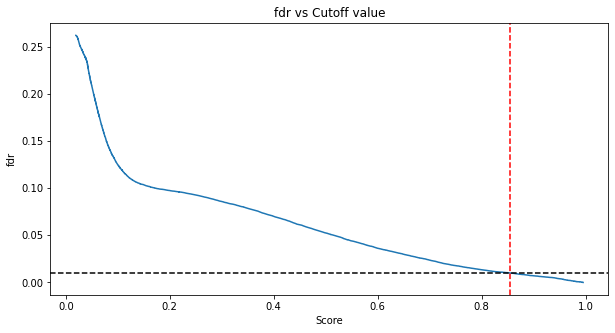

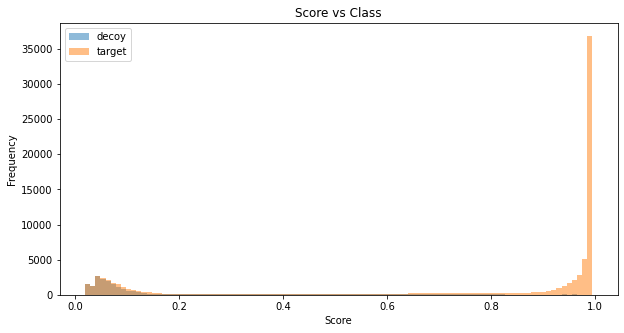

--- x! ---
2021-08-26 12:35:34> Filter df with x_tandem score
2021-08-26 12:35:34> Global FDR on precursor
2021-08-26 12:35:34> Last q_value 0.010 of dataset is smaller than fdr_level 0.010
2021-08-26 12:35:34> 53,907 target (539 decoy) of 54446 PSMs. fdr 0.009999 for a cutoff of 20.56 (set fdr was 0.01)


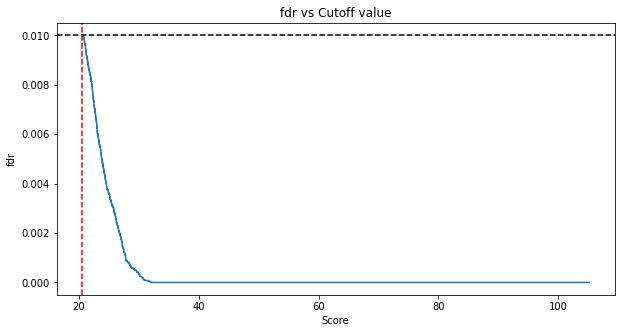

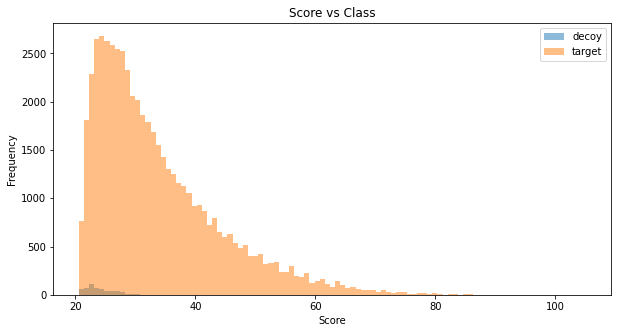

In [6]:
import alphapept.io
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'thermo_HeLa.ms_data.hdf'))

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

print('--- ML ---')
cv, features = train_RF(df, plot=True)
df = filter_with_ML(df, cv, features = features)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

print('--- x! ---')
df = filter_with_x_tandem(df)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

# Quantification Test

This notebook will run `PXD006109` and `PXD010012` and compare the quantificaiton performance.

## PXD006109

In [7]:
%run -i ../test_ci.py $tmp_folder PXD006109 
#test_ci.main(runtype="PXD006109", new_files=False)

2021-08-26 12:35:36> Creating dir F:\develop\alphapept\sandbox\temp/test_temp.
2021-08-26 12:35:42> Using Python version for testing
2021-08-26 12:35:42> Logging to C:\Users\admin\alphapept\logs\log_20210826123542.txt.
2021-08-26 12:35:42> Platform information:
2021-08-26 12:35:42> system     - Windows
2021-08-26 12:35:42> release    - 10
2021-08-26 12:35:42> version    - 10.0.18363
2021-08-26 12:35:42> machine    - AMD64
2021-08-26 12:35:42> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-08-26 12:35:42> cpu count  - 24
2021-08-26 12:35:42> ram memory - 111.6/127.7 Gb (available/total)
2021-08-26 12:35:42> 
2021-08-26 12:35:42> Python information:
2021-08-26 12:35:42> SQLAlchemy       - 1.3.22
2021-08-26 12:35:42> alphapept        - 0.3.28
2021-08-26 12:35:42> biopython        - 1.78
2021-08-26 12:35:42> click            - 7.1.2
2021-08-26 12:35:42> comtypes         - 1.1.7
2021-08-26 12:35:42> fastcore         - 1.3.21
2021-08-26 12:35:42> h5py             - 3.1.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:35:43> FASTA contains 43,752 entries.



  2%|█▍                                                             | 0.022727272727272728/1 [01:02<45:00, 2763.23s/it]
  5%|██▊                                                            | 0.045454545454545456/1 [01:03<18:15, 1148.11s/it]
  7%|████▍                                                            | 0.06818181818181818/1 [01:04<10:09, 653.60s/it]
  9%|█████▉                                                           | 0.09090909090909091/1 [01:14<08:27, 558.62s/it]
 11%|███████▍                                                         | 0.11363636363636363/1 [01:27<08:26, 571.82s/it]
 14%|████████▊                                                        | 0.13636363636363635/1 [01:29<05:48, 403.35s/it]
 16%|██████████▌                                                       | 0.1590909090909091/1 [01:30<04:07, 293.85s/it]
 18%|███████████▊                                                     | 0.18181818181818182/1 [01:32<03:03, 224.18s/it]
 20%|█████████████▎                    

2021-08-26 12:38:02> Digested 43,752 proteins and generated 6,163,992 spectra
2021-08-26 12:39:01> Database saved to F:\develop\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.33 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:39:12> Processing 6 files for step raw_conversion
2021-08-26 12:39:12> AlphaPool was set to 24 processes. Setting max to 24.


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:26<00:32, 98.44s/it]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:40:38> Processing 6 files for step find_features
2021-08-26 12:40:38> Setting Process limit to 15
2021-08-26 12:40:38> AlphaPool was set to 15 processes. Setting max to 15.




 17%|██████████▋                                                     | 0.16666666666666666/1 [06:48<34:01, 2450.11s/it]

 50%|████████████████████████████████████████▌                                        | 0.5/1 [07:03<05:34, 669.41s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:47:42> Starting first search.
2021-08-26 12:47:42> Processing 6 files for step search_db
2021-08-26 12:47:42> Searching. Setting Process limit to 15.
2021-08-26 12:47:42> AlphaPool was set to 15 processes. Setting max to 15.





 17%|██████████▊                                                      | 0.16666666666666666/1 [01:45<08:46, 631.72s/it]


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [10:23<00:00, 623.18s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:56<00:00, 536.86s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [13:59<00:00, 839.05s/it]


2021-08-26 12:49:52> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:49:52> Processing 6 files for step calibrate_hdf
2021-08-26 12:49:52> AlphaPool was set to 24 processes. Setting max to 24.


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [00:16<00:06, 18.93s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:50:09> Starting second search with DB.
2021-08-26 12:50:09> Processing 6 files for step search_db
2021-08-26 12:50:09> Searching. Setting Process limit to 14.
2021-08-26 12:50:09> AlphaPool was set to 14 processes. Setting max to 14.



 17%|██████████▊                                                      | 0.16666666666666666/1 [00:48<04:01, 289.31s/it]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:13<00:00, 73.20s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:25<00:00, 205.94s/it]


2021-08-26 12:51:23> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:51:24> Processing 6 files for step score_hdf
2021-08-26 12:51:24> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:48<00:00, 168.66s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:08<00:00, 248.47s/it]


2021-08-26 12:54:24> Total deviation before calibration {'mz': 3.9972094687188935e-06, 'rt': 7.620102202020163}
2021-08-26 12:54:24> Mean deviation before calibration {'mz': 2.6648063124792623e-07, 'rt': 0.5080068134680109}
2021-08-26 12:54:24> Solving equation system
2021-08-26 12:54:24> Regression score is 0.9998041287723785
2021-08-26 12:54:24> Solving equation system complete.
2021-08-26 12:54:24> Applying offset
2021-08-26 12:54:24> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.ms_data.hdf - peptide_fdr.
2021-08-26 12:54:24> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.ms_data.hdf - feature_table.
2021-08-26 12:54:24> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.ms_data.hdf - peptide_fdr.
2021-08-26 12:54:25> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.ms_data.hdf - feature_table.
2021-08-26 12:54:25> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.ms_data.hdf 

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:54:38> Fasta dict with length 43,752, Pept dict with length 6,163,998
2021-08-26 12:54:38> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-08-26 12:54:40> A total of 61,326 unique and 12,380 shared peptides.
2021-08-26 12:54:45> A total of 2102 ambigious proteins
2021-08-26 12:54:46> A total of 1,642 unique and 219 shared peptides.
2021-08-26 12:54:47> A total of 207 ambigious proteins
2021-08-26 12:54:48> Global FDR on protein_group
2021-08-26 12:54:48> 6,968 target (69 decoy) of 10640 PSMs. fdr 0.009902 for a cutoff of 0.96 (set fdr was 0.01)
2021-08-26 12:54:50> FDR on proteins complete. For 0.01 FDR found 268,142 targets and 205 decoys. A total of 7,037 proteins found.
2021-08-26 12:55:03> Saving complete.
2021-08-26 12:55:03> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-08-26 12:55:04> Delayed Normalization.
2021-08-26 12:55:04> Setting minimum occurence to 5.0
2021-08-26 12:55:09> Complete. 
2021-08-26 12:55:09> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 12:55:09> Preparing protein table for parallel processing.


 20%|█████████████▎                                                     | 0.1987210459002416/1 [00:08<00:30, 38.54s/it]

2021-08-26 12:55:17> Starting protein extraction for 7037 proteins.
2021-08-26 12:55:17> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:40<00:00, 243.10s/it]

2021-08-26 12:58:55> LFQ complete.
2021-08-26 12:58:55> Extracting protein_summary
2021-08-26 12:58:56> Saved protein_summary of length 7,037 saved to F:\develop\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-08-26 12:58:56> Exporting as csv.
2021-08-26 12:59:08> Saved df of length 268,347 saved to F:\develop\alphapept\sandbox\temp\test_temp\results
2021-08-26 12:59:17> Settings saved to F:\develop\alphapept\sandbox\temp\test_temp\results.yaml
2021-08-26 12:59:17> Analysis complete.


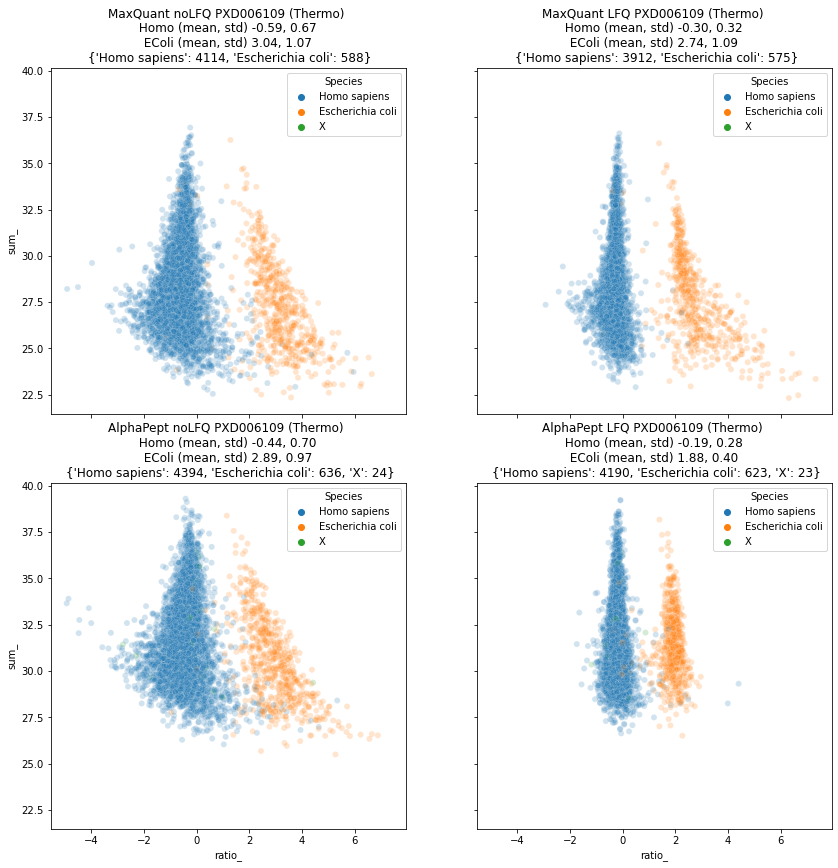

In [8]:
from test_helper import get_plot_df, add_species_column
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, 'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]


species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

## CV plot

C:\Users\admin\AppData\Local\Temp/ipykernel_21284/3701149517.py:22: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\AppData\Local\Temp/ipykernel_21284/3701149517.py:52: RuntimeWarning: Mean of empty slice
  cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)


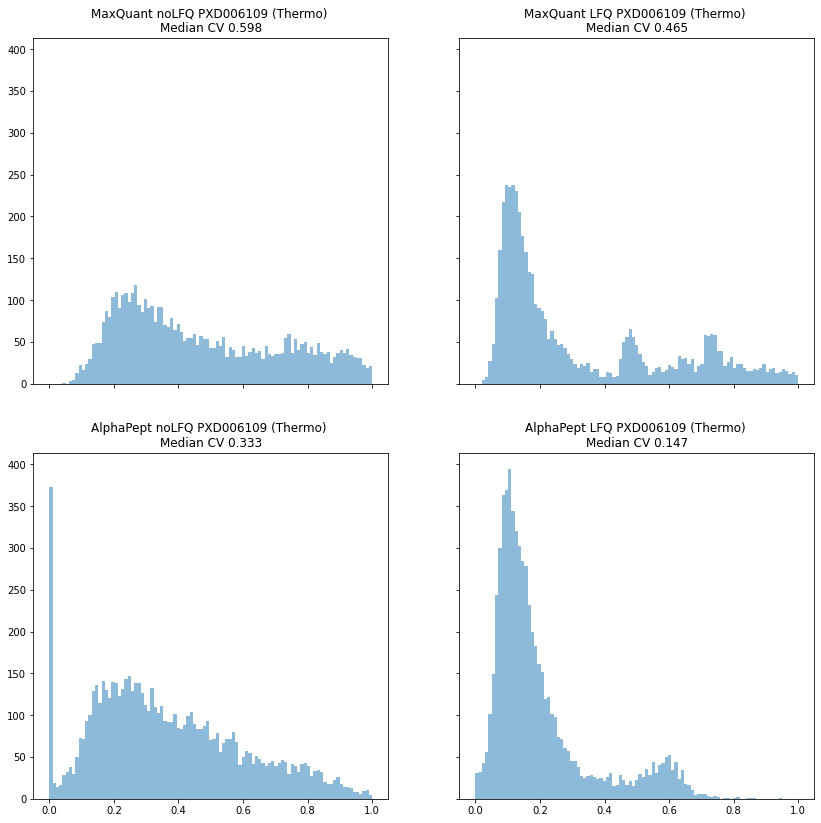

In [9]:
bins = np.linspace(0,1,100)

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    
    cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)

    axes[0,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[0,j].set_title(f'{id_} \nMedian CV {np.nanmedian(cv):.3f}')

path = os.path.join(TEST_DIR,'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)

    axes[1,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[1,j].set_title(f'{id_} \nMedian CV {np.nanmedian(cv):.3f}')

plt.show()

## Algorithm Test

Test performance of LFQ algorithm on MaxQuant evidence file.

In [10]:
try: 
    import ipywidgets
except ModuleNotFoundError:
    !pip install ipywidgets

2021-08-26 12:59:20> Loading files
2021-08-26 12:59:22> A total of 6 files.


  0%|                                                                                            | 0/1 [04:52<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:21<00:00, 261.36s/it]


2021-08-26 12:59:32> A total of 6,854 proteins.
2021-08-26 12:59:44> Setting minimum occurence to 6.0
2021-08-26 12:59:47> Preparing protein table for parallel processing.
2021-08-26 12:59:50> Starting protein extraction for 6854 proteins.
2021-08-26 12:59:50> AlphaPool was set to 24 processes. Setting max to 24.


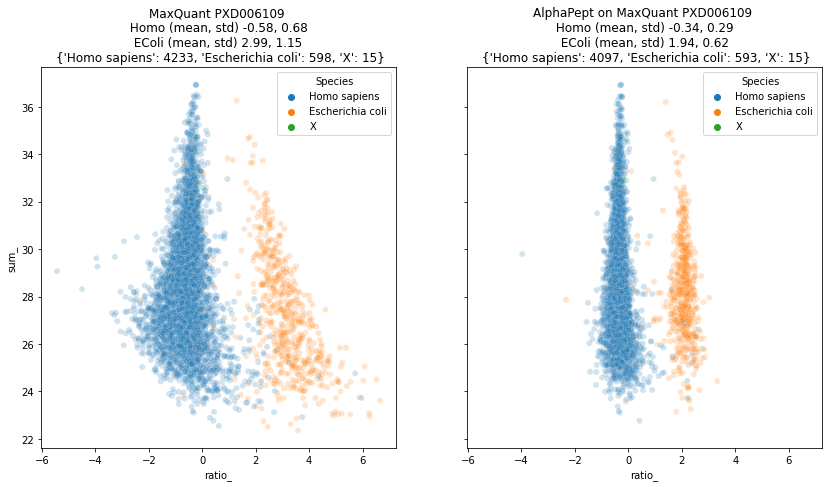

In [11]:
from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd


evidence_path = os.path.join(tmp_folder,'PXD006109_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD006109_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
test_helper.add_species_column(ref)
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD006109'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'HeLa2' in _]
    ratio_columns = [_ for _ in ds if 'HeLa12' in _]
    test_helper.get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

## Normalization Checks

### Check only the delayed normalization part

2021-08-26 13:02:25> Setting minimum occurence to 4.0
2021-08-26 13:02:26> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\panda

2021-08-26 13:02:27> Setting minimum occurence to 4.0
2021-08-26 13:02:28> Setting minimum occurence to 4.0
2021-08-26 13:02:28> Setting minimum occurence to 4.0
2021-08-26 13:02:29> Setting minimum occurence to 4.0
2021-08-26 13:02:30> Setting minimum occurence to 4.0


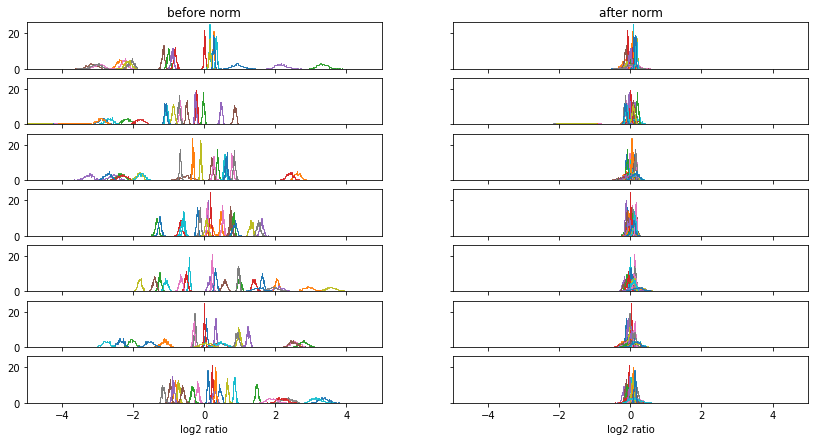

In [12]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test_helper
from alphapept.quantification import delayed_normalization


def visualize_normalization(simulated_df, axis, value = "Intensity",show_per_colpair = True):
    
    shortnames = df["filename"].unique()
    df["namefrac"] = [f"{n}_{f}" for n,f in zip(simulated_df["filename"], simulated_df["fraction"])]
    simulated_reformat = pd.pivot_table(simulated_df, values=value, columns="namefrac" ,index=["protein_group", "precursor" ])
    
    for namepair in itertools.combinations(shortnames, 2):
        cols1 = [x for x in simulated_reformat.columns if namepair[0] in x]
        cols2 = [x for x in simulated_reformat.columns if namepair[1] in x]
        for colpair in itertools.product(cols1, cols2):
            fcs = np.log2(simulated_reformat[colpair[0]]) - np.log2(simulated_reformat[colpair[1]])
            axis.hist(fcs, histtype = 'step', bins = 50, label = f"{colpair}", density = True)
            axis.set_xlim(-5, 5)

samplenames = ["A1", "A2","B1"]
fractions = [3, 2, 3]

ntests = 7
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(14,7), sharex=True,sharey=True)
count_axis = 0
axes[0][0].set_title("before norm")
axes[-1][0].set_xlabel('log2 ratio')
axes[0][1].set_title("after norm")
axes[-1][1].set_xlabel('log2 ratio')
for _ in range(ntests):
    df = test_helper.simulate_biased_peptides(5000, samplenames, fractions)
    df_del, normed = delayed_normalization(df, field ='Intensity')
    visualize_normalization(df, axes[count_axis][0],value = "Intensity", show_per_colpair = False)
    visualize_normalization(df_del, axes[count_axis][1],value = "Intensity_dn", show_per_colpair = False)
    count_axis+=1

### Check delayed normalization + protein intensity estimation

2021-08-26 13:02:32> Setting minimum occurence to 3.0
2021-08-26 13:02:32> Normalization with SLSQP failed. Trying BFGS
2021-08-26 13:02:33> Preparing protein table for parallel processing.
2021-08-26 13:02:34> Starting protein extraction for 3366 proteins.
2021-08-26 13:02:34> AlphaPool was set to 24 processes. Setting max to 24.
2021-08-26 13:03:02> Preparing protein table for parallel processing.
2021-08-26 13:03:03> Starting protein extraction for 3366 proteins.
2021-08-26 13:03:03> AlphaPool was set to 24 processes. Setting max to 24.


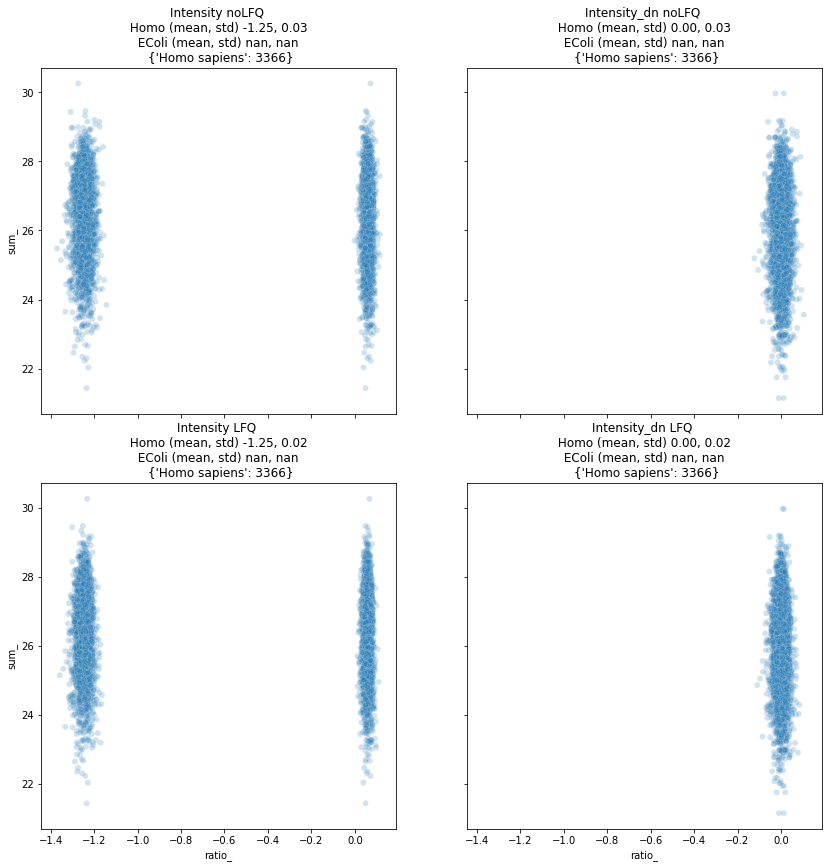

In [13]:
from alphapept.quantification import delayed_normalization, protein_profile_parallel
import test_helper
import pandas as pd
import matplotlib.pyplot as plt
import itertools

samplenames = ["A1", "A2", "B1"]
fractions = [1, 1, 1]
test_id = 'PXD006109'

df = test_helper.simulate_biased_peptides(20000, samplenames, fractions)
df, normed = delayed_normalization(df, field ='Intensity')

fields = ['Intensity', 'Intensity_dn']
tests = ['noLFQ', 'LFQ']

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

for j, field in  enumerate(fields):
    
    pt = protein_profile_parallel(df, minimum_ratios=1, field=field)
    pt['Species'] = ["Homo sapiens" for x in range(len(pt.index))]
    
    pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
    lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]
    
    for i, cols in enumerate([pre_lfq, lfq]):
        
        ax = axes[i, j]
        samplepairs = itertools.product([x for x in cols if "A" in x ], [x for x in cols if "B" in x ])
        
        for pair in samplepairs:
            
            base_columns = [pair[0]]
            ratio_columns = [pair[1]]
            test_helper.get_plot_df(pt, base_columns, ratio_columns, ax, f"{fields[j]} {tests[i]}", valid_filter = False)
            
            ax.get_legend().remove()
 
plt.show()

### Bruker HeLa

In [19]:
%run -i ../test_ci.py $tmp_folder bruker_hela

2021-08-26 14:00:00> Creating dir F:\develop\alphapept\sandbox\temp/test_temp.
2021-08-26 14:00:03> Using Python version for testing
2021-08-26 14:00:03> Logging to C:\Users\admin\alphapept\logs\log_20210826140003.txt.
2021-08-26 14:00:03> Platform information:
2021-08-26 14:00:03> system     - Windows
2021-08-26 14:00:03> release    - 10
2021-08-26 14:00:03> version    - 10.0.18363
2021-08-26 14:00:03> machine    - AMD64
2021-08-26 14:00:03> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-08-26 14:00:03> cpu count  - 24
2021-08-26 14:00:03> ram memory - 114.3/127.7 Gb (available/total)
2021-08-26 14:00:03> 
2021-08-26 14:00:03> Python information:
2021-08-26 14:00:03> SQLAlchemy       - 1.3.22
2021-08-26 14:00:03> alphapept        - 0.3.28
2021-08-26 14:00:03> biopython        - 1.78
2021-08-26 14:00:03> click            - 7.1.2
2021-08-26 14:00:03> comtypes         - 1.1.7
2021-08-26 14:00:03> fastcore         - 1.3.21
2021-08-26 14:00:03> h5py             - 3.1.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 14:00:04> FASTA contains 36,789 entries.




  3%|█▋                                                              | 0.02702702702702703/1 [01:26<52:01, 3208.41s/it]

  5%|███▍                                                            | 0.05405405405405406/1 [01:28<21:25, 1358.62s/it]

  8%|█████▎                                                           | 0.08108108108108109/1 [01:30<11:43, 765.04s/it]

 11%|███████                                                          | 0.10810810810810811/1 [01:31<07:12, 484.37s/it]

 14%|████████▊                                                        | 0.13513513513513514/1 [01:32<04:45, 329.71s/it]

 16%|██████████▌                                                      | 0.16216216216216217/1 [01:34<03:16, 235.08s/it]

 19%|████████████▍                                                     | 0.1891891891891892/1 [01:35<02:21, 174.61s/it]

 22%|██████████████                                                   | 0.21621621621621623/1 [01:36<01:43, 131.92s/it]

100%|█████████████████████████

2021-08-26 14:02:38> Digested 36,789 proteins and generated 9,107,982 spectra
2021-08-26 14:04:05> Database saved to F:\develop\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.42 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 14:04:22> Processing 1 files for step raw_conversion
2021-08-26 14:04:22> File F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa has extension .d - converting from Bruker.
2021-08-26 14:34:09> File conversion complete. Extracted 299,728 precursors.
2021-08-26 14:34:12> File conversion of file F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 14:34:12> Processing 1 files for step find_features
2021-08-26 14:34:12> No *.hdf file with features found for F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf. Adding to feature finding list.
2021-08-26 14:34:12> Feature finding on F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.d
2021-08-26 14:34:12> Using Windows FF
2021-08-26 14:34:14> TopLevelUffWorkflow: Initializing 4d Feature Finder Workflow for lc-timstof data
2021-08-26 14:34:14> bdal.uff.TopLevelUffWorkflow: This is Universal Feature Finder 3.13.1.0
2021-08-26 14:34:14> 
2021-08-26 14:34:14> bdal.uff.cmdline: Parameters for ParameterSet path '':
2021-08-26 14:34:14> 
2021-08-26 14:34:14>  directory containing the data to be processed." , "required":true , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.d"}
2021-08-26 14:34:14> 
2021-08-2

2021-08-26 14:34:14> 
2021-08-26 14:34:14> "Parameter for writing raw msms peaks of non-deisotoped peaks if writeAllRawPeaks is false." , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":150}
2021-08-26 14:34:14> 
2021-08-26 14:34:14>  non-deconvoluted peaks are filled up." , "required":false , "hidden":true , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":"[topN,threshold] (class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >)" , "value":"topN"}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> , all raw peaks are written. Otherwise, only deisotoped peaks are written" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> ':
2021-08-26 14:34:14> 
2021-08-26 14:34:14> 
2021-08-26 14:34:14> :
2021-08-26 14:34:14> 
2021-08-26 14:34:14> c":"intensity threshold for matching calibrant peaks" 

2021-08-26 14:34:14> 
2021-08-26 14:34:14> ectors with group ids of reference peaks, for calibration-segment calibration" , "required":false , "hidden":false , "type":"class std::vector<class std::vector<int,class std::allocator<int> >,class std::allocator<class std::vector<int,class std::allocator<int> > > >" , "constraint":null , "value":unprintable type}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> :"end (RT) of the calibration segment" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1e+22}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> c":"begin (RT) of the calibration segment" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> mum intensity of a calibrant" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1e+22}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> lag indicating which algorithm to use: false = use calibration-segment, true = do not u

2021-08-26 14:34:14> 
2021-08-26 14:34:14> value for range to read metadata / recalibrate masses in" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-08-26 14:34:14> 
2021-08-26 14:34:14>  "desc":"Lower RT value for range to look for mobility calibrants" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> .Calibration.ReadTimsCalibrants':
2021-08-26 14:34:14> 
2021-08-26 14:34:14> 
2021-08-26 14:34:14> Ms.Calibration.WriteCalibration':
2021-08-26 14:34:14> 
2021-08-26 14:34:14> "vector of CCS values of reference peaks for mobility calibration" , "required":false , "hidden":false , "type":"class std::vector<double,class std::allocator<double> >" , "constraint":null , "value":[]}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> .Calibration.WriteCalibration':
2021-08-26 14:34:14> 
2021-08-26 14:34:14> 
2021-08-26 14:34:14> Ms.ClusterDeisotoping':
2021-08-26 14:34:14> 
2021-0

2021-08-26 14:34:14> 
2021-08-26 14:34:14> sc":"assignment precondition: if true, the M/Z center of the isolation window must lie within the feature interval" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> raction of isotope pattern which must be covered (starting from the largest peaks)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.95}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> l molecules: path to file with table: 6 x M/Z and 6 isotope intensities" , "required":false , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"isotopePatterns3.txt"}
2021-08-26 14:34:14> 
2021-08-26 14:34:14> e threshold for incorporation of non-essential isotopes into feature. if <= 0, not used (abs. threshold maxIsotopePatternError used)." , "required":false , "hidden":false , "type":"double

2021-08-26 14:34:15> 
2021-08-26 14:34:15> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> " , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> rue, all peaks for positions [-1, maxIsotopes-1] (with pos. 0 first isotope of feature) are reported" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> fraction of the maximum intensity is considered as not saturated (for bigger intensities we don't know)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.8}
2021-08-26 14:34:15

2021-08-26 14:34:15> required":false , "hidden":false , "type":"double" , "constraint":null , "value":1}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0.03}
2021-08-26 14:34:15> 
2021-08-26 14:34:15>  , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":2}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> ed":false , "hidden":false , "type":"double" , "constraint":null , "value":0.014}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> d":false , "hidden":false , "type":"double" , "constraint":null , "value":0.01}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> d":false , "hidden":false , "type":"double" , "constraint":null , "value":4}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> " , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":3.5}
2021-08-

2021-08-26 14:34:15> 
2021-08-26 14:34:15>  sqlite result file '<shortFilename>.features'" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":true}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> aw peaks for each cluster are written" , "required":false , "hidden":true , "type":"bool" , "constraint":null , "value":false}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> .IsotopeClustersOutput':
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> Ms.PrecursorInfoSource':
2021-08-26 14:34:15> 
2021-08-26 14:34:15> value for read range" , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":1e+22}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> value for read range" , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":0}
2021-08-26 14:34:15> 
2021-08-26 14:34:15> .PrecursorInfoSource':
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> Ms.ReadTimsData':
2021-08-26 14:34:15> 
2021-08-26 14:34

2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 00000
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 0000
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 00
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 0000.000000
2021-08-26 14:34:15> 
2021-08-26 14:34:15> e
2021-08-26 14:34:15> th.enableRecalibration=true
2021

2021-08-26 14:34:15> false
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 10
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> alse
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> ing=20
2021-08-26 14:34:15> 00000
2021-08-26 14:34:15> or=2.000000
2021-08-26 14:34:15> 300000
2021-08-26 14:34:15> 0
2021-08-26 14:34:15> 50000
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> .000000
2021-08-26 14:34:15> 
2021-08-26 14:34:15> 
2021-08-26 14:34:15> ters=<unprintable type>
2021-08-26 14:34:15> ue
2021-08-26 14:34:15> eaks=false
2021-08-26 14:34:15> nds=10000000000000000000000.000000
2021-08-26 14:34:15> nds=0.000000
2021-08-26 14:34:15> meNrTolerance=2
2021-08-26 14:34:15> imalFrequency=20
2021-08-26 14:34:15> nNrTolerance=20
2021-08-26 14:34:15> lerance=3
2021-08-26 14:34:15> eClustering"
2021-08-26 14:34:15> ue
2021-0

2021-08-26 14:57:55> bdal.algorithm.LcmsClusterDeisotoping: 2052951 clusters after splitting (if active).
2021-08-26 14:57:55> bdal.algorithm.LcmsClusterDeisotoping:  min/max apex intensity: 34.7222/1.31159e+06
2021-08-26 14:58:04> bdal.algorithm.PerioTab.InitPerioTabStream: User-defined periodic table extension is empty or file could not be opened. Proceeding with standard elements.
2021-08-26 14:58:05> bdal.algorithm.LcmsClusterDeisotoping: correlation threshold: 10623.9
2021-08-26 14:58:05> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0% (1/2052951)
2021-08-26 14:58:06> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0.487104% (10001/2052951)
2021-08-26 14:58:07> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0.974207% (20001/2052951)
2021-08-26 14:58:08> bdal.algorithm.LcmsClusterDeisotoping: Progress: 1.46131% (30001/2052951)
2021-08-26 14:58:09> bdal.algorithm.LcmsClusterDeisotoping: Progress: 1.94841% (40001/2052951)
2021-08-26 14:58:11> bdal.algorithm.LcmsClusterDeisotop

2021-08-26 14:59:32> bdal.algorithm.LcmsClusterDeisotoping: Progress: 39.4554% (810001/2052951)
2021-08-26 14:59:33> bdal.algorithm.LcmsClusterDeisotoping: Progress: 39.9425% (820001/2052951)
2021-08-26 14:59:34> bdal.algorithm.LcmsClusterDeisotoping: Progress: 40.4296% (830001/2052951)
2021-08-26 14:59:35> bdal.algorithm.LcmsClusterDeisotoping: Progress: 40.9167% (840001/2052951)
2021-08-26 14:59:36> bdal.algorithm.LcmsClusterDeisotoping: Progress: 41.4038% (850001/2052951)
2021-08-26 14:59:37> bdal.algorithm.LcmsClusterDeisotoping: Progress: 41.8909% (860001/2052951)
2021-08-26 14:59:38> bdal.algorithm.LcmsClusterDeisotoping: Progress: 42.378% (870001/2052951)
2021-08-26 14:59:39> bdal.algorithm.LcmsClusterDeisotoping: Progress: 42.8651% (880001/2052951)
2021-08-26 14:59:39> bdal.algorithm.LcmsClusterDeisotoping: Progress: 43.3522% (890001/2052951)
2021-08-26 14:59:40> bdal.algorithm.LcmsClusterDeisotoping: Progress: 43.8393% (900001/2052951)
2021-08-26 14:59:41> bdal.algorithm.LcmsC

2021-08-26 15:00:38> bdal.algorithm.LcmsClusterDeisotoping: Progress: 80.8592% (1660001/2052951)
2021-08-26 15:00:39> bdal.algorithm.LcmsClusterDeisotoping: Progress: 81.3463% (1670001/2052951)
2021-08-26 15:00:40> bdal.algorithm.LcmsClusterDeisotoping: Progress: 81.8334% (1680001/2052951)
2021-08-26 15:00:40> bdal.algorithm.LcmsClusterDeisotoping: Progress: 82.3205% (1690001/2052951)
2021-08-26 15:00:41> bdal.algorithm.LcmsClusterDeisotoping: Progress: 82.8076% (1700001/2052951)
2021-08-26 15:00:41> bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.2947% (1710001/2052951)
2021-08-26 15:00:42> bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.7818% (1720001/2052951)
2021-08-26 15:00:43> bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.2689% (1730001/2052951)
2021-08-26 15:00:43> bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.756% (1740001/2052951)
2021-08-26 15:00:44> bdal.algorithm.LcmsClusterDeisotoping: Progress: 85.2431% (1750001/2052951)
2021-08-26 15:00:45> bdal.algor




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 15:41:24> Starting first search.
2021-08-26 15:41:24> Processing 1 files for step search_db
2021-08-26 15:41:24> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-08-26 15:41:55> Performing search on 664,992 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2021-08-26 15:42:39> Found 1,274,184 psms.
2021-08-26 15:42:40> Extracting columns for scoring.


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:43:14<00:00, 6194.55s/it]
  0%|                                                                                          | 0/1 [1:09:05<?, ?it/s]


2021-08-26 15:45:45> Extracted columns from 1,274,184 spectra.
2021-08-26 15:45:48> Saving first_search results to F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2021-08-26 15:45:52> Search of file F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2021-08-26 15:46:25> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 15:46:25> Processing 1 files for step calibrate_hdf
2021-08-26 15:46:27> Scoring using X-Tandem
2021-08-26 15:46:31> 66,432 target (664 decoy) of 135586 PSMs. fdr 0.009995 for a cutoff of 17.54 (set fdr was 0.01)
2021-08-26 15:46:39> Calibration of file F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf complete.
2021-08-26 15:46:39> Calibrating fragments
2021-08-26 15:46:41> Median fragment offset -4.42 - std 15.43 ppm - mad 11.37 ppm



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 15:46:42> Starting second search with DB.
2021-08-26 15:46:42> Processing 1 files for step search_db
2021-08-26 15:46:42> Found calibrated prec_tol with value 10.97
2021-08-26 15:46:42> Found calibrated frag_tol with value 34.11
2021-08-26 15:46:47> Performing search on 664,992 query and 9,107,982 db entries with frag_tol = 34.11 and prec_tol = 10.97.


  0%|                                                                                            | 0/1 [00:22<?, ?it/s]


2021-08-26 15:47:08> Found 1,143,845 psms.
2021-08-26 15:47:08> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [06:22<?, ?it/s]


2021-08-26 15:49:42> Extracted columns from 1,143,845 spectra.
2021-08-26 15:49:44> Saving second_search results to F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2021-08-26 15:49:48> Search of file F:\develop\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2021-08-26 15:50:19> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 15:50:20> Processing 1 files for step score_hdf
2021-08-26 15:50:22> Found second search psms for scoring.
2021-08-26 15:50:40> 87,886 target (8,788 decoy) of 134259 PSMs. fdr 0.099993 for a cutoff of 13.26 (set fdr was 0.1)
2021-08-26 15:50:41> Training & cross-validation on 18662 targets and 18661 decoys
2021-08-26 15:51:10> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-08-26 15:51:10> The train accuracy was 0.9446721860514964
2021-08-26 15:51:10> Testing on 74647 targets and 74648 decoys
2021-08-26 15:51:11> The test accuracy was 0.9259117853913393
2021-08-26 15:51:11> Top features {'hits': 0.22315666299200976, 'y_hits': 0.1857155501428789, 'x_tandem': 0.18441830303194567, 'n_ions': 0.05990677841009945, 'matched_int_ratio': 0.059353129198812755, 'matched_ion_fraction': 0.0486172128557179, 'dist': 0.04031709383600028, 'total_int': 0.024674661990747686, 'prec_offset': 0.022699076608620014, 'n_missed': 0.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 15:51:51> Fasta dict with length 36,789, Pept dict with length 9,107,988
2021-08-26 15:51:51> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 15:51:52> A total of 60,371 unique and 3,390 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-08-26 15:51:53> A total of 902 ambigious proteins
2021-08-26 15:51:54> A total of 699 unique and 40 shared peptides.
2021-08-26 15:51:54> A total of 39 ambigious proteins
2021-08-26 15:51:54> Global FDR on protein_group
2021-08-26 15:51:54> 6,677 target (66 decoy) of 8165 PSMs. fdr 0.009885 for a cutoff of 0.96 (set fdr was 0.01)
2021-08-26 15:51:55> FDR on proteins complete. For 0.01 FDR found 73,648 targets and 71 decoys. A total of 6,743 proteins found.
2021-08-26 15:51:58> Saving complete.
2021-08-26 15:51:58> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-08-26 15:51:58> Complete. 
2021-08-26 15:51:58> Starting profile extraction.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]

2021-08-26 15:51:59> LFQ complete.
2021-08-26 15:51:59> Extracting protein_summary
2021-08-26 15:51:59> Saved protein_summary of length 6,743 saved to F:\develop\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-08-26 15:51:59> Exporting as csv.
2021-08-26 15:52:02> Saved df of length 73,719 saved to F:\develop\alphapept\sandbox\temp\test_temp\results
2021-08-26 15:52:08> Settings saved to F:\develop\alphapept\sandbox\temp\test_temp\results.yaml
2021-08-26 15:52:08> Analysis complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [19:28<00:00, 1168.25s/it]


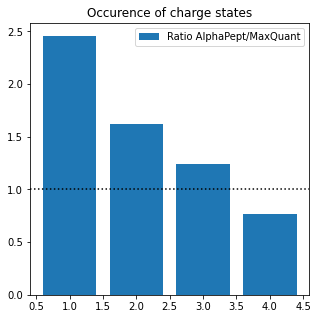

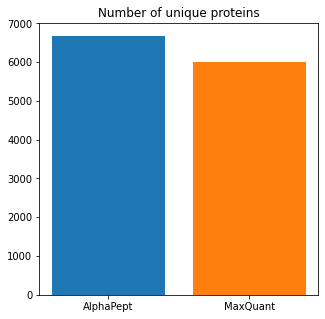

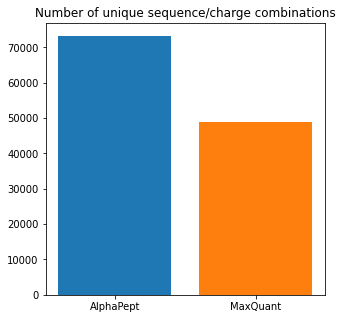

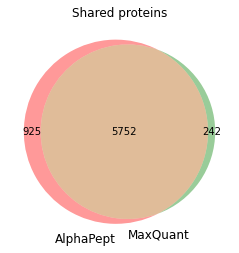

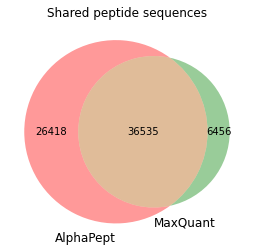

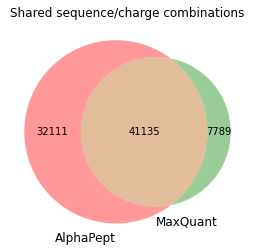

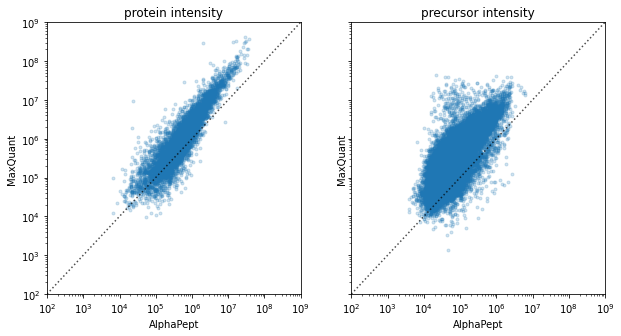

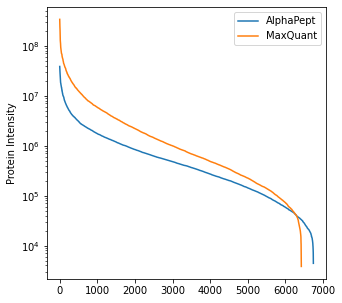

In [20]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files(os.path.join(TEST_DIR, "results.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

## PXD010012

In [21]:
%run -i ../test_ci.py $tmp_folder PXD010012

2021-08-26 16:11:39> Creating dir F:\develop\alphapept\sandbox\temp/test_temp.
2021-08-26 16:13:36> Using Python version for testing
2021-08-26 16:13:36> Logging to C:\Users\admin\alphapept\logs\log_20210826161336.txt.
2021-08-26 16:13:36> Platform information:
2021-08-26 16:13:36> system     - Windows
2021-08-26 16:13:36> release    - 10
2021-08-26 16:13:36> version    - 10.0.18363
2021-08-26 16:13:36> machine    - AMD64
2021-08-26 16:13:36> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-08-26 16:13:36> cpu count  - 24
2021-08-26 16:13:36> ram memory - 111.5/127.7 Gb (available/total)
2021-08-26 16:13:36> 
2021-08-26 16:13:36> Python information:
2021-08-26 16:13:36> SQLAlchemy       - 1.3.22
2021-08-26 16:13:36> alphapept        - 0.3.28
2021-08-26 16:13:36> biopython        - 1.78
2021-08-26 16:13:36> click            - 7.1.2
2021-08-26 16:13:36> comtypes         - 1.1.7
2021-08-26 16:13:36> fastcore         - 1.3.21
2021-08-26 16:13:36> h5py             - 3.1.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 16:13:37> FASTA contains 43,752 entries.




  2%|█▍                                                             | 0.022727272727272728/1 [01:03<45:17, 2780.28s/it]

  5%|██▊                                                            | 0.045454545454545456/1 [01:03<18:22, 1155.40s/it]

  7%|████▍                                                            | 0.06818181818181818/1 [01:05<10:23, 669.38s/it]

  9%|█████▉                                                           | 0.09090909090909091/1 [01:14<08:25, 555.89s/it]

 11%|███████▍                                                         | 0.11363636363636363/1 [01:28<08:37, 583.94s/it]

  0%|                                                                                            | 0/1 [23:17<?, ?it/s]


 16%|██████████▌                                                       | 0.1590909090909091/1 [01:32<04:19, 308.40s/it]

 18%|███████████▊                                                     | 0.18181818181818182/1 [01:34<03:08, 230.83s/it]

 20%|█████████████▎          

2021-08-26 16:16:00> Digested 43,752 proteins and generated 6,163,992 spectra
2021-08-26 16:17:00> Database saved to F:\develop\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.33 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 16:17:11> Processing 10 files for step raw_conversion
2021-08-26 16:17:11> AlphaPool was set to 24 processes. Setting max to 24.


 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [30:26<02:44, 822.70s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 16:47:38> Processing 10 files for step find_features
2021-08-26 16:47:38> Using Bruker Feature Finder. Setting Process limit to 4.
2021-08-26 16:47:38> AlphaPool was set to 4 processes. Setting max to 4.



 10%|███████▋                                                                     | 0.1/1 [44:16<6:38:26, 26562.85s/it]
 40%|████████████████████████████████                                                | 0.4/1 [44:32<50:41, 5069.32s/it]
 50%|█████████████████████████████████████▌                                     | 0.5/1 [1:27:36<1:30:27, 10854.33s/it]
 70%|██████████████████████████████████████████████████████▌                       | 0.7/1 [1:28:06<30:33, 6110.96s/it]
 80%|██████████████████████████████████████████████████████████████▍               | 0.8/1 [1:31:26<17:04, 5122.88s/it]
 90%|██████████████████████████████████████████████████████████████████████▏       | 0.9/1 [2:05:31<15:04, 9040.93s/it]
100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:05:33<00:00, 6627.63s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 18:53:11> Starting first search.
2021-08-26 18:53:11> Processing 10 files for step search_db
2021-08-26 18:53:11> Searching. Setting Process limit to 15.
2021-08-26 18:53:11> AlphaPool was set to 15 processes. Setting max to 15.





 10%|███████▊                                                                      | 0.1/1 [11:16<1:41:23, 6759.85s/it]


 20%|████████████████                                                                | 0.2/1 [11:16<37:07, 2784.35s/it]


 40%|████████████████████████████████                                                | 0.4/1 [11:20<10:32, 1053.53s/it]


 60%|████████████████████████████████████████████████▌                                | 0.6/1 [11:30<03:51, 578.23s/it]


100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:47:51<00:00, 10071.18s/it]
100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:17:24<00:00, 8244.75s/it]
100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:51:28<00:00, 10288.10s/it]


2021-08-26 19:05:24> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 19:05:24> Processing 10 files for step calibrate_hdf
2021-08-26 19:05:24> AlphaPool was set to 24 processes. Setting max to 24.


 70%|█████████████████████████████████████████████████████████▍                        | 0.7/1 [00:40<00:10, 34.05s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 19:06:05> Starting second search with DB.
2021-08-26 19:06:05> Processing 10 files for step search_db
2021-08-26 19:06:05> Searching. Setting Process limit to 15.
2021-08-26 19:06:05> AlphaPool was set to 15 processes. Setting max to 15.



 10%|████████                                                                        | 0.1/1 [05:19<47:50, 3189.70s/it]
 30%|████████████████████████▎                                                        | 0.3/1 [05:20<09:42, 832.81s/it]
 40%|████████████████████████████████▍                                                | 0.4/1 [05:23<05:32, 554.01s/it]
 60%|████████████████████████████████████████████████▌                                | 0.6/1 [05:23<01:51, 279.39s/it]
 70%|████████████████████████████████████████████████████████▋                        | 0.7/1 [05:33<01:09, 231.02s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:27<00:00, 387.37s/it]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [18:45<00:00, 1125.57s/it]


2021-08-26 19:12:13> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 19:12:14> Processing 10 files for step score_hdf
2021-08-26 19:12:14> AlphaPool was set to 24 processes. Setting max to 24.


 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [04:00<00:22, 113.48s/it]

2021-08-26 19:16:15> Also using mobility for calibration.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:01<00:00, 241.18s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [10:25<00:00, 625.39s/it]


2021-08-26 19:16:59> Total deviation before calibration {'mz': 8.768941201669634e-06, 'rt': 3.389669799804677, 'mobility': 0.04970228742912312}
2021-08-26 19:16:59> Mean deviation before calibration {'mz': 1.9486536003710298e-07, 'rt': 0.07532599555121505, 'mobility': 0.0011044952762027359}
2021-08-26 19:16:59> Solving equation system
2021-08-26 19:16:59> Regression score is 0.9975136288952671
2021-08-26 19:16:59> Solving equation system complete.
2021-08-26 19:16:59> Applying offset
2021-08-26 19:16:59> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.ms_data.hdf - peptide_fdr.
2021-08-26 19:16:59> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.ms_data.hdf - feature_table.
2021-08-26 19:17:00> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.ms_data.hdf - peptide_fdr.
2021-08-26 19:17:00> Saving F:\develop\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.ms_data.hdf - feature_table.
2021-08

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 19:17:50> Fasta dict with length 43,752, Pept dict with length 6,163,998
2021-08-26 19:17:50> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-08-26 19:17:54> A total of 57,935 unique and 8,104 shared peptides.
2021-08-26 19:17:58> A total of 1881 ambigious proteins
2021-08-26 19:17:59> A total of 2,427 unique and 302 shared peptides.
2021-08-26 19:17:59> A total of 289 ambigious proteins
2021-08-26 19:18:01> Global FDR on protein_group
2021-08-26 19:18:01> 7,107 target (71 decoy) of 11883 PSMs. fdr 0.009990 for a cutoff of 0.99 (set fdr was 0.01)
2021-08-26 19:18:05> FDR on proteins complete. For 0.01 FDR found 466,326 targets and 231 decoys. A total of 7,178 proteins found.
2021-08-26 19:18:29> Saving complete.
2021-08-26 19:18:29> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-08-26 19:18:30> Delayed Normalization.
2021-08-26 19:18:31> Setting minimum occurence to 10.0
2021-08-26 19:18:32> Normalization with SLSQP failed. Trying BFGS
2021-08-26 19:18:38> Complete. 
2021-08-26 19:18:38> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 19:18:39> Preparing protein table for parallel processing.


 20%|█████████████▏                                                    | 0.19941487879632208/1 [00:13<00:51, 63.77s/it]

2021-08-26 19:18:52> Starting protein extraction for 7178 proteins.
2021-08-26 19:18:52> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████▉| 0.9995541933686263/1 [03:00<00:00, 190.34s/it]

2021-08-26 19:21:46> LFQ complete.
2021-08-26 19:21:46> Extracting protein_summary
2021-08-26 19:21:47> Saved protein_summary of length 7,178 saved to F:\develop\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-08-26 19:21:47> Exporting as csv.
2021-08-26 19:22:09> Saved df of length 466,557 saved to F:\develop\alphapept\sandbox\temp\test_temp\results
2021-08-26 19:23:20> Settings saved to F:\develop\alphapept\sandbox\temp\test_temp\results.yaml
2021-08-26 19:23:20> Analysis complete.


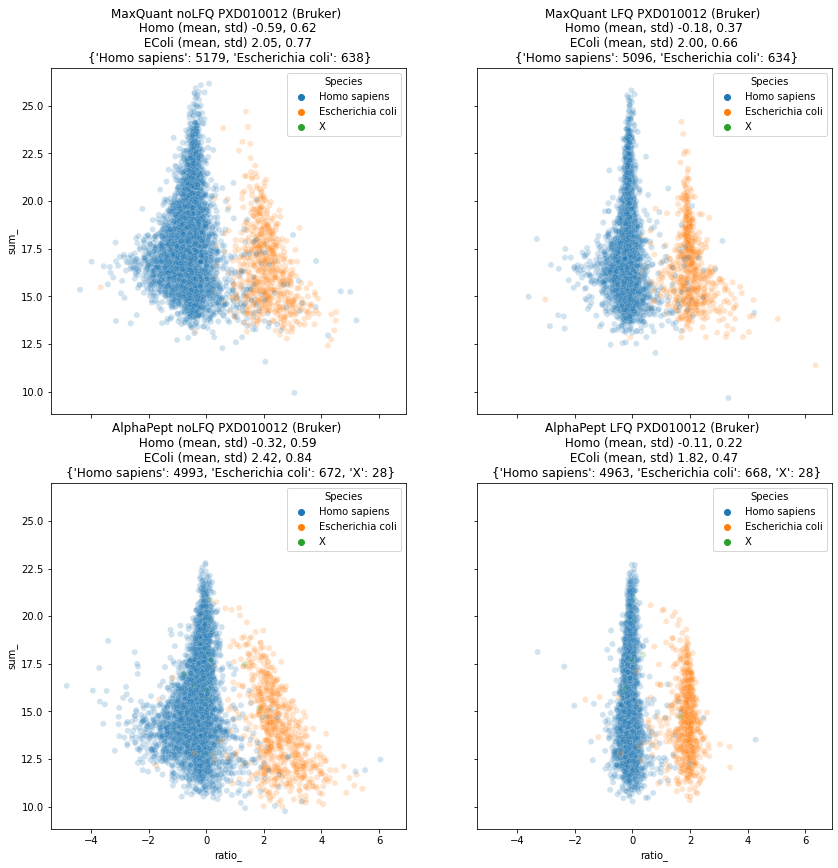

In [22]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Base_{i}" for i in range(1,6)]
    ratio_columns = [f"{x}ntensity Ratio_{i}" for i in range(1,6)]

    id_ = 'MaxQuant ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, "results.hdf") #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD010012_CT_{i}_C1_01_Base{x}" for i in range(1,4)]
    ratio_columns = [f"PXD010012_CT_{i}_C2_01_Ratio{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

2021-08-26 19:23:22> Loading files


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


2021-08-26 19:23:25> A total of 10 files.


  0%|                                                                                            | 0/1 [05:38<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:49<00:00, 289.94s/it]


2021-08-26 19:23:37> A total of 7,413 proteins.
2021-08-26 19:23:51> Setting minimum occurence to 10.0
2021-08-26 19:23:59> Preparing protein table for parallel processing.
2021-08-26 19:24:09> Starting protein extraction for 7413 proteins.
2021-08-26 19:24:09> AlphaPool was set to 24 processes. Setting max to 24.


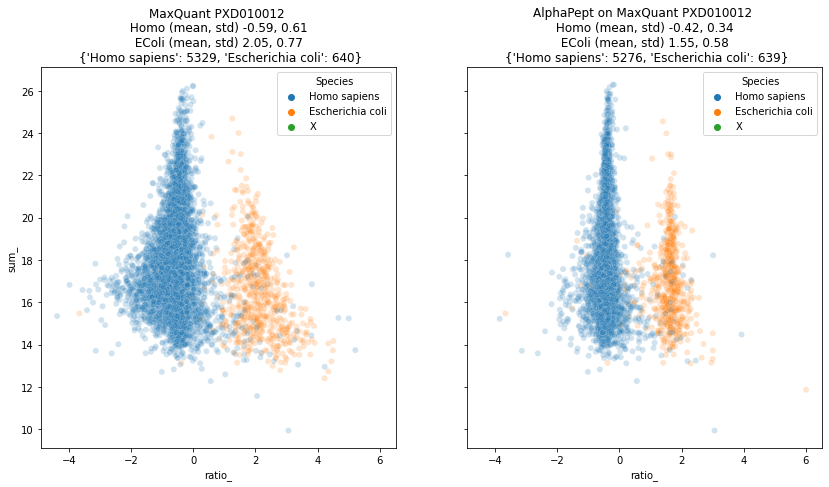

In [23]:
from alphapept.quantification import protein_profile_parallel_mq
from test_helper import get_plot_df

evidence_path = os.path.join(tmp_folder,'PXD010012_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD010012_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD010012'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'Base' in _]
    ratio_columns = [_ for _ in ds if 'Ratio' in _]
    get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

### Large Fasta

In [24]:
%run -i ../test_ci.py $tmp_folder thermo_hela_large_fasta

2021-08-26 19:26:29> Downloading F:\develop\alphapept\sandbox\temp/test_files\all_uniprot_reviewed.fasta.
100% [......................................................................] 279464450 / 2794644502021-08-26 19:26:46> Creating dir F:\develop\alphapept\sandbox\temp/test_temp.
2021-08-26 19:26:49> Using Python version for testing
2021-08-26 19:26:49> Logging to C:\Users\admin\alphapept\logs\log_20210826192649.txt.
2021-08-26 19:26:49> Platform information:
2021-08-26 19:26:49> system     - Windows
2021-08-26 19:26:49> release    - 10
2021-08-26 19:26:49> version    - 10.0.18363
2021-08-26 19:26:49> machine    - AMD64
2021-08-26 19:26:49> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-08-26 19:26:49> cpu count  - 24
2021-08-26 19:26:49> ram memory - 120.5/127.7 Gb (available/total)
2021-08-26 19:26:49> 
2021-08-26 19:26:49> Python information:
2021-08-26 19:26:49> SQLAlchemy       - 1.3.22
2021-08-26 19:26:49> alphapept        - 0.3.28
2021-08-26 19:26:49> bi

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 19:26:49> Processing 1 files for step raw_conversion
2021-08-26 19:26:49> File F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-08-26 19:29:00> File conversion complete. Extracted 120,226 precursors.
2021-08-26 19:29:02> File conversion of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 19:29:02> Processing 1 files for step find_features
2021-08-26 19:29:02> No *.hdf file with features found for F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-08-26 19:29:02> Feature finding on F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-08-26 19:29:02> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [02:17<?, ?it/s]


2021-08-26 19:29:08> Number of hills 1,105,353, len = 17.35
2021-08-26 19:29:08> Repeating hill extraction with centroid_tol 5.87
2021-08-26 19:29:15> Number of hills 1,227,331, len = 19.44
2021-08-26 19:29:35> After split hill_ptrs 1,635,903
2021-08-26 19:29:36> After filter hill_ptrs 1,585,989
2021-08-26 19:32:45> Extracting hill stats complete
2021-08-26 19:33:08> Found 190,099 pre isotope patterns.
2021-08-26 19:36:41> Extracted 234,728 isotope patterns.
2021-08-26 19:36:44> Report complete.
2021-08-26 19:36:44> Matching features to query data.
2021-08-26 19:36:46> Saving feature table.
2021-08-26 19:36:46> Feature table saved to F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-08-26 19:36:46> Saving features.
2021-08-26 19:36:46> Feature finding of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 19:36:46> Starting first search.
2021-08-26 19:36:57> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2021-08-26 19:36:57> Setting Process limit to 30
2021-08-26 19:36:57> AlphaPool was set to 24 processes. Setting max to 24.


  0%|                                                                                            | 0/1 [10:10<?, ?it/s]

2021-08-26 19:39:12> Block 1 of 565 complete - 0.18 % - created peptides 131,706 



  0%|                                                          | 0.0017699115044247787/1 [02:26<22:53:58, 82585.09s/it]

2021-08-26 19:39:17> Block 2 of 565 complete - 0.35 % - created peptides 136,294 


  0%|▏                                                         | 0.0035398230088495575/1 [02:35<10:17:21, 37172.85s/it]

2021-08-26 19:39:22> Block 3 of 565 complete - 0.53 % - created peptides 137,200 


  1%|▎                                                           | 0.005309734513274336/1 [02:45<6:15:36, 22657.10s/it]

2021-08-26 19:39:31> Block 4 of 565 complete - 0.71 % - created peptides 141,928 


  1%|▍                                                           | 0.007079646017699115/1 [02:57<4:32:31, 16468.51s/it]

2021-08-26 19:39:44> Block 5 of 565 complete - 0.88 % - created peptides 145,388 


  1%|▌                                                           | 0.008849557522123894/1 [03:03<3:14:28, 11772.51s/it]

2021-08-26 19:39:50> Block 6 of 565 complete - 1.06 % - created peptides 134,370 


  1%|▋                                                            | 0.010619469026548672/1 [03:09<2:25:18, 8812.11s/it]

2021-08-26 19:39:55> Block 7 of 565 complete - 1.24 % - created peptides 142,782 


  1%|▊                                                            | 0.012389380530973451/1 [03:15<1:56:09, 7056.86s/it]

2021-08-26 19:40:01> Block 8 of 565 complete - 1.42 % - created peptides 150,010 


  1%|▉                                                             | 0.01415929203539823/1 [03:23<1:44:25, 6355.68s/it]

2021-08-26 19:40:10> Block 9 of 565 complete - 1.59 % - created peptides 153,884 


  2%|▉                                                             | 0.01592920353982301/1 [03:34<1:41:53, 6212.17s/it]

2021-08-26 19:40:20> Block 10 of 565 complete - 1.77 % - created peptides 151,508 


  2%|█                                                            | 0.017699115044247787/1 [03:43<1:35:26, 5829.58s/it]

2021-08-26 19:40:29> Block 11 of 565 complete - 1.95 % - created peptides 160,432 


  2%|█▏                                                           | 0.019469026548672566/1 [03:52<1:32:55, 5686.65s/it]

2021-08-26 19:40:38> Block 12 of 565 complete - 2.12 % - created peptides 172,810 


  2%|█▎                                                           | 0.021238938053097345/1 [04:06<1:42:21, 6274.77s/it]

2021-08-26 19:40:52> Block 13 of 565 complete - 2.30 % - created peptides 168,696 


  2%|█▍                                                           | 0.023008849557522124/1 [04:19<1:48:00, 6633.11s/it]

2021-08-26 19:41:05> Block 14 of 565 complete - 2.48 % - created peptides 170,612 


  2%|█▌                                                           | 0.024778761061946902/1 [04:33<1:53:45, 6999.18s/it]

2021-08-26 19:41:19> Block 15 of 565 complete - 2.65 % - created peptides 175,712 


  3%|█▋                                                            | 0.02654867256637168/1 [04:45<1:54:14, 7041.00s/it]

2021-08-26 19:41:32> Block 16 of 565 complete - 2.83 % - created peptides 175,322 


  3%|█▊                                                            | 0.02831858407079646/1 [05:00<1:59:30, 7379.33s/it]

2021-08-26 19:41:46> Block 17 of 565 complete - 3.01 % - created peptides 176,668 


  3%|█▊                                                            | 0.03008849557522124/1 [05:16<2:08:12, 7930.81s/it]

2021-08-26 19:42:02> Block 18 of 565 complete - 3.19 % - created peptides 158,708 


  3%|█▉                                                            | 0.03185840707964602/1 [05:28<2:03:35, 7659.87s/it]

2021-08-26 19:42:15> Block 19 of 565 complete - 3.36 % - created peptides 181,094 


  3%|██                                                           | 0.033628318584070796/1 [05:40<1:57:36, 7302.35s/it]

2021-08-26 19:42:26> Block 20 of 565 complete - 3.54 % - created peptides 181,926 


  4%|██▏                                                          | 0.035398230088495575/1 [05:51<1:52:18, 6986.21s/it]

2021-08-26 19:42:37> Block 21 of 565 complete - 3.72 % - created peptides 176,542 


  4%|██▎                                                           | 0.03716814159292035/1 [06:07<2:03:23, 7689.17s/it]

2021-08-26 19:42:54> Block 22 of 565 complete - 3.89 % - created peptides 193,612 


  4%|██▍                                                           | 0.03893805309734513/1 [06:20<2:00:53, 7547.03s/it]

2021-08-26 19:43:07> Block 23 of 565 complete - 4.07 % - created peptides 206,820 


  4%|██▌                                                           | 0.04070796460176991/1 [06:37<2:10:53, 8186.87s/it]

2021-08-26 19:43:24> Block 24 of 565 complete - 4.25 % - created peptides 182,860 


  4%|██▋                                                           | 0.04247787610619469/1 [06:55<2:19:08, 8718.71s/it]

2021-08-26 19:43:41> Block 25 of 565 complete - 4.42 % - created peptides 132,994 


  4%|██▋                                                           | 0.04424778761061947/1 [07:09<2:13:53, 8405.16s/it]

2021-08-26 19:43:55> Block 26 of 565 complete - 4.60 % - created peptides 133,548 


  5%|██▊                                                           | 0.04601769911504425/1 [07:24<2:15:40, 8533.09s/it]

2021-08-26 19:44:11> Block 27 of 565 complete - 4.78 % - created peptides 174,392 


  5%|██▉                                                          | 0.047787610619469026/1 [07:35<2:04:11, 7825.90s/it]

2021-08-26 19:44:22> Block 28 of 565 complete - 4.96 % - created peptides 147,430 


  5%|███                                                          | 0.049557522123893805/1 [07:54<2:17:51, 8703.05s/it]

2021-08-26 19:44:41> Block 29 of 565 complete - 5.13 % - created peptides 134,648 


  5%|███▏                                                          | 0.05132743362831858/1 [08:05<2:06:28, 7998.89s/it]

2021-08-26 19:44:52> Block 30 of 565 complete - 5.31 % - created peptides 130,340 


  5%|███▎                                                          | 0.05309734513274336/1 [08:19<2:05:37, 7960.47s/it]

2021-08-26 19:45:06> Block 31 of 565 complete - 5.49 % - created peptides 164,200 


  5%|███▍                                                          | 0.05486725663716814/1 [08:35<2:10:37, 8292.94s/it]

2021-08-26 19:45:22> Block 32 of 565 complete - 5.66 % - created peptides 163,276 


  6%|███▌                                                          | 0.05663716814159292/1 [08:47<2:01:59, 7758.81s/it]

2021-08-26 19:45:33> Block 33 of 565 complete - 5.84 % - created peptides 146,326 


  6%|███▋                                                           | 0.0584070796460177/1 [09:00<2:01:07, 7718.25s/it]

2021-08-26 19:45:52> Block 34 of 565 complete - 6.02 % - created peptides 181,200 


  6%|███▋                                                          | 0.06017699115044248/1 [09:21<2:18:45, 8858.42s/it]

2021-08-26 19:46:07> Block 35 of 565 complete - 6.19 % - created peptides 185,570 


  6%|███▊                                                         | 0.061946902654867256/1 [09:40<2:27:12, 9415.82s/it]

2021-08-26 19:46:26> Block 36 of 565 complete - 6.37 % - created peptides 171,700 


  6%|███▉                                                          | 0.06371681415929203/1 [09:52<2:14:56, 8647.37s/it]

2021-08-26 19:46:38> Block 37 of 565 complete - 6.55 % - created peptides 171,860 


  7%|████                                                          | 0.06548672566371681/1 [10:04<2:05:59, 8089.51s/it]

2021-08-26 19:46:50> Block 38 of 565 complete - 6.73 % - created peptides 149,212 


  7%|████▏                                                         | 0.06725663716814159/1 [10:16<1:58:56, 7651.11s/it]

2021-08-26 19:47:02> Block 39 of 565 complete - 6.90 % - created peptides 225,264 


  7%|████▎                                                         | 0.06902654867256637/1 [10:35<2:14:19, 8656.98s/it]

2021-08-26 19:47:22> Block 40 of 565 complete - 7.08 % - created peptides 216,084 


  7%|████▍                                                         | 0.07079646017699115/1 [10:49<2:09:17, 8349.04s/it]

2021-08-26 19:47:35> Block 41 of 565 complete - 7.26 % - created peptides 202,198 


  7%|████▍                                                         | 0.07256637168141593/1 [11:01<2:03:32, 7992.78s/it]

2021-08-26 19:47:48> Block 42 of 565 complete - 7.43 % - created peptides 198,478 


  7%|████▋                                                          | 0.0743362831858407/1 [11:22<2:21:05, 9145.37s/it]

2021-08-26 19:48:09> Block 43 of 565 complete - 7.61 % - created peptides 212,378 


  8%|████▋                                                         | 0.07610619469026549/1 [11:37<2:18:02, 8965.28s/it]

2021-08-26 19:48:24> Block 44 of 565 complete - 7.79 % - created peptides 235,102 


  8%|████▊                                                         | 0.07787610619469026/1 [11:59<2:32:04, 9895.54s/it]

2021-08-26 19:48:45> Block 45 of 565 complete - 7.96 % - created peptides 206,834 


  8%|████▉                                                         | 0.07964601769911504/1 [12:11<2:17:46, 8982.32s/it]

2021-08-26 19:48:58> Block 46 of 565 complete - 8.14 % - created peptides 214,350 


  8%|█████                                                         | 0.08141592920353982/1 [12:24<2:09:45, 8475.54s/it]

2021-08-26 19:49:10> Block 47 of 565 complete - 8.32 % - created peptides 208,136 


  8%|█████▏                                                         | 0.0831858407079646/1 [12:39<2:09:06, 8449.58s/it]

2021-08-26 19:49:25> Block 48 of 565 complete - 8.50 % - created peptides 181,538 


  8%|█████▎                                                        | 0.08495575221238938/1 [13:01<2:28:22, 9728.51s/it]

2021-08-26 19:49:48> Block 49 of 565 complete - 8.67 % - created peptides 150,464 


  9%|█████▍                                                        | 0.08672566371681416/1 [13:13<2:15:02, 8871.48s/it]

2021-08-26 19:50:00> Block 50 of 565 complete - 8.85 % - created peptides 139,836 


  9%|█████▍                                                        | 0.08849557522123894/1 [13:26<2:07:00, 8359.90s/it]

2021-08-26 19:50:12> Block 51 of 565 complete - 9.03 % - created peptides 161,286 


  9%|█████▌                                                        | 0.09026548672566372/1 [13:38<2:00:49, 7968.89s/it]

2021-08-26 19:50:25> Block 52 of 565 complete - 9.20 % - created peptides 142,328 


  9%|█████▊                                                         | 0.0920353982300885/1 [14:02<2:23:38, 9491.89s/it]

2021-08-26 19:50:48> Block 53 of 565 complete - 9.38 % - created peptides 200,772 


  9%|█████▊                                                        | 0.09380530973451327/1 [14:15<2:15:16, 8956.42s/it]

2021-08-26 19:51:02> Block 54 of 565 complete - 9.56 % - created peptides 175,328 


 10%|█████▉                                                        | 0.09557522123893805/1 [14:27<2:05:02, 8295.47s/it]

2021-08-26 19:51:14> Block 55 of 565 complete - 9.73 % - created peptides 171,034 


 10%|█████▉                                                       | 0.09734513274336283/1 [14:53<2:34:28, 10268.29s/it]

2021-08-26 19:51:40> Block 56 of 565 complete - 9.91 % - created peptides 152,274 


 10%|██████▏                                                       | 0.09911504424778761/1 [15:06<2:19:04, 9262.64s/it]

2021-08-26 19:51:52> Block 57 of 565 complete - 10.09 % - created peptides 192,526 


 10%|██████▎                                                       | 0.10088495575221239/1 [15:19<2:11:42, 8788.86s/it]

2021-08-26 19:52:06> Block 58 of 565 complete - 10.27 % - created peptides 200,642 


 10%|██████▎                                                       | 0.10265486725663717/1 [15:33<2:06:08, 8434.56s/it]

2021-08-26 19:52:19> Block 59 of 565 complete - 10.44 % - created peptides 210,320 


 10%|██████▍                                                       | 0.10442477876106195/1 [15:47<2:03:31, 8275.68s/it]

2021-08-26 19:52:33> Block 60 of 565 complete - 10.62 % - created peptides 145,706 


 11%|██████▍                                                      | 0.10619469026548672/1 [16:12<2:30:19, 10091.42s/it]

2021-08-26 19:52:59> Block 61 of 565 complete - 10.80 % - created peptides 165,616 


 11%|██████▊                                                        | 0.1079646017699115/1 [16:26<2:19:49, 9405.38s/it]

2021-08-26 19:53:12> Block 62 of 565 complete - 10.97 % - created peptides 184,958 


 11%|██████▊                                                       | 0.10973451327433628/1 [16:39<2:11:52, 8888.21s/it]

2021-08-26 19:53:26> Block 63 of 565 complete - 11.15 % - created peptides 184,052 


 11%|██████▉                                                       | 0.11150442477876106/1 [16:53<2:07:15, 8593.41s/it]

2021-08-26 19:53:40> Block 64 of 565 complete - 11.33 % - created peptides 170,182 


 11%|███████                                                       | 0.11327433628318584/1 [17:06<1:59:32, 8088.84s/it]

2021-08-26 19:53:52> Block 65 of 565 complete - 11.50 % - created peptides 168,210 


 12%|███████                                                      | 0.11504424778761062/1 [17:32<2:29:51, 10160.05s/it]

2021-08-26 19:54:19> Block 66 of 565 complete - 11.68 % - created peptides 212,550 


 12%|███████▎                                                       | 0.1168141592920354/1 [17:45<2:16:58, 9305.14s/it]

2021-08-26 19:54:32> Block 67 of 565 complete - 11.86 % - created peptides 176,008 


 12%|███████▎                                                      | 0.11858407079646018/1 [18:00<2:11:56, 8982.03s/it]

2021-08-26 19:54:46> Block 68 of 565 complete - 12.04 % - created peptides 200,942 


 12%|███████▍                                                      | 0.12035398230088495/1 [18:14<2:07:09, 8673.12s/it]

2021-08-26 19:55:00> Block 69 of 565 complete - 12.21 % - created peptides 226,892 


 12%|███████▌                                                      | 0.12212389380530973/1 [18:29<2:05:16, 8562.39s/it]

2021-08-26 19:55:15> Block 70 of 565 complete - 12.39 % - created peptides 147,694 


 12%|███████▌                                                     | 0.12389380530973451/1 [18:55<2:32:45, 10461.27s/it]

2021-08-26 19:55:41> Block 71 of 565 complete - 12.57 % - created peptides 193,414 


 13%|███████▉                                                       | 0.1256637168141593/1 [19:08<2:19:35, 9578.91s/it]

2021-08-26 19:55:55> Block 72 of 565 complete - 12.74 % - created peptides 152,250 


 13%|███████▉                                                      | 0.12743362831858407/1 [19:21<2:10:08, 8948.95s/it]

2021-08-26 19:56:08> Block 73 of 565 complete - 12.92 % - created peptides 234,608 


 13%|████████                                                      | 0.12920353982300886/1 [19:36<2:07:09, 8761.61s/it]

2021-08-26 19:56:23> Block 74 of 565 complete - 13.10 % - created peptides 229,114 


 13%|████████                                                      | 0.13097345132743363/1 [19:50<2:02:20, 8447.04s/it]

2021-08-26 19:56:36> Block 75 of 565 complete - 13.27 % - created peptides 184,850 


 13%|████████                                                     | 0.13274336283185842/1 [20:19<2:35:56, 10788.30s/it]

2021-08-26 19:57:05> Block 76 of 565 complete - 13.45 % - created peptides 151,570 


 13%|████████▎                                                     | 0.13451327433628318/1 [20:31<2:19:43, 9686.12s/it]

2021-08-26 19:57:18> Block 77 of 565 complete - 13.63 % - created peptides 150,592 


 14%|████████▍                                                     | 0.13628318584070798/1 [20:47<2:17:03, 9521.54s/it]

2021-08-26 19:57:34> Block 78 of 565 complete - 13.81 % - created peptides 199,456 


 14%|████████▌                                                     | 0.13805309734513274/1 [21:01<2:08:26, 8940.34s/it]

2021-08-26 19:57:47> Block 79 of 565 complete - 13.98 % - created peptides 193,852 


 14%|████████▋                                                     | 0.13982300884955753/1 [21:13<2:00:13, 8386.09s/it]

2021-08-26 19:58:00> Block 80 of 565 complete - 14.16 % - created peptides 183,342 


 14%|████████▉                                                      | 0.1415929203539823/1 [21:27<1:56:22, 8134.67s/it]

2021-08-26 19:58:13> Block 81 of 565 complete - 14.34 % - created peptides 177,422 


 14%|████████▉                                                     | 0.1433628318584071/1 [21:57<2:35:40, 10903.26s/it]

2021-08-26 19:58:44> Block 82 of 565 complete - 14.51 % - created peptides 171,176 


 15%|████████▉                                                     | 0.14513274336283186/1 [22:11<2:21:46, 9950.47s/it]

2021-08-26 19:58:58> Block 83 of 565 complete - 14.69 % - created peptides 142,104 


 15%|█████████                                                     | 0.14690265486725665/1 [22:25<2:12:51, 9343.96s/it]

2021-08-26 19:59:12> Block 84 of 565 complete - 14.87 % - created peptides 199,534 


 15%|█████████▎                                                     | 0.1486725663716814/1 [22:40<2:07:43, 9001.86s/it]

2021-08-26 19:59:26> Block 85 of 565 complete - 15.04 % - created peptides 193,426 


 15%|█████████▍                                                     | 0.1504424778761062/1 [22:52<1:58:55, 8399.44s/it]

2021-08-26 19:59:38> Block 86 of 565 complete - 15.22 % - created peptides 199,258 


 15%|█████████▎                                                   | 0.15221238938053097/1 [23:26<2:43:20, 11559.79s/it]

2021-08-26 20:00:12> Block 87 of 565 complete - 15.40 % - created peptides 182,478 


 15%|█████████▍                                                   | 0.15398230088495576/1 [23:39<2:26:40, 10402.66s/it]

2021-08-26 20:00:26> Block 88 of 565 complete - 15.58 % - created peptides 161,900 


 16%|█████████▋                                                    | 0.15575221238938053/1 [23:54<2:17:24, 9765.31s/it]

2021-08-26 20:00:41> Block 89 of 565 complete - 15.75 % - created peptides 181,748 


 16%|█████████▊                                                    | 0.15752212389380532/1 [24:08<2:09:43, 9238.57s/it]

2021-08-26 20:00:54> Block 90 of 565 complete - 15.93 % - created peptides 218,448 


 16%|██████████                                                     | 0.1592920353982301/1 [24:22<2:02:48, 8764.93s/it]

2021-08-26 20:01:08> Block 91 of 565 complete - 16.11 % - created peptides 192,288 


 16%|█████████▉                                                    | 0.16106194690265488/1 [24:35<1:58:08, 8449.03s/it]

2021-08-26 20:01:22> Block 92 of 565 complete - 16.28 % - created peptides 190,196 


 16%|██████████                                                    | 0.16283185840707964/1 [24:48<1:53:35, 8140.72s/it]

2021-08-26 20:01:35> Block 93 of 565 complete - 16.46 % - created peptides 178,320 


 16%|██████████                                                   | 0.16460176991150444/1 [25:20<2:35:06, 11140.09s/it]

2021-08-26 20:02:07> Block 94 of 565 complete - 16.64 % - created peptides 200,434 


 17%|██████████▍                                                    | 0.1663716814159292/1 [25:33<2:18:36, 9975.69s/it]

2021-08-26 20:02:20> Block 95 of 565 complete - 16.81 % - created peptides 230,228 


 17%|██████████▊                                                     | 0.168141592920354/1 [25:48<2:12:04, 9526.22s/it]

2021-08-26 20:02:35> Block 96 of 565 complete - 16.99 % - created peptides 149,864 


 17%|██████████▌                                                   | 0.16991150442477876/1 [26:01<2:02:40, 8867.13s/it]

2021-08-26 20:02:48> Block 97 of 565 complete - 17.17 % - created peptides 151,016 


 17%|██████████▋                                                   | 0.17168141592920355/1 [26:15<1:58:35, 8590.52s/it]

2021-08-26 20:03:02> Block 98 of 565 complete - 17.35 % - created peptides 188,974 


 17%|██████████▊                                                   | 0.17345132743362832/1 [26:29<1:55:04, 8353.66s/it]

2021-08-26 20:03:16> Block 99 of 565 complete - 17.52 % - created peptides 186,390 


 18%|███████████                                                    | 0.1752212389380531/1 [26:44<1:54:26, 8325.05s/it]

2021-08-26 20:03:30> Block 100 of 565 complete - 17.70 % - created peptides 144,978 


 18%|██████████▉                                                   | 0.17699115044247787/1 [26:56<1:48:22, 7900.77s/it]

2021-08-26 20:03:42> Block 101 of 565 complete - 17.88 % - created peptides 161,746 


 18%|██████████▉                                                  | 0.17876106194690267/1 [27:31<2:37:09, 11481.64s/it]

2021-08-26 20:04:18> Block 102 of 565 complete - 18.05 % - created peptides 148,160 


 18%|███████████                                                  | 0.18053097345132743/1 [27:46<2:23:43, 10522.90s/it]

2021-08-26 20:04:32> Block 103 of 565 complete - 18.23 % - created peptides 200,970 


 18%|███████████▎                                                  | 0.18230088495575222/1 [28:00<2:14:07, 9841.15s/it]

2021-08-26 20:04:47> Block 104 of 565 complete - 18.41 % - created peptides 188,426 


 18%|███████████▊                                                    | 0.184070796460177/1 [28:15<2:06:35, 9309.33s/it]

2021-08-26 20:05:01> Block 105 of 565 complete - 18.58 % - created peptides 174,134 


 19%|███████████▌                                                  | 0.18584070796460178/1 [28:29<2:00:45, 8899.60s/it]

2021-08-26 20:05:15> Block 106 of 565 complete - 18.76 % - created peptides 157,028 


 19%|███████████▋                                                  | 0.18761061946902655/1 [28:41<1:53:05, 8352.76s/it]

2021-08-26 20:05:28> Block 107 of 565 complete - 18.94 % - created peptides 182,438 


 19%|███████████▋                                                  | 0.18938053097345134/1 [28:54<1:48:50, 8056.35s/it]

2021-08-26 20:05:41> Block 108 of 565 complete - 19.12 % - created peptides 157,718 


 19%|████████████                                                   | 0.1911504424778761/1 [29:08<1:46:30, 7900.37s/it]

2021-08-26 20:05:54> Block 109 of 565 complete - 19.29 % - created peptides 148,316 


 19%|███████████▉                                                  | 0.1929203539823009/1 [29:45<2:39:27, 11854.07s/it]

2021-08-26 20:06:31> Block 110 of 565 complete - 19.47 % - created peptides 160,210 


 19%|███████████▉                                                 | 0.19469026548672566/1 [29:59<2:22:36, 10624.95s/it]

2021-08-26 20:06:45> Block 111 of 565 complete - 19.65 % - created peptides 169,722 


 20%|████████████▏                                                 | 0.19646017699115045/1 [30:11<2:06:58, 9481.11s/it]

2021-08-26 20:06:57> Block 112 of 565 complete - 19.82 % - created peptides 152,464 


 20%|████████████▎                                                 | 0.19823008849557522/1 [30:25<2:00:11, 8993.91s/it]

2021-08-26 20:07:11> Block 113 of 565 complete - 20.00 % - created peptides 156,726 


 20%|███████████████▌                                                              | 0.2/1 [30:39<1:55:30, 8662.85s/it]

2021-08-26 20:07:25> Block 114 of 565 complete - 20.18 % - created peptides 156,360 


 20%|████████████▌                                                 | 0.20176991150442478/1 [30:53<1:53:38, 8542.44s/it]

2021-08-26 20:07:40> Block 115 of 565 complete - 20.35 % - created peptides 210,872 


 20%|████████████▌                                                 | 0.20353982300884957/1 [31:08<1:52:26, 8470.05s/it]

2021-08-26 20:07:54> Block 116 of 565 complete - 20.53 % - created peptides 147,526 


 21%|████████████▋                                                 | 0.20530973451327433/1 [31:22<1:50:47, 8365.28s/it]

2021-08-26 20:08:09> Block 117 of 565 complete - 20.71 % - created peptides 180,536 


 21%|████████████▋                                                | 0.20707964601769913/1 [32:03<2:47:35, 12681.25s/it]

2021-08-26 20:08:49> Block 118 of 565 complete - 20.88 % - created peptides 118,604 


 21%|████████████▉                                                 | 0.2088495575221239/1 [32:15<2:24:45, 10978.07s/it]

2021-08-26 20:09:01> Block 119 of 565 complete - 21.06 % - created peptides 159,952 


 21%|█████████████                                                 | 0.21061946902654868/1 [32:26<2:06:36, 9623.97s/it]

2021-08-26 20:09:13> Block 120 of 565 complete - 21.24 % - created peptides 154,866 


 21%|█████████████▏                                                | 0.21238938053097345/1 [32:40<1:58:03, 8993.34s/it]

2021-08-26 20:09:26> Block 121 of 565 complete - 21.42 % - created peptides 242,590 


 21%|█████████████▎                                                | 0.21415929203539824/1 [32:54<1:53:32, 8668.45s/it]

2021-08-26 20:09:40> Block 122 of 565 complete - 21.59 % - created peptides 213,292 


 22%|█████████████▊                                                  | 0.215929203539823/1 [33:09<1:53:02, 8650.65s/it]

2021-08-26 20:09:55> Block 123 of 565 complete - 21.77 % - created peptides 226,130 


 22%|█████████████▋                                                 | 0.2176991150442478/1 [33:24<1:52:40, 8642.41s/it]

2021-08-26 20:10:11> Block 124 of 565 complete - 21.95 % - created peptides 222,658 


 22%|█████████████▌                                                | 0.21946902654867256/1 [33:38<1:50:15, 8475.67s/it]

2021-08-26 20:10:25> Block 125 of 565 complete - 22.12 % - created peptides 195,164 


 22%|█████████████▍                                               | 0.22123893805309736/1 [34:20<2:48:57, 13017.05s/it]

2021-08-26 20:11:07> Block 126 of 565 complete - 22.30 % - created peptides 175,664 


 22%|█████████████▌                                               | 0.22300884955752212/1 [34:33<2:26:25, 11306.80s/it]

2021-08-26 20:11:20> Block 127 of 565 complete - 22.48 % - created peptides 190,570 


 22%|█████████████▉                                                | 0.2247787610619469/1 [34:47<2:11:34, 10183.89s/it]

2021-08-26 20:11:33> Block 128 of 565 complete - 22.65 % - created peptides 158,736 


 23%|██████████████                                                | 0.22654867256637168/1 [35:01<2:04:05, 9626.41s/it]

2021-08-26 20:11:48> Block 129 of 565 complete - 22.83 % - created peptides 181,780 


 23%|██████████████▏                                               | 0.22831858407079647/1 [35:15<1:57:09, 9109.16s/it]

2021-08-26 20:12:02> Block 130 of 565 complete - 23.01 % - created peptides 190,868 


 23%|██████████████▎                                               | 0.23008849557522124/1 [35:31<1:55:14, 8980.59s/it]

2021-08-26 20:12:17> Block 131 of 565 complete - 23.19 % - created peptides 167,154 


 23%|██████████████▍                                               | 0.23185840707964603/1 [35:47<1:56:14, 9079.34s/it]

2021-08-26 20:12:34> Block 132 of 565 complete - 23.36 % - created peptides 184,644 


 23%|██████████████▋                                                | 0.2336283185840708/1 [35:59<1:47:46, 8437.62s/it]

2021-08-26 20:12:46> Block 133 of 565 complete - 23.54 % - created peptides 149,960 


 24%|██████████████▌                                               | 0.23539823008849559/1 [36:14<1:47:01, 8398.54s/it]

2021-08-26 20:13:01> Block 134 of 565 complete - 23.72 % - created peptides 151,244 


 24%|██████████████▋                                               | 0.23716814159292035/1 [36:29<1:46:11, 8352.99s/it]

2021-08-26 20:13:15> Block 135 of 565 complete - 23.89 % - created peptides 175,630 


 24%|██████████████▊                                               | 0.23893805309734514/1 [36:42<1:43:40, 8173.68s/it]

2021-08-26 20:13:29> Block 136 of 565 complete - 24.07 % - created peptides 139,342 


 24%|██████████████▉                                               | 0.2407079646017699/1 [37:26<2:45:06, 13047.28s/it]

2021-08-26 20:14:12> Block 137 of 565 complete - 24.25 % - created peptides 144,486 


 24%|███████████████                                               | 0.2424778761061947/1 [37:40<2:26:50, 11630.79s/it]

2021-08-26 20:14:27> Block 138 of 565 complete - 24.42 % - created peptides 191,560 


 24%|██████████████▉                                              | 0.24424778761061947/1 [37:54<2:10:32, 10363.52s/it]

2021-08-26 20:14:40> Block 139 of 565 complete - 24.60 % - created peptides 188,606 


 25%|███████████████▎                                              | 0.24601769911504426/1 [38:09<2:03:03, 9792.74s/it]

2021-08-26 20:14:55> Block 140 of 565 complete - 24.78 % - created peptides 142,766 


 25%|███████████████▎                                              | 0.24778761061946902/1 [38:22<1:54:48, 9158.29s/it]

2021-08-26 20:15:09> Block 141 of 565 complete - 24.96 % - created peptides 164,846 


 25%|███████████████▍                                              | 0.24955752212389382/1 [38:37<1:52:22, 8984.65s/it]

2021-08-26 20:15:24> Block 142 of 565 complete - 25.13 % - created peptides 210,538 


 25%|███████████████▊                                               | 0.2513274336283186/1 [38:52<1:49:24, 8768.75s/it]

2021-08-26 20:15:38> Block 143 of 565 complete - 25.31 % - created peptides 144,476 


 25%|███████████████▋                                              | 0.25309734513274335/1 [39:07<1:47:21, 8624.71s/it]

2021-08-26 20:15:53> Block 144 of 565 complete - 25.49 % - created peptides 147,202 


 25%|███████████████▊                                              | 0.25486725663716814/1 [39:22<1:47:02, 8619.90s/it]

2021-08-26 20:16:08> Block 145 of 565 complete - 25.66 % - created peptides 216,994 


 26%|███████████████▉                                              | 0.25663716814159293/1 [39:36<1:44:35, 8441.99s/it]

2021-08-26 20:16:22> Block 146 of 565 complete - 25.84 % - created peptides 178,618 


 26%|████████████████                                              | 0.2584070796460177/1 [40:18<2:40:58, 13024.64s/it]

2021-08-26 20:17:04> Block 147 of 565 complete - 26.02 % - created peptides 186,032 


 26%|███████████████▊                                             | 0.26017699115044246/1 [40:33<2:23:02, 11600.57s/it]

2021-08-26 20:17:19> Block 148 of 565 complete - 26.19 % - created peptides 191,098 


 26%|███████████████▉                                             | 0.26194690265486725/1 [40:49<2:13:56, 10889.30s/it]

2021-08-26 20:17:35> Block 149 of 565 complete - 26.37 % - created peptides 204,878 


 26%|████████████████                                             | 0.26371681415929205/1 [41:05<2:07:47, 10414.40s/it]

2021-08-26 20:17:52> Block 150 of 565 complete - 26.55 % - created peptides 177,984 


 27%|████████████████▍                                             | 0.26548672566371684/1 [41:20<1:58:34, 9685.51s/it]

2021-08-26 20:18:06> Block 151 of 565 complete - 26.73 % - created peptides 171,596 


 27%|████████████████▊                                              | 0.2672566371681416/1 [41:34<1:52:53, 9243.80s/it]

2021-08-26 20:18:21> Block 152 of 565 complete - 26.90 % - created peptides 176,392 


 27%|████████████████▋                                             | 0.26902654867256637/1 [41:47<1:45:57, 8697.71s/it]

2021-08-26 20:18:34> Block 153 of 565 complete - 27.08 % - created peptides 207,402 


 27%|████████████████▊                                             | 0.27079646017699116/1 [42:04<1:49:04, 8974.88s/it]

2021-08-26 20:18:51> Block 154 of 565 complete - 27.26 % - created peptides 168,394 


 27%|████████████████▉                                             | 0.27256637168141595/1 [42:18<1:44:28, 8617.26s/it]

2021-08-26 20:19:05> Block 155 of 565 complete - 27.43 % - created peptides 159,518 


 27%|█████████████████▎                                             | 0.2743362831858407/1 [42:35<1:48:05, 8936.82s/it]

2021-08-26 20:19:22> Block 156 of 565 complete - 27.61 % - created peptides 147,076 


 28%|█████████████████▍                                             | 0.2761061946902655/1 [42:49<1:44:23, 8652.49s/it]

2021-08-26 20:19:36> Block 157 of 565 complete - 27.79 % - created peptides 226,022 


 28%|█████████████████▏                                            | 0.2778761061946903/1 [43:34<2:43:19, 13570.89s/it]

2021-08-26 20:20:20> Block 158 of 565 complete - 27.96 % - created peptides 162,304 


 28%|█████████████████                                            | 0.27964601769911507/1 [43:48<2:23:04, 11916.59s/it]

2021-08-26 20:20:34> Block 159 of 565 complete - 28.14 % - created peptides 192,848 


 28%|█████████████████▍                                            | 0.2814159292035398/1 [44:02<2:07:28, 10643.63s/it]

2021-08-26 20:20:48> Block 160 of 565 complete - 28.32 % - created peptides 175,270 


 28%|█████████████████▊                                             | 0.2831858407079646/1 [44:14<1:54:41, 9599.61s/it]

2021-08-26 20:21:01> Block 161 of 565 complete - 28.50 % - created peptides 193,232 


 28%|█████████████████▉                                             | 0.2849557522123894/1 [44:26<1:44:45, 8790.29s/it]

2021-08-26 20:21:13> Block 162 of 565 complete - 28.67 % - created peptides 205,550 


 29%|██████████████████                                             | 0.2867256637168142/1 [44:36<1:31:28, 7695.01s/it]

2021-08-26 20:21:22> Block 163 of 565 complete - 28.85 % - created peptides 162,394 


 29%|██████████████████▏                                            | 0.2884955752212389/1 [44:43<1:19:43, 6722.61s/it]

2021-08-26 20:21:30> Block 164 of 565 complete - 29.03 % - created peptides 172,390 


 29%|██████████████████▎                                            | 0.2902654867256637/1 [44:50<1:08:28, 5789.33s/it]

2021-08-26 20:21:36> Block 165 of 565 complete - 29.20 % - created peptides 176,826 


 29%|██████████████████▍                                            | 0.2920353982300885/1 [44:56<1:00:44, 5147.34s/it]

2021-08-26 20:21:43> Block 166 of 565 complete - 29.38 % - created peptides 149,158 


 29%|███████████████████                                              | 0.2938053097345133/1 [45:02<54:46, 4653.92s/it]

2021-08-26 20:21:49> Block 167 of 565 complete - 29.56 % - created peptides 213,498 


 30%|██████████████████▉                                             | 0.29557522123893804/1 [45:09<51:28, 4383.91s/it]

2021-08-26 20:21:56> Block 168 of 565 complete - 29.73 % - created peptides 180,820 


 30%|███████████████████▎                                             | 0.2973451327433628/1 [45:16<48:46, 4164.34s/it]

2021-08-26 20:22:02> Block 169 of 565 complete - 29.91 % - created peptides 150,036 


 30%|███████████████████▍                                             | 0.2991150442477876/1 [45:22<46:47, 4005.91s/it]

2021-08-26 20:22:08> Block 170 of 565 complete - 30.09 % - created peptides 153,560 


 30%|███████████████████▌                                             | 0.3008849557522124/1 [45:28<45:22, 3893.99s/it]

2021-08-26 20:22:15> Block 171 of 565 complete - 30.27 % - created peptides 171,850 


 30%|███████████████████▎                                            | 0.30265486725663715/1 [45:35<44:31, 3831.03s/it]

2021-08-26 20:22:21> Block 172 of 565 complete - 30.44 % - created peptides 146,874 


 30%|███████████████████▍                                            | 0.30442477876106194/1 [45:41<43:47, 3777.23s/it]

2021-08-26 20:22:28> Block 173 of 565 complete - 30.62 % - created peptides 156,236 


 31%|███████████████████▌                                            | 0.30619469026548674/1 [45:48<43:21, 3749.77s/it]

2021-08-26 20:22:34> Block 174 of 565 complete - 30.80 % - created peptides 173,846 


 31%|███████████████████▋                                            | 0.30796460176991153/1 [45:54<43:03, 3733.67s/it]

2021-08-26 20:22:41> Block 175 of 565 complete - 30.97 % - created peptides 141,456 


 31%|███████████████████▏                                          | 0.30973451327433627/1 [46:22<1:23:08, 7226.23s/it]

2021-08-26 20:23:08> Block 176 of 565 complete - 31.15 % - created peptides 207,560 


 31%|███████████████████▎                                          | 0.31150442477876106/1 [46:29<1:11:37, 6242.38s/it]

2021-08-26 20:23:15> Block 177 of 565 complete - 31.33 % - created peptides 159,864 


 31%|███████████████████▍                                          | 0.31327433628318585/1 [46:35<1:02:48, 5488.07s/it]

2021-08-26 20:23:22> Block 178 of 565 complete - 31.50 % - created peptides 146,956 


 32%|████████████████████▏                                           | 0.31504424778761064/1 [46:42<56:26, 4944.01s/it]

2021-08-26 20:23:28> Block 179 of 565 complete - 31.68 % - created peptides 148,658 


 32%|████████████████████▌                                            | 0.3168141592920354/1 [46:48<51:58, 4564.51s/it]

2021-08-26 20:23:35> Block 180 of 565 complete - 31.86 % - created peptides 139,662 


 32%|████████████████████▋                                            | 0.3185840707964602/1 [46:55<48:42, 4289.36s/it]

2021-08-26 20:23:41> Block 181 of 565 complete - 32.04 % - created peptides 190,864 


 32%|████████████████████▌                                           | 0.32035398230088497/1 [47:01<46:51, 4136.09s/it]

2021-08-26 20:23:48> Block 182 of 565 complete - 32.21 % - created peptides 202,286 


 32%|████████████████████▌                                           | 0.32212389380530976/1 [47:08<45:45, 4049.85s/it]

2021-08-26 20:23:55> Block 183 of 565 complete - 32.39 % - created peptides 182,724 


 32%|█████████████████████                                            | 0.3238938053097345/1 [47:15<44:50, 3979.15s/it]

2021-08-26 20:24:01> Block 184 of 565 complete - 32.57 % - created peptides 140,434 


 33%|█████████████████████▏                                           | 0.3256637168141593/1 [47:22<43:41, 3886.93s/it]

2021-08-26 20:24:08> Block 185 of 565 complete - 32.74 % - created peptides 137,594 


 33%|█████████████████████▎                                           | 0.3274336283185841/1 [47:28<42:50, 3822.21s/it]

2021-08-26 20:24:14> Block 186 of 565 complete - 32.92 % - created peptides 173,458 


 33%|█████████████████████▍                                           | 0.3292035398230089/1 [47:35<42:46, 3825.75s/it]

2021-08-26 20:24:21> Block 187 of 565 complete - 33.10 % - created peptides 174,774 


 33%|█████████████████████▌                                           | 0.3309734513274336/1 [47:41<42:26, 3806.30s/it]

2021-08-26 20:24:28> Block 188 of 565 complete - 33.27 % - created peptides 174,340 


 33%|█████████████████████▋                                           | 0.3327433628318584/1 [47:48<42:10, 3791.90s/it]

2021-08-26 20:24:35> Block 189 of 565 complete - 33.45 % - created peptides 195,590 


 33%|█████████████████████▋                                           | 0.3345132743362832/1 [47:55<42:14, 3809.21s/it]

2021-08-26 20:24:41> Block 190 of 565 complete - 33.63 % - created peptides 132,622 


 34%|██████████████████████▏                                           | 0.336283185840708/1 [48:01<41:37, 3763.30s/it]

2021-08-26 20:24:48> Block 191 of 565 complete - 33.81 % - created peptides 179,824 


 34%|█████████████████████▉                                           | 0.3380530973451327/1 [48:08<41:31, 3764.03s/it]

2021-08-26 20:24:54> Block 192 of 565 complete - 33.98 % - created peptides 154,774 


 34%|██████████████████████                                           | 0.3398230088495575/1 [48:15<41:13, 3747.09s/it]

2021-08-26 20:25:01> Block 193 of 565 complete - 34.16 % - created peptides 181,134 


 34%|██████████████████████▏                                          | 0.3415929203539823/1 [48:21<41:24, 3773.50s/it]

2021-08-26 20:25:08> Block 194 of 565 complete - 34.34 % - created peptides 174,324 


 34%|██████████████████████▎                                          | 0.3433628318584071/1 [48:28<41:28, 3789.45s/it]

2021-08-26 20:25:15> Block 195 of 565 complete - 34.51 % - created peptides 190,104 


 35%|██████████████████████                                          | 0.34513274336283184/1 [48:35<41:34, 3808.74s/it]

2021-08-26 20:25:21> Block 196 of 565 complete - 34.69 % - created peptides 160,616 


 35%|██████████████████████▏                                         | 0.34690265486725663/1 [48:42<41:09, 3781.06s/it]

2021-08-26 20:25:28> Block 197 of 565 complete - 34.87 % - created peptides 153,616 


 35%|██████████████████████▋                                          | 0.3486725663716814/1 [48:48<40:47, 3757.77s/it]

2021-08-26 20:25:35> Block 198 of 565 complete - 35.04 % - created peptides 150,682 


 35%|██████████████████████▊                                          | 0.3504424778761062/1 [48:55<40:29, 3740.79s/it]

2021-08-26 20:25:41> Block 199 of 565 complete - 35.22 % - created peptides 173,540 


 35%|██████████████████████▌                                         | 0.35221238938053095/1 [49:01<40:30, 3752.11s/it]

2021-08-26 20:25:48> Block 200 of 565 complete - 35.40 % - created peptides 163,526 


 35%|█████████████████████▉                                        | 0.35398230088495575/1 [49:28<1:16:01, 7060.75s/it]

2021-08-26 20:26:14> Block 201 of 565 complete - 35.58 % - created peptides 182,354 


 36%|██████████████████████                                        | 0.35575221238938054/1 [49:34<1:05:37, 6112.33s/it]

2021-08-26 20:26:21> Block 202 of 565 complete - 35.75 % - created peptides 152,188 


 36%|██████████████████████▉                                         | 0.35752212389380533/1 [49:41<57:42, 5389.12s/it]

2021-08-26 20:26:27> Block 203 of 565 complete - 35.93 % - created peptides 180,816 


 36%|██████████████████████▉                                         | 0.35929203539823007/1 [49:48<52:20, 4902.31s/it]

2021-08-26 20:26:34> Block 204 of 565 complete - 36.11 % - created peptides 197,664 


 36%|███████████████████████                                         | 0.36106194690265486/1 [49:54<48:53, 4591.61s/it]

2021-08-26 20:26:41> Block 205 of 565 complete - 36.28 % - created peptides 186,254 


 36%|███████████████████████▏                                        | 0.36283185840707965/1 [50:01<46:12, 4352.04s/it]

2021-08-26 20:26:48> Block 206 of 565 complete - 36.46 % - created peptides 188,586 


 36%|███████████████████████▎                                        | 0.36460176991150445/1 [50:08<44:35, 4211.42s/it]

2021-08-26 20:26:55> Block 207 of 565 complete - 36.64 % - created peptides 162,998 


 37%|███████████████████████▊                                         | 0.3663716814159292/1 [50:15<43:03, 4077.05s/it]

2021-08-26 20:27:01> Block 208 of 565 complete - 36.81 % - created peptides 175,708 


 37%|████████████████████████▎                                         | 0.368141592920354/1 [50:22<42:10, 4004.29s/it]

2021-08-26 20:27:08> Block 209 of 565 complete - 36.99 % - created peptides 175,714 


 37%|███████████████████████▋                                        | 0.36991150442477877/1 [50:28<41:38, 3965.03s/it]

2021-08-26 20:27:15> Block 210 of 565 complete - 37.17 % - created peptides 181,242 


 37%|███████████████████████▊                                        | 0.37168141592920356/1 [50:35<41:14, 3937.73s/it]

2021-08-26 20:27:22> Block 211 of 565 complete - 37.35 % - created peptides 186,626 


 37%|████████████████████████▎                                        | 0.3734513274336283/1 [50:42<40:48, 3907.57s/it]

2021-08-26 20:27:28> Block 212 of 565 complete - 37.52 % - created peptides 199,602 


 38%|████████████████████████▍                                        | 0.3752212389380531/1 [50:49<40:36, 3900.24s/it]

2021-08-26 20:27:35> Block 213 of 565 complete - 37.70 % - created peptides 185,490 


 38%|████████████████████████▌                                        | 0.3769911504424779/1 [50:56<40:15, 3877.28s/it]

2021-08-26 20:27:42> Block 214 of 565 complete - 37.88 % - created peptides 185,830 


 38%|████████████████████████▌                                        | 0.3787610619469027/1 [51:02<39:56, 3858.24s/it]

2021-08-26 20:27:49> Block 215 of 565 complete - 38.05 % - created peptides 199,220 


 38%|████████████████████████▋                                        | 0.3805309734513274/1 [51:09<39:51, 3860.34s/it]

2021-08-26 20:27:56> Block 216 of 565 complete - 38.23 % - created peptides 179,258 


 38%|████████████████████████▊                                        | 0.3823008849557522/1 [51:16<39:44, 3859.49s/it]

2021-08-26 20:28:03> Block 217 of 565 complete - 38.41 % - created peptides 183,288 


 38%|█████████████████████████▎                                        | 0.384070796460177/1 [51:23<39:43, 3870.27s/it]

2021-08-26 20:28:09> Block 218 of 565 complete - 38.58 % - created peptides 200,100 


 39%|█████████████████████████                                        | 0.3858407079646018/1 [51:30<39:42, 3878.49s/it]

2021-08-26 20:28:16> Block 219 of 565 complete - 38.76 % - created peptides 186,684 


 39%|████████████████████████▊                                       | 0.38761061946902653/1 [51:37<39:32, 3874.00s/it]

2021-08-26 20:28:23> Block 220 of 565 complete - 38.94 % - created peptides 181,700 


 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [51:43<39:12, 3852.75s/it]

2021-08-26 20:28:30> Block 221 of 565 complete - 39.12 % - created peptides 182,224 


 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [51:50<38:59, 3842.66s/it]

2021-08-26 20:28:37> Block 222 of 565 complete - 39.29 % - created peptides 191,836 


 39%|████████████████████████▊                                      | 0.3929203539823009/1 [52:16<1:10:36, 6978.94s/it]

2021-08-26 20:29:02> Block 223 of 565 complete - 39.47 % - created peptides 189,564 


 39%|████████████████████████▍                                     | 0.39469026548672564/1 [52:22<1:01:07, 6059.12s/it]

2021-08-26 20:29:09> Block 224 of 565 complete - 39.65 % - created peptides 163,980 


 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [52:29<54:14, 5391.59s/it]

2021-08-26 20:29:16> Block 225 of 565 complete - 39.82 % - created peptides 165,064 


 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [52:36<49:14, 4909.51s/it]

2021-08-26 20:29:22> Block 226 of 565 complete - 40.00 % - created peptides 166,188 


 40%|████████████████████████████████                                                | 0.4/1 [52:43<45:44, 4574.01s/it]

2021-08-26 20:29:29> Block 227 of 565 complete - 40.18 % - created peptides 189,868 


 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [52:50<43:34, 4370.25s/it]

2021-08-26 20:29:36> Block 228 of 565 complete - 40.35 % - created peptides 185,668 


 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [52:56<41:51, 4210.97s/it]

2021-08-26 20:29:43> Block 229 of 565 complete - 40.53 % - created peptides 186,782 


 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [53:03<40:38, 4100.82s/it]

2021-08-26 20:29:50> Block 230 of 565 complete - 40.71 % - created peptides 202,070 


 41%|██████████████████████████                                      | 0.40707964601769914/1 [53:10<40:07, 4061.09s/it]

2021-08-26 20:29:57> Block 231 of 565 complete - 40.88 % - created peptides 171,176 


 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [53:17<39:19, 3990.69s/it]

2021-08-26 20:30:03> Block 232 of 565 complete - 41.06 % - created peptides 127,306 


 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [53:24<38:29, 3918.16s/it]

2021-08-26 20:30:10> Block 233 of 565 complete - 41.24 % - created peptides 197,166 


 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [53:31<38:35, 3941.09s/it]

2021-08-26 20:30:17> Block 234 of 565 complete - 41.42 % - created peptides 141,762 


 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [53:37<37:49, 3874.42s/it]

2021-08-26 20:30:24> Block 235 of 565 complete - 41.59 % - created peptides 185,910 


 42%|███████████████████████████▍                                      | 0.415929203539823/1 [53:44<37:39, 3867.90s/it]

2021-08-26 20:30:30> Block 236 of 565 complete - 41.77 % - created peptides 183,776 


 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [53:51<37:41, 3883.43s/it]

2021-08-26 20:30:37> Block 237 of 565 complete - 41.95 % - created peptides 157,214 


 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [53:58<37:11, 3843.38s/it]

2021-08-26 20:30:44> Block 238 of 565 complete - 42.12 % - created peptides 208,444 


 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [54:05<37:15, 3862.82s/it]

2021-08-26 20:30:51> Block 239 of 565 complete - 42.30 % - created peptides 141,716 


 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [54:11<36:43, 3818.56s/it]

2021-08-26 20:30:58> Block 240 of 565 complete - 42.48 % - created peptides 158,368 


 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [54:18<36:28, 3804.03s/it]

2021-08-26 20:31:04> Block 241 of 565 complete - 42.65 % - created peptides 190,874 


 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [54:25<36:43, 3842.94s/it]

2021-08-26 20:31:11> Block 242 of 565 complete - 42.83 % - created peptides 186,210 


 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [54:32<36:56, 3877.97s/it]

2021-08-26 20:31:18> Block 243 of 565 complete - 43.01 % - created peptides 180,762 


 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [54:39<36:52, 3882.55s/it]

2021-08-26 20:31:25> Block 244 of 565 complete - 43.19 % - created peptides 183,990 


 43%|███████████████████████████▋                                    | 0.431858407079646/1 [55:02<1:03:45, 6734.00s/it]

2021-08-26 20:31:49> Block 245 of 565 complete - 43.36 % - created peptides 162,336 


 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [55:09<55:13, 5850.74s/it]

2021-08-26 20:31:55> Block 246 of 565 complete - 43.54 % - created peptides 174,002 


 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [55:16<49:22, 5247.48s/it]

2021-08-26 20:32:02> Block 247 of 565 complete - 43.72 % - created peptides 169,630 


 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [55:23<45:13, 4821.07s/it]

2021-08-26 20:32:09> Block 248 of 565 complete - 43.89 % - created peptides 152,488 


 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [55:29<42:11, 4511.43s/it]

2021-08-26 20:32:16> Block 249 of 565 complete - 44.07 % - created peptides 196,762 


 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [55:36<40:26, 4338.80s/it]

2021-08-26 20:32:23> Block 250 of 565 complete - 44.25 % - created peptides 233,428 


 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [55:43<39:27, 4246.72s/it]

2021-08-26 20:32:30> Block 251 of 565 complete - 44.42 % - created peptides 164,878 


 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [55:50<38:05, 4111.97s/it]

2021-08-26 20:32:37> Block 252 of 565 complete - 44.60 % - created peptides 175,044 


 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [55:57<37:20, 4043.55s/it]

2021-08-26 20:32:43> Block 253 of 565 complete - 44.78 % - created peptides 195,436 


 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [56:04<36:56, 4014.57s/it]

2021-08-26 20:32:50> Block 254 of 565 complete - 44.96 % - created peptides 157,420 


 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [56:11<36:16, 3954.75s/it]

2021-08-26 20:32:57> Block 255 of 565 complete - 45.13 % - created peptides 176,060 


 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [56:18<35:58, 3934.89s/it]

2021-08-26 20:33:04> Block 256 of 565 complete - 45.31 % - created peptides 172,004 


 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [56:24<35:42, 3916.72s/it]

2021-08-26 20:33:11> Block 257 of 565 complete - 45.49 % - created peptides 173,358 


 45%|█████████████████████████████                                   | 0.45486725663716815/1 [56:31<35:32, 3912.31s/it]

2021-08-26 20:33:18> Block 258 of 565 complete - 45.66 % - created peptides 198,136 


 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [56:38<35:32, 3924.68s/it]

2021-08-26 20:33:25> Block 259 of 565 complete - 45.84 % - created peptides 198,236 


 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [56:45<35:26, 3927.19s/it]

2021-08-26 20:33:32> Block 260 of 565 complete - 46.02 % - created peptides 169,244 


 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [56:52<35:07, 3904.78s/it]

2021-08-26 20:33:39> Block 261 of 565 complete - 46.19 % - created peptides 173,078 


 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [56:59<34:54, 3891.88s/it]

2021-08-26 20:33:45> Block 262 of 565 complete - 46.37 % - created peptides 183,934 


 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [57:06<34:42, 3883.43s/it]

2021-08-26 20:33:52> Block 263 of 565 complete - 46.55 % - created peptides 164,064 


 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [57:29<59:29, 6678.51s/it]

2021-08-26 20:34:16> Block 264 of 565 complete - 46.73 % - created peptides 186,962 


 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [57:36<51:57, 5852.52s/it]

2021-08-26 20:34:23> Block 265 of 565 complete - 46.90 % - created peptides 157,214 


 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [57:43<46:30, 5254.79s/it]

2021-08-26 20:34:29> Block 266 of 565 complete - 47.08 % - created peptides 170,456 


 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [57:50<42:45, 4847.20s/it]

2021-08-26 20:34:36> Block 267 of 565 complete - 47.26 % - created peptides 169,902 


 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [57:57<40:00, 4550.72s/it]

2021-08-26 20:34:43> Block 268 of 565 complete - 47.43 % - created peptides 197,422 


 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [58:04<38:14, 4364.61s/it]

2021-08-26 20:34:50> Block 269 of 565 complete - 47.61 % - created peptides 167,174 


 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [58:10<36:45, 4209.98s/it]

2021-08-26 20:34:57> Block 270 of 565 complete - 47.79 % - created peptides 172,724 


 48%|███████████████████████████████                                  | 0.4778761061946903/1 [58:17<35:47, 4113.59s/it]

2021-08-26 20:35:04> Block 271 of 565 complete - 47.96 % - created peptides 190,656 


 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [58:24<35:09, 4053.53s/it]

2021-08-26 20:35:11> Block 272 of 565 complete - 48.14 % - created peptides 174,136 


 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [58:31<34:34, 4001.23s/it]

2021-08-26 20:35:18> Block 273 of 565 complete - 48.32 % - created peptides 186,832 


 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [58:38<34:11, 3970.29s/it]

2021-08-26 20:35:24> Block 274 of 565 complete - 48.50 % - created peptides 185,214 


 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [58:45<33:54, 3950.50s/it]

2021-08-26 20:35:31> Block 275 of 565 complete - 48.67 % - created peptides 189,776 


 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [58:52<33:40, 3937.27s/it]

2021-08-26 20:35:38> Block 276 of 565 complete - 48.85 % - created peptides 175,312 


 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [58:59<33:29, 3928.67s/it]

2021-08-26 20:35:45> Block 277 of 565 complete - 49.03 % - created peptides 187,474 


 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [59:06<33:33, 3949.36s/it]

2021-08-26 20:35:52> Block 278 of 565 complete - 49.20 % - created peptides 171,646 


 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [59:13<33:19, 3937.24s/it]

2021-08-26 20:35:59> Block 279 of 565 complete - 49.38 % - created peptides 189,652 


 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [59:20<33:16, 3943.18s/it]

2021-08-26 20:36:06> Block 280 of 565 complete - 49.56 % - created peptides 183,618 


 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [59:27<33:11, 3947.28s/it]

2021-08-26 20:36:13> Block 281 of 565 complete - 49.73 % - created peptides 175,706 


 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [59:34<33:06, 3952.69s/it]

2021-08-26 20:36:20> Block 282 of 565 complete - 49.91 % - created peptides 180,716 


 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [59:56<54:15, 6498.87s/it]

2021-08-26 20:36:42> Block 283 of 565 complete - 50.09 % - created peptides 192,034 


 50%|███████████████████████████████▌                               | 0.5008849557522124/1 [1:00:03<47:47, 5745.93s/it]

2021-08-26 20:36:49> Block 284 of 565 complete - 50.27 % - created peptides 172,970 


 50%|███████████████████████████████▋                               | 0.5026548672566372/1 [1:00:10<43:04, 5195.93s/it]

2021-08-26 20:36:56> Block 285 of 565 complete - 50.44 % - created peptides 175,362 


 50%|████████████████████████████████▎                               | 0.504424778761062/1 [1:00:17<39:40, 4802.81s/it]

2021-08-26 20:37:03> Block 286 of 565 complete - 50.62 % - created peptides 192,912 


 51%|███████████████████████████████▉                               | 0.5061946902654867/1 [1:00:24<37:32, 4561.70s/it]

2021-08-26 20:37:10> Block 287 of 565 complete - 50.80 % - created peptides 198,882 


 51%|████████████████████████████████                               | 0.5079646017699115/1 [1:00:31<36:06, 4403.07s/it]

2021-08-26 20:37:17> Block 288 of 565 complete - 50.97 % - created peptides 194,782 


 51%|████████████████████████████████                               | 0.5097345132743363/1 [1:00:38<35:08, 4301.22s/it]

2021-08-26 20:37:25> Block 289 of 565 complete - 51.15 % - created peptides 174,000 


 51%|████████████████████████████████▋                               | 0.511504424778761/1 [1:00:45<34:02, 4180.61s/it]

2021-08-26 20:37:31> Block 290 of 565 complete - 51.33 % - created peptides 174,410 


 51%|████████████████████████████████▎                              | 0.5132743362831859/1 [1:00:52<33:12, 4094.29s/it]

2021-08-26 20:37:38> Block 291 of 565 complete - 51.50 % - created peptides 191,740 


 52%|████████████████████████████████▍                              | 0.5150442477876106/1 [1:00:59<32:43, 4048.47s/it]

2021-08-26 20:37:45> Block 292 of 565 complete - 51.68 % - created peptides 173,950 


 52%|████████████████████████████████▌                              | 0.5168141592920354/1 [1:01:06<32:31, 4039.35s/it]

2021-08-26 20:37:52> Block 293 of 565 complete - 51.86 % - created peptides 198,340 


 52%|████████████████████████████████▋                              | 0.5185840707964602/1 [1:01:13<32:15, 4019.67s/it]

2021-08-26 20:37:59> Block 294 of 565 complete - 52.04 % - created peptides 165,404 


 52%|████████████████████████████████▊                              | 0.5203539823008849/1 [1:01:20<31:49, 3981.27s/it]

2021-08-26 20:38:06> Block 295 of 565 complete - 52.21 % - created peptides 182,730 


 52%|████████████████████████████████▉                              | 0.5221238938053098/1 [1:01:27<31:45, 3986.45s/it]

2021-08-26 20:38:13> Block 296 of 565 complete - 52.39 % - created peptides 189,248 


 52%|█████████████████████████████████                              | 0.5238938053097345/1 [1:01:34<31:40, 3991.26s/it]

2021-08-26 20:38:20> Block 297 of 565 complete - 52.57 % - created peptides 191,564 


 53%|█████████████████████████████████                              | 0.5256637168141592/1 [1:01:41<31:27, 3979.12s/it]

2021-08-26 20:38:27> Block 298 of 565 complete - 52.74 % - created peptides 199,242 


 53%|█████████████████████████████████▏                             | 0.5274336283185841/1 [1:01:48<31:19, 3977.69s/it]

2021-08-26 20:38:35> Block 299 of 565 complete - 52.92 % - created peptides 178,818 


 53%|█████████████████████████████████▎                             | 0.5292035398230088/1 [1:02:09<50:10, 6394.12s/it]

2021-08-26 20:38:56> Block 300 of 565 complete - 53.10 % - created peptides 186,146 


 53%|█████████████████████████████████▍                             | 0.5309734513274337/1 [1:02:16<44:22, 5675.59s/it]

2021-08-26 20:39:03> Block 301 of 565 complete - 53.27 % - created peptides 173,312 


 53%|█████████████████████████████████▌                             | 0.5327433628318584/1 [1:02:23<40:07, 5152.02s/it]

2021-08-26 20:39:10> Block 302 of 565 complete - 53.45 % - created peptides 189,484 


 53%|█████████████████████████████████▋                             | 0.5345132743362832/1 [1:02:31<37:19, 4810.88s/it]

2021-08-26 20:39:17> Block 303 of 565 complete - 53.63 % - created peptides 179,584 


 54%|██████████████████████████████████▎                             | 0.536283185840708/1 [1:02:38<35:18, 4569.35s/it]

2021-08-26 20:39:24> Block 304 of 565 complete - 53.81 % - created peptides 149,510 


 54%|█████████████████████████████████▉                             | 0.5380530973451327/1 [1:02:44<33:29, 4350.96s/it]

2021-08-26 20:39:31> Block 305 of 565 complete - 53.98 % - created peptides 156,934 


 54%|██████████████████████████████████                             | 0.5398230088495575/1 [1:02:51<32:09, 4192.88s/it]

2021-08-26 20:39:38> Block 306 of 565 complete - 54.16 % - created peptides 180,256 


 54%|██████████████████████████████████                             | 0.5415929203539823/1 [1:02:58<31:25, 4113.53s/it]

2021-08-26 20:39:45> Block 307 of 565 complete - 54.34 % - created peptides 189,534 


 54%|██████████████████████████████████▏                            | 0.5433628318584071/1 [1:03:05<31:01, 4077.00s/it]

2021-08-26 20:39:52> Block 308 of 565 complete - 54.51 % - created peptides 181,864 


 55%|██████████████████████████████████▎                            | 0.5451327433628319/1 [1:03:12<30:40, 4047.04s/it]

2021-08-26 20:39:59> Block 309 of 565 complete - 54.69 % - created peptides 186,228 


 55%|██████████████████████████████████▍                            | 0.5469026548672566/1 [1:03:19<30:27, 4034.15s/it]

2021-08-26 20:40:06> Block 310 of 565 complete - 54.87 % - created peptides 122,366 


 55%|██████████████████████████████████▌                            | 0.5486725663716814/1 [1:03:26<29:50, 3966.62s/it]

2021-08-26 20:40:12> Block 311 of 565 complete - 55.04 % - created peptides 121,822 


 55%|██████████████████████████████████▋                            | 0.5504424778761062/1 [1:03:33<29:20, 3915.51s/it]

2021-08-26 20:40:19> Block 312 of 565 complete - 55.22 % - created peptides 179,296 


 55%|███████████████████████████████████▎                            | 0.552212389380531/1 [1:03:40<29:15, 3920.08s/it]

2021-08-26 20:40:26> Block 313 of 565 complete - 55.40 % - created peptides 163,304 


 55%|██████████████████████████████████▉                            | 0.5539823008849557/1 [1:03:47<29:07, 3918.31s/it]

2021-08-26 20:40:33> Block 314 of 565 complete - 55.58 % - created peptides 184,848 


 56%|███████████████████████████████████                            | 0.5557522123893806/1 [1:03:54<29:09, 3938.23s/it]

2021-08-26 20:40:40> Block 315 of 565 complete - 55.75 % - created peptides 178,460 


 56%|███████████████████████████████████                            | 0.5575221238938053/1 [1:04:14<45:58, 6235.22s/it]

2021-08-26 20:41:01> Block 316 of 565 complete - 55.93 % - created peptides 204,754 


 56%|███████████████████████████████████▏                           | 0.5592920353982301/1 [1:04:21<41:01, 5585.87s/it]

2021-08-26 20:41:08> Block 317 of 565 complete - 56.11 % - created peptides 202,480 


 56%|███████████████████████████████████▎                           | 0.5610619469026549/1 [1:04:29<37:28, 5123.54s/it]

2021-08-26 20:41:15> Block 318 of 565 complete - 56.28 % - created peptides 185,184 


 56%|███████████████████████████████████▍                           | 0.5628318584070796/1 [1:04:36<34:52, 4785.39s/it]

2021-08-26 20:41:22> Block 319 of 565 complete - 56.46 % - created peptides 175,056 


 56%|███████████████████████████████████▌                           | 0.5646017699115045/1 [1:04:43<32:54, 4535.76s/it]

2021-08-26 20:41:29> Block 320 of 565 complete - 56.64 % - created peptides 201,380 


 57%|███████████████████████████████████▋                           | 0.5663716814159292/1 [1:04:50<31:47, 4399.69s/it]

2021-08-26 20:41:36> Block 321 of 565 complete - 56.81 % - created peptides 190,690 


 57%|███████████████████████████████████▊                           | 0.5681415929203539/1 [1:04:57<30:45, 4273.21s/it]

2021-08-26 20:41:43> Block 322 of 565 complete - 56.99 % - created peptides 182,200 


 57%|███████████████████████████████████▉                           | 0.5699115044247788/1 [1:05:04<29:58, 4182.54s/it]

2021-08-26 20:41:50> Block 323 of 565 complete - 57.17 % - created peptides 191,542 


 57%|████████████████████████████████████                           | 0.5716814159292035/1 [1:05:11<29:29, 4132.40s/it]

2021-08-26 20:41:58> Block 324 of 565 complete - 57.35 % - created peptides 191,096 


 57%|████████████████████████████████████▏                          | 0.5734513274336284/1 [1:05:18<29:09, 4100.39s/it]

2021-08-26 20:42:05> Block 325 of 565 complete - 57.52 % - created peptides 172,588 


 58%|████████████████████████████████████▏                          | 0.5752212389380531/1 [1:05:25<28:43, 4058.34s/it]

2021-08-26 20:42:12> Block 326 of 565 complete - 57.70 % - created peptides 180,868 


 58%|████████████████████████████████████▎                          | 0.5769911504424778/1 [1:05:32<28:28, 4039.90s/it]

2021-08-26 20:42:19> Block 327 of 565 complete - 57.88 % - created peptides 207,230 


 58%|████████████████████████████████████▍                          | 0.5787610619469027/1 [1:05:40<28:26, 4052.11s/it]

2021-08-26 20:42:26> Block 328 of 565 complete - 58.05 % - created peptides 176,348 


 58%|████████████████████████████████████▌                          | 0.5805309734513274/1 [1:05:47<28:07, 4022.51s/it]

2021-08-26 20:42:33> Block 329 of 565 complete - 58.23 % - created peptides 199,700 


 58%|████████████████████████████████████▋                          | 0.5823008849557522/1 [1:05:54<28:07, 4039.05s/it]

2021-08-26 20:42:40> Block 330 of 565 complete - 58.41 % - created peptides 196,028 


 58%|█████████████████████████████████████▍                          | 0.584070796460177/1 [1:06:14<42:58, 6200.49s/it]

2021-08-26 20:43:00> Block 331 of 565 complete - 58.58 % - created peptides 178,604 


 59%|████████████████████████████████████▉                          | 0.5858407079646017/1 [1:06:21<38:06, 5521.02s/it]

2021-08-26 20:43:07> Block 332 of 565 complete - 58.76 % - created peptides 181,942 


 59%|█████████████████████████████████████                          | 0.5876106194690266/1 [1:06:28<34:47, 5062.61s/it]

2021-08-26 20:43:14> Block 333 of 565 complete - 58.94 % - created peptides 196,188 


 59%|█████████████████████████████████████▏                         | 0.5893805309734513/1 [1:06:35<32:31, 4753.31s/it]

2021-08-26 20:43:21> Block 334 of 565 complete - 59.12 % - created peptides 190,500 


 59%|█████████████████████████████████████▏                         | 0.5911504424778761/1 [1:06:42<30:51, 4529.53s/it]

2021-08-26 20:43:28> Block 335 of 565 complete - 59.29 % - created peptides 188,296 


 59%|█████████████████████████████████████▎                         | 0.5929203539823009/1 [1:06:49<29:35, 4361.85s/it]

2021-08-26 20:43:35> Block 336 of 565 complete - 59.47 % - created peptides 198,716 


 59%|█████████████████████████████████████▍                         | 0.5946902654867257/1 [1:06:56<28:46, 4259.37s/it]

2021-08-26 20:43:42> Block 337 of 565 complete - 59.65 % - created peptides 161,116 


 60%|█████████████████████████████████████▌                         | 0.5964601769911504/1 [1:07:03<27:56, 4153.92s/it]

2021-08-26 20:43:49> Block 338 of 565 complete - 59.82 % - created peptides 185,846 


 60%|█████████████████████████████████████▋                         | 0.5982300884955752/1 [1:07:10<27:31, 4109.81s/it]

2021-08-26 20:43:56> Block 339 of 565 complete - 60.00 % - created peptides 197,102 


 60%|██████████████████████████████████████████████▊                               | 0.6/1 [1:07:17<27:17, 4094.70s/it]

2021-08-26 20:44:04> Block 340 of 565 complete - 60.18 % - created peptides 182,568 


 60%|█████████████████████████████████████▉                         | 0.6017699115044248/1 [1:07:24<26:59, 4067.72s/it]

2021-08-26 20:44:11> Block 341 of 565 complete - 60.35 % - created peptides 199,518 


 60%|██████████████████████████████████████                         | 0.6035398230088496/1 [1:07:32<26:53, 4069.79s/it]

2021-08-26 20:44:18> Block 342 of 565 complete - 60.53 % - created peptides 188,562 


 61%|██████████████████████████████████████▏                        | 0.6053097345132743/1 [1:07:39<26:42, 4060.38s/it]

2021-08-26 20:44:25> Block 343 of 565 complete - 60.71 % - created peptides 167,052 


 61%|██████████████████████████████████████▏                        | 0.6070796460176991/1 [1:07:46<26:24, 4032.56s/it]

2021-08-26 20:44:32> Block 344 of 565 complete - 60.88 % - created peptides 178,484 


 61%|██████████████████████████████████████▎                        | 0.6088495575221239/1 [1:08:05<39:34, 6070.43s/it]

2021-08-26 20:44:51> Block 345 of 565 complete - 61.06 % - created peptides 177,840 


 61%|██████████████████████████████████████▍                        | 0.6106194690265486/1 [1:08:12<35:16, 5435.98s/it]

2021-08-26 20:44:58> Block 346 of 565 complete - 61.24 % - created peptides 166,744 


 61%|██████████████████████████████████████▌                        | 0.6123893805309735/1 [1:08:19<32:15, 4992.20s/it]

2021-08-26 20:45:05> Block 347 of 565 complete - 61.42 % - created peptides 198,012 


 61%|██████████████████████████████████████▋                        | 0.6141592920353982/1 [1:08:26<30:17, 4710.81s/it]

2021-08-26 20:45:12> Block 348 of 565 complete - 61.59 % - created peptides 178,854 


 62%|██████████████████████████████████████▊                        | 0.6159292035398231/1 [1:08:33<28:45, 4492.70s/it]

2021-08-26 20:45:20> Block 349 of 565 complete - 61.77 % - created peptides 185,884 


 62%|██████████████████████████████████████▉                        | 0.6176991150442478/1 [1:08:40<27:42, 4348.11s/it]

2021-08-26 20:45:27> Block 350 of 565 complete - 61.95 % - created peptides 176,328 


 62%|███████████████████████████████████████                        | 0.6194690265486725/1 [1:08:47<26:49, 4229.86s/it]

2021-08-26 20:45:34> Block 351 of 565 complete - 62.12 % - created peptides 192,386 


 62%|███████████████████████████████████████▏                       | 0.6212389380530974/1 [1:08:54<26:16, 4163.53s/it]

2021-08-26 20:45:41> Block 352 of 565 complete - 62.30 % - created peptides 203,316 


 62%|███████████████████████████████████████▏                       | 0.6230088495575221/1 [1:09:02<26:04, 4150.46s/it]

2021-08-26 20:45:48> Block 353 of 565 complete - 62.48 % - created peptides 186,616 


 62%|███████████████████████████████████████▎                       | 0.6247787610619469/1 [1:09:09<25:48, 4126.65s/it]

2021-08-26 20:45:55> Block 354 of 565 complete - 62.65 % - created peptides 184,190 


 63%|███████████████████████████████████████▍                       | 0.6265486725663717/1 [1:09:16<25:30, 4098.01s/it]

2021-08-26 20:46:02> Block 355 of 565 complete - 62.83 % - created peptides 188,828 


 63%|███████████████████████████████████████▌                       | 0.6283185840707964/1 [1:09:23<25:17, 4083.89s/it]

2021-08-26 20:46:10> Block 356 of 565 complete - 63.01 % - created peptides 170,882 


 63%|███████████████████████████████████████▋                       | 0.6300884955752213/1 [1:09:30<25:02, 4061.85s/it]

2021-08-26 20:46:17> Block 357 of 565 complete - 63.19 % - created peptides 169,808 


 63%|████████████████████████████████████████▍                       | 0.631858407079646/1 [1:09:37<24:57, 4066.77s/it]

2021-08-26 20:46:24> Block 358 of 565 complete - 63.36 % - created peptides 173,454 


 63%|███████████████████████████████████████▉                       | 0.6336283185840708/1 [1:09:56<36:26, 5969.16s/it]

2021-08-26 20:46:42> Block 359 of 565 complete - 63.54 % - created peptides 166,644 


 64%|████████████████████████████████████████                       | 0.6353982300884956/1 [1:10:03<32:43, 5384.37s/it]

2021-08-26 20:46:49> Block 360 of 565 complete - 63.72 % - created peptides 196,946 


 64%|████████████████████████████████████████▏                      | 0.6371681415929203/1 [1:10:10<30:14, 5002.03s/it]

2021-08-26 20:46:57> Block 361 of 565 complete - 63.89 % - created peptides 183,460 


 64%|████████████████████████████████████████▎                      | 0.6389380530973451/1 [1:10:17<28:27, 4728.06s/it]

2021-08-26 20:47:04> Block 362 of 565 complete - 64.07 % - created peptides 199,954 


 64%|████████████████████████████████████████▎                      | 0.6407079646017699/1 [1:10:25<27:22, 4571.08s/it]

2021-08-26 20:47:11> Block 363 of 565 complete - 64.25 % - created peptides 188,862 


 64%|████████████████████████████████████████▍                      | 0.6424778761061947/1 [1:10:32<26:29, 4446.99s/it]

2021-08-26 20:47:19> Block 364 of 565 complete - 64.42 % - created peptides 177,656 


 64%|████████████████████████████████████████▌                      | 0.6442477876106195/1 [1:10:39<25:42, 4335.95s/it]

2021-08-26 20:47:26> Block 365 of 565 complete - 64.60 % - created peptides 186,840 


 65%|████████████████████████████████████████▋                      | 0.6460176991150443/1 [1:10:47<25:09, 4265.15s/it]

2021-08-26 20:47:33> Block 366 of 565 complete - 64.78 % - created peptides 186,892 


 65%|█████████████████████████████████████████▍                      | 0.647787610619469/1 [1:10:54<24:43, 4210.97s/it]

2021-08-26 20:47:40> Block 367 of 565 complete - 64.96 % - created peptides 188,214 


 65%|████████████████████████████████████████▉                      | 0.6495575221238938/1 [1:11:01<24:27, 4188.79s/it]

2021-08-26 20:47:48> Block 368 of 565 complete - 65.13 % - created peptides 199,558 


 65%|█████████████████████████████████████████                      | 0.6513274336283186/1 [1:11:09<24:17, 4179.90s/it]

2021-08-26 20:47:55> Block 369 of 565 complete - 65.31 % - created peptides 183,668 


 65%|█████████████████████████████████████████▏                     | 0.6530973451327433/1 [1:11:16<24:00, 4153.68s/it]

2021-08-26 20:48:02> Block 370 of 565 complete - 65.49 % - created peptides 176,864 


 65%|█████████████████████████████████████████▎                     | 0.6548672566371682/1 [1:11:34<34:31, 6002.01s/it]

2021-08-26 20:48:21> Block 371 of 565 complete - 65.66 % - created peptides 202,228 


 66%|█████████████████████████████████████████▎                     | 0.6566371681415929/1 [1:11:41<31:09, 5444.20s/it]

2021-08-26 20:48:28> Block 372 of 565 complete - 65.84 % - created peptides 184,622 


 66%|█████████████████████████████████████████▍                     | 0.6584070796460177/1 [1:11:49<28:39, 5035.03s/it]

2021-08-26 20:48:35> Block 373 of 565 complete - 66.02 % - created peptides 186,480 


 66%|█████████████████████████████████████████▌                     | 0.6601769911504425/1 [1:11:56<26:57, 4758.60s/it]

2021-08-26 20:48:42> Block 374 of 565 complete - 66.19 % - created peptides 194,958 


 66%|█████████████████████████████████████████▋                     | 0.6619469026548672/1 [1:12:03<25:48, 4581.00s/it]

2021-08-26 20:48:50> Block 375 of 565 complete - 66.37 % - created peptides 202,906 


 66%|█████████████████████████████████████████▊                     | 0.6637168141592921/1 [1:12:11<24:59, 4460.24s/it]

2021-08-26 20:48:57> Block 376 of 565 complete - 66.55 % - created peptides 182,324 


 67%|█████████████████████████████████████████▉                     | 0.6654867256637168/1 [1:12:18<24:18, 4359.66s/it]

2021-08-26 20:49:04> Block 377 of 565 complete - 66.73 % - created peptides 201,798 


 67%|██████████████████████████████████████████                     | 0.6672566371681415/1 [1:12:26<24:00, 4329.77s/it]

2021-08-26 20:49:12> Block 378 of 565 complete - 66.90 % - created peptides 180,934 


 67%|██████████████████████████████████████████▏                    | 0.6690265486725664/1 [1:12:33<23:37, 4282.81s/it]

2021-08-26 20:49:19> Block 379 of 565 complete - 67.08 % - created peptides 176,596 


 67%|██████████████████████████████████████████▎                    | 0.6707964601769911/1 [1:12:40<23:15, 4240.49s/it]

2021-08-26 20:49:27> Block 380 of 565 complete - 67.26 % - created peptides 176,494 


 67%|███████████████████████████████████████████                     | 0.672566371681416/1 [1:12:48<22:59, 4211.64s/it]

2021-08-26 20:49:34> Block 381 of 565 complete - 67.43 % - created peptides 187,844 


 67%|██████████████████████████████████████████▍                    | 0.6743362831858407/1 [1:12:55<22:41, 4180.72s/it]

2021-08-26 20:49:41> Block 382 of 565 complete - 67.61 % - created peptides 195,488 


 68%|██████████████████████████████████████████▌                    | 0.6761061946902654/1 [1:13:12<31:27, 5827.94s/it]

2021-08-26 20:49:58> Block 383 of 565 complete - 67.79 % - created peptides 183,048 


 68%|██████████████████████████████████████████▋                    | 0.6778761061946903/1 [1:13:19<28:29, 5307.87s/it]

2021-08-26 20:50:06> Block 384 of 565 complete - 67.96 % - created peptides 170,588 


 68%|███████████████████████████████████████████▍                    | 0.679646017699115/1 [1:13:26<26:22, 4938.40s/it]

2021-08-26 20:50:13> Block 385 of 565 complete - 68.14 % - created peptides 182,546 


 68%|██████████████████████████████████████████▉                    | 0.6814159292035398/1 [1:13:34<24:54, 4689.75s/it]

2021-08-26 20:50:20> Block 386 of 565 complete - 68.32 % - created peptides 195,246 


 68%|███████████████████████████████████████████                    | 0.6831858407079646/1 [1:13:41<23:51, 4518.72s/it]

2021-08-26 20:50:27> Block 387 of 565 complete - 68.50 % - created peptides 207,586 


 68%|███████████████████████████████████████████▏                   | 0.6849557522123894/1 [1:13:48<23:07, 4405.30s/it]

2021-08-26 20:50:35> Block 388 of 565 complete - 68.67 % - created peptides 210,286 


 69%|███████████████████████████████████████████▎                   | 0.6867256637168142/1 [1:13:56<22:36, 4328.78s/it]

2021-08-26 20:50:42> Block 389 of 565 complete - 68.85 % - created peptides 213,648 


 69%|███████████████████████████████████████████▍                   | 0.6884955752212389/1 [1:14:03<22:16, 4291.35s/it]

2021-08-26 20:50:50> Block 390 of 565 complete - 69.03 % - created peptides 183,316 


 69%|███████████████████████████████████████████▍                   | 0.6902654867256637/1 [1:14:10<21:50, 4232.00s/it]

2021-08-26 20:50:57> Block 391 of 565 complete - 69.20 % - created peptides 206,630 


 69%|███████████████████████████████████████████▌                   | 0.6920353982300885/1 [1:14:18<21:40, 4222.28s/it]

2021-08-26 20:51:04> Block 392 of 565 complete - 69.38 % - created peptides 192,130 


 69%|███████████████████████████████████████████▋                   | 0.6938053097345133/1 [1:14:35<30:01, 5883.17s/it]

2021-08-26 20:51:22> Block 393 of 565 complete - 69.56 % - created peptides 157,348 


 70%|████████████████████████████████████████████▌                   | 0.695575221238938/1 [1:14:42<27:05, 5338.85s/it]

2021-08-26 20:51:29> Block 394 of 565 complete - 69.73 % - created peptides 193,486 


 70%|███████████████████████████████████████████▉                   | 0.6973451327433628/1 [1:14:50<25:09, 4987.33s/it]

2021-08-26 20:51:36> Block 395 of 565 complete - 69.91 % - created peptides 208,464 


 70%|████████████████████████████████████████████                   | 0.6991150442477876/1 [1:14:57<23:50, 4755.37s/it]

2021-08-26 20:51:44> Block 396 of 565 complete - 70.09 % - created peptides 178,012 


 70%|████████████████████████████████████████████▏                  | 0.7008849557522124/1 [1:15:04<22:41, 4552.34s/it]

2021-08-26 20:51:51> Block 397 of 565 complete - 70.27 % - created peptides 183,950 


 70%|████████████████████████████████████████████▎                  | 0.7026548672566372/1 [1:15:12<21:51, 4412.07s/it]

2021-08-26 20:51:58> Block 398 of 565 complete - 70.44 % - created peptides 196,170 


 70%|████████████████████████████████████████████▍                  | 0.7044247787610619/1 [1:15:19<21:24, 4345.56s/it]

2021-08-26 20:52:05> Block 399 of 565 complete - 70.62 % - created peptides 211,962 


 71%|████████████████████████████████████████████▍                  | 0.7061946902654868/1 [1:15:27<21:10, 4323.11s/it]

2021-08-26 20:52:13> Block 400 of 565 complete - 70.80 % - created peptides 203,338 


 71%|████████████████████████████████████████████▌                  | 0.7079646017699115/1 [1:15:34<20:57, 4304.52s/it]

2021-08-26 20:52:21> Block 401 of 565 complete - 70.97 % - created peptides 180,482 


 71%|████████████████████████████████████████████▋                  | 0.7097345132743362/1 [1:15:41<20:34, 4252.42s/it]

2021-08-26 20:52:28> Block 402 of 565 complete - 71.15 % - created peptides 180,514 


 71%|████████████████████████████████████████████▊                  | 0.7115044247787611/1 [1:15:49<20:19, 4228.78s/it]

2021-08-26 20:52:35> Block 403 of 565 complete - 71.33 % - created peptides 188,250 


 71%|████████████████████████████████████████████▉                  | 0.7132743362831858/1 [1:16:05<27:13, 5698.48s/it]

2021-08-26 20:52:51> Block 404 of 565 complete - 71.50 % - created peptides 191,222 


 72%|█████████████████████████████████████████████                  | 0.7150442477876107/1 [1:16:12<24:49, 5227.97s/it]

2021-08-26 20:52:59> Block 405 of 565 complete - 71.68 % - created peptides 201,880 


 72%|█████████████████████████████████████████████▏                 | 0.7168141592920354/1 [1:16:20<23:13, 4921.79s/it]

2021-08-26 20:53:06> Block 406 of 565 complete - 71.86 % - created peptides 168,840 


 72%|█████████████████████████████████████████████▎                 | 0.7185840707964601/1 [1:16:27<22:00, 4691.48s/it]

2021-08-26 20:53:13> Block 407 of 565 complete - 72.04 % - created peptides 170,790 


 72%|██████████████████████████████████████████████                  | 0.720353982300885/1 [1:16:34<21:07, 4532.28s/it]

2021-08-26 20:53:21> Block 408 of 565 complete - 72.21 % - created peptides 177,804 


 72%|█████████████████████████████████████████████▍                 | 0.7221238938053097/1 [1:16:42<20:23, 4403.47s/it]

2021-08-26 20:53:28> Block 409 of 565 complete - 72.39 % - created peptides 176,180 


 72%|█████████████████████████████████████████████▌                 | 0.7238938053097345/1 [1:16:49<19:50, 4310.82s/it]

2021-08-26 20:53:35> Block 410 of 565 complete - 72.57 % - created peptides 183,654 


 73%|█████████████████████████████████████████████▋                 | 0.7256637168141593/1 [1:16:56<19:25, 4247.94s/it]

2021-08-26 20:53:43> Block 411 of 565 complete - 72.74 % - created peptides 169,860 


 73%|██████████████████████████████████████████████▌                 | 0.727433628318584/1 [1:17:03<19:02, 4193.08s/it]

2021-08-26 20:53:50> Block 412 of 565 complete - 72.92 % - created peptides 186,964 


 73%|█████████████████████████████████████████████▉                 | 0.7292035398230089/1 [1:17:19<25:29, 5649.01s/it]

2021-08-26 20:54:06> Block 413 of 565 complete - 73.10 % - created peptides 179,872 


 73%|██████████████████████████████████████████████                 | 0.7309734513274336/1 [1:17:27<23:18, 5196.81s/it]

2021-08-26 20:54:13> Block 414 of 565 complete - 73.27 % - created peptides 175,524 


 73%|██████████████████████████████████████████████▏                | 0.7327433628318584/1 [1:17:34<21:41, 4869.28s/it]

2021-08-26 20:54:20> Block 415 of 565 complete - 73.45 % - created peptides 195,754 


 73%|██████████████████████████████████████████████▎                | 0.7345132743362832/1 [1:17:41<20:35, 4655.25s/it]

2021-08-26 20:54:28> Block 416 of 565 complete - 73.63 % - created peptides 185,582 


 74%|███████████████████████████████████████████████                 | 0.736283185840708/1 [1:17:49<19:46, 4500.75s/it]

2021-08-26 20:54:35> Block 417 of 565 complete - 73.81 % - created peptides 193,130 


 74%|██████████████████████████████████████████████▍                | 0.7380530973451327/1 [1:17:56<19:10, 4390.31s/it]

2021-08-26 20:54:42> Block 418 of 565 complete - 73.98 % - created peptides 179,286 


 74%|██████████████████████████████████████████████▌                | 0.7398230088495575/1 [1:18:03<18:39, 4301.98s/it]

2021-08-26 20:54:50> Block 419 of 565 complete - 74.16 % - created peptides 194,202 


 74%|██████████████████████████████████████████████▋                | 0.7415929203539823/1 [1:18:11<18:20, 4257.99s/it]

2021-08-26 20:54:57> Block 420 of 565 complete - 74.34 % - created peptides 169,628 


 74%|██████████████████████████████████████████████▊                | 0.7433628318584071/1 [1:18:18<18:05, 4227.88s/it]

2021-08-26 20:55:04> Block 421 of 565 complete - 74.51 % - created peptides 191,970 


 75%|██████████████████████████████████████████████▉                | 0.7451327433628319/1 [1:18:34<23:58, 5642.64s/it]

2021-08-26 20:55:20> Block 422 of 565 complete - 74.69 % - created peptides 185,976 


 75%|███████████████████████████████████████████████                | 0.7469026548672566/1 [1:18:41<21:52, 5184.79s/it]

2021-08-26 20:55:28> Block 423 of 565 complete - 74.87 % - created peptides 182,504 


 75%|███████████████████████████████████████████████▏               | 0.7486725663716814/1 [1:18:48<20:23, 4866.81s/it]

2021-08-26 20:55:35> Block 424 of 565 complete - 75.04 % - created peptides 200,350 


 75%|███████████████████████████████████████████████▎               | 0.7504424778761062/1 [1:18:56<19:25, 4670.82s/it]

2021-08-26 20:55:42> Block 425 of 565 complete - 75.22 % - created peptides 196,424 


 75%|███████████████████████████████████████████████▍               | 0.7522123893805309/1 [1:19:03<18:41, 4524.09s/it]

2021-08-26 20:55:50> Block 426 of 565 complete - 75.40 % - created peptides 174,238 


 75%|███████████████████████████████████████████████▌               | 0.7539823008849558/1 [1:19:11<18:03, 4404.54s/it]

2021-08-26 20:55:57> Block 427 of 565 complete - 75.58 % - created peptides 169,858 


 76%|███████████████████████████████████████████████▌               | 0.7557522123893805/1 [1:19:18<17:36, 4326.08s/it]

2021-08-26 20:56:04> Block 428 of 565 complete - 75.75 % - created peptides 189,006 


 76%|███████████████████████████████████████████████▋               | 0.7575221238938054/1 [1:19:25<17:25, 4310.32s/it]

2021-08-26 20:56:12> Block 429 of 565 complete - 75.93 % - created peptides 199,164 


 76%|███████████████████████████████████████████████▊               | 0.7592920353982301/1 [1:19:33<17:14, 4296.59s/it]

2021-08-26 20:56:19> Block 430 of 565 complete - 76.11 % - created peptides 170,310 


 76%|███████████████████████████████████████████████▉               | 0.7610619469026548/1 [1:19:48<22:01, 5531.61s/it]

2021-08-26 20:56:34> Block 431 of 565 complete - 76.28 % - created peptides 189,860 


 76%|████████████████████████████████████████████████               | 0.7628318584070797/1 [1:19:55<20:12, 5113.80s/it]

2021-08-26 20:56:42> Block 432 of 565 complete - 76.46 % - created peptides 186,068 


 76%|████████████████████████████████████████████████▏              | 0.7646017699115044/1 [1:20:03<18:54, 4819.00s/it]

2021-08-26 20:56:49> Block 433 of 565 complete - 76.64 % - created peptides 176,370 


 77%|████████████████████████████████████████████████▎              | 0.7663716814159292/1 [1:20:10<17:57, 4613.92s/it]

2021-08-26 20:56:56> Block 434 of 565 complete - 76.81 % - created peptides 186,828 


 77%|█████████████████████████████████████████████████▏              | 0.768141592920354/1 [1:20:17<17:20, 4488.24s/it]

2021-08-26 20:57:04> Block 435 of 565 complete - 76.99 % - created peptides 170,396 


 77%|████████████████████████████████████████████████▌              | 0.7699115044247787/1 [1:20:25<16:49, 4389.34s/it]

2021-08-26 20:57:11> Block 436 of 565 complete - 77.17 % - created peptides 173,804 


 77%|████████████████████████████████████████████████▌              | 0.7716814159292036/1 [1:20:32<16:24, 4310.14s/it]

2021-08-26 20:57:18> Block 437 of 565 complete - 77.35 % - created peptides 172,086 


 77%|████████████████████████████████████████████████▋              | 0.7734513274336283/1 [1:20:39<16:04, 4257.75s/it]

2021-08-26 20:57:26> Block 438 of 565 complete - 77.52 % - created peptides 186,686 


 78%|████████████████████████████████████████████████▊              | 0.7752212389380531/1 [1:20:54<20:24, 5447.26s/it]

2021-08-26 20:57:40> Block 439 of 565 complete - 77.70 % - created peptides 182,868 


 78%|████████████████████████████████████████████████▉              | 0.7769911504424779/1 [1:21:01<18:46, 5049.22s/it]

2021-08-26 20:57:48> Block 440 of 565 complete - 77.88 % - created peptides 187,522 


 78%|█████████████████████████████████████████████████              | 0.7787610619469026/1 [1:21:08<17:37, 4780.36s/it]

2021-08-26 20:57:55> Block 441 of 565 complete - 78.05 % - created peptides 169,036 


 78%|█████████████████████████████████████████████████▏             | 0.7805309734513274/1 [1:21:16<16:49, 4601.95s/it]

2021-08-26 20:58:02> Block 442 of 565 complete - 78.23 % - created peptides 180,292 


 78%|█████████████████████████████████████████████████▎             | 0.7823008849557522/1 [1:21:23<16:15, 4482.63s/it]

2021-08-26 20:58:10> Block 443 of 565 complete - 78.41 % - created peptides 183,554 


 78%|██████████████████████████████████████████████████▏             | 0.784070796460177/1 [1:21:31<15:48, 4393.53s/it]

2021-08-26 20:58:17> Block 444 of 565 complete - 78.58 % - created peptides 184,676 


 79%|█████████████████████████████████████████████████▌             | 0.7858407079646018/1 [1:21:38<15:28, 4333.57s/it]

2021-08-26 20:58:25> Block 445 of 565 complete - 78.76 % - created peptides 184,496 


 79%|█████████████████████████████████████████████████▌             | 0.7876106194690266/1 [1:21:45<15:10, 4285.01s/it]

2021-08-26 20:58:32> Block 446 of 565 complete - 78.94 % - created peptides 177,928 


 79%|█████████████████████████████████████████████████▋             | 0.7893805309734513/1 [1:21:59<18:47, 5354.09s/it]

2021-08-26 20:58:46> Block 447 of 565 complete - 79.12 % - created peptides 208,064 


 79%|█████████████████████████████████████████████████▊             | 0.7911504424778761/1 [1:22:07<17:27, 5014.93s/it]

2021-08-26 20:58:53> Block 448 of 565 complete - 79.29 % - created peptides 176,402 


 79%|█████████████████████████████████████████████████▉             | 0.7929203539823009/1 [1:22:14<16:27, 4767.25s/it]

2021-08-26 20:59:01> Block 449 of 565 complete - 79.47 % - created peptides 185,160 


 79%|██████████████████████████████████████████████████             | 0.7946902654867256/1 [1:22:22<15:40, 4583.30s/it]

2021-08-26 20:59:08> Block 450 of 565 complete - 79.65 % - created peptides 179,328 


 80%|██████████████████████████████████████████████████▏            | 0.7964601769911505/1 [1:22:29<15:09, 4468.22s/it]

2021-08-26 20:59:15> Block 451 of 565 complete - 79.82 % - created peptides 191,502 


 80%|██████████████████████████████████████████████████▎            | 0.7982300884955752/1 [1:22:37<14:47, 4397.13s/it]

2021-08-26 20:59:23> Block 452 of 565 complete - 80.00 % - created peptides 109,126 


 80%|██████████████████████████████████████████████████████████████▍               | 0.8/1 [1:22:44<14:13, 4267.78s/it]

2021-08-26 20:59:30> Block 453 of 565 complete - 80.18 % - created peptides 186,472 


 80%|██████████████████████████████████████████████████▌            | 0.8017699115044248/1 [1:22:57<17:25, 5272.32s/it]

2021-08-26 20:59:43> Block 454 of 565 complete - 80.35 % - created peptides 196,426 


 80%|██████████████████████████████████████████████████▌            | 0.8035398230088495/1 [1:23:04<16:13, 4953.40s/it]

2021-08-26 20:59:51> Block 455 of 565 complete - 80.53 % - created peptides 187,550 


 81%|██████████████████████████████████████████████████▋            | 0.8053097345132744/1 [1:23:12<15:19, 4724.94s/it]

2021-08-26 20:59:58> Block 456 of 565 complete - 80.71 % - created peptides 182,296 


 81%|██████████████████████████████████████████████████▊            | 0.8070796460176991/1 [1:23:19<14:37, 4548.92s/it]

2021-08-26 21:00:06> Block 457 of 565 complete - 80.88 % - created peptides 173,458 


 81%|██████████████████████████████████████████████████▉            | 0.8088495575221238/1 [1:23:27<14:04, 4417.80s/it]

2021-08-26 21:00:13> Block 458 of 565 complete - 81.06 % - created peptides 187,626 


 81%|███████████████████████████████████████████████████            | 0.8106194690265487/1 [1:23:34<13:42, 4341.09s/it]

2021-08-26 21:00:20> Block 459 of 565 complete - 81.24 % - created peptides 177,576 


 81%|███████████████████████████████████████████████████▏           | 0.8123893805309734/1 [1:23:47<16:40, 5334.96s/it]

2021-08-26 21:00:34> Block 460 of 565 complete - 81.42 % - created peptides 191,018 


 81%|███████████████████████████████████████████████████▎           | 0.8141592920353983/1 [1:23:55<15:27, 4988.30s/it]

2021-08-26 21:00:41> Block 461 of 565 complete - 81.59 % - created peptides 190,512 


 82%|████████████████████████████████████████████████████▏           | 0.815929203539823/1 [1:24:02<14:32, 4742.04s/it]

2021-08-26 21:00:49> Block 462 of 565 complete - 81.77 % - created peptides 188,932 


 82%|███████████████████████████████████████████████████▌           | 0.8176991150442477/1 [1:24:10<13:52, 4566.65s/it]

2021-08-26 21:00:56> Block 463 of 565 complete - 81.95 % - created peptides 181,496 


 82%|███████████████████████████████████████████████████▋           | 0.8194690265486726/1 [1:24:17<13:23, 4448.10s/it]

2021-08-26 21:01:03> Block 464 of 565 complete - 82.12 % - created peptides 189,602 


 82%|███████████████████████████████████████████████████▋           | 0.8212389380530973/1 [1:24:24<13:04, 4386.10s/it]

2021-08-26 21:01:11> Block 465 of 565 complete - 82.30 % - created peptides 169,222 


 82%|███████████████████████████████████████████████████▊           | 0.8230088495575221/1 [1:24:38<15:47, 5352.86s/it]

2021-08-26 21:01:24> Block 466 of 565 complete - 82.48 % - created peptides 179,976 


 82%|███████████████████████████████████████████████████▉           | 0.8247787610619469/1 [1:24:45<14:33, 4987.80s/it]

2021-08-26 21:01:32> Block 467 of 565 complete - 82.65 % - created peptides 179,742 


 83%|████████████████████████████████████████████████████           | 0.8265486725663717/1 [1:24:53<13:41, 4736.12s/it]

2021-08-26 21:01:39> Block 468 of 565 complete - 82.83 % - created peptides 178,324 


 83%|████████████████████████████████████████████████████▏          | 0.8283185840707965/1 [1:25:00<13:03, 4562.49s/it]

2021-08-26 21:01:46> Block 469 of 565 complete - 83.01 % - created peptides 182,794 


 83%|████████████████████████████████████████████████████▎          | 0.8300884955752212/1 [1:25:07<12:34, 4437.76s/it]

2021-08-26 21:01:54> Block 470 of 565 complete - 83.19 % - created peptides 171,152 


 83%|█████████████████████████████████████████████████████▏          | 0.831858407079646/1 [1:25:15<12:12, 4357.17s/it]

2021-08-26 21:02:01> Block 471 of 565 complete - 83.36 % - created peptides 200,044 


 83%|████████████████████████████████████████████████████▌          | 0.8336283185840708/1 [1:25:28<14:44, 5318.14s/it]

2021-08-26 21:02:14> Block 472 of 565 complete - 83.54 % - created peptides 186,690 


 84%|████████████████████████████████████████████████████▋          | 0.8353982300884956/1 [1:25:36<13:41, 4989.63s/it]

2021-08-26 21:02:22> Block 473 of 565 complete - 83.72 % - created peptides 169,970 


 84%|████████████████████████████████████████████████████▋          | 0.8371681415929203/1 [1:25:43<12:51, 4738.24s/it]

2021-08-26 21:02:29> Block 474 of 565 complete - 83.89 % - created peptides 190,654 


 84%|████████████████████████████████████████████████████▊          | 0.8389380530973451/1 [1:25:50<12:17, 4576.97s/it]

2021-08-26 21:02:37> Block 475 of 565 complete - 84.07 % - created peptides 155,670 


 84%|████████████████████████████████████████████████████▉          | 0.8407079646017699/1 [1:25:58<11:47, 4439.76s/it]

2021-08-26 21:02:44> Block 476 of 565 complete - 84.25 % - created peptides 170,398 


 84%|█████████████████████████████████████████████████████          | 0.8424778761061947/1 [1:26:05<11:26, 4355.89s/it]

2021-08-26 21:02:51> Block 477 of 565 complete - 84.42 % - created peptides 179,962 


 84%|█████████████████████████████████████████████████████▏         | 0.8442477876106195/1 [1:26:18<13:27, 5185.86s/it]

2021-08-26 21:03:04> Block 478 of 565 complete - 84.60 % - created peptides 187,006 


 85%|█████████████████████████████████████████████████████▎         | 0.8460176991150442/1 [1:26:25<12:34, 4898.13s/it]

2021-08-26 21:03:11> Block 479 of 565 complete - 84.78 % - created peptides 178,086 


 85%|█████████████████████████████████████████████████████▍         | 0.8477876106194691/1 [1:26:33<11:56, 4707.87s/it]

2021-08-26 21:03:19> Block 480 of 565 complete - 84.96 % - created peptides 177,074 


 85%|█████████████████████████████████████████████████████▌         | 0.8495575221238938/1 [1:26:40<11:23, 4544.07s/it]

2021-08-26 21:03:26> Block 481 of 565 complete - 85.13 % - created peptides 177,860 


 85%|█████████████████████████████████████████████████████▋         | 0.8513274336283185/1 [1:26:47<10:59, 4438.08s/it]

2021-08-26 21:03:34> Block 482 of 565 complete - 85.31 % - created peptides 198,776 


 85%|█████████████████████████████████████████████████████▋         | 0.8530973451327434/1 [1:27:00<12:49, 5236.78s/it]

2021-08-26 21:03:46> Block 483 of 565 complete - 85.49 % - created peptides 193,510 


 85%|█████████████████████████████████████████████████████▊         | 0.8548672566371681/1 [1:27:07<11:54, 4919.67s/it]

2021-08-26 21:03:54> Block 484 of 565 complete - 85.66 % - created peptides 189,378 


 86%|██████████████████████████████████████████████████████▊         | 0.856637168141593/1 [1:27:15<11:14, 4707.53s/it]

2021-08-26 21:04:01> Block 485 of 565 complete - 85.84 % - created peptides 181,718 


 86%|██████████████████████████████████████████████████████         | 0.8584070796460177/1 [1:27:22<10:45, 4561.56s/it]

2021-08-26 21:04:09> Block 486 of 565 complete - 86.02 % - created peptides 185,044 


 86%|██████████████████████████████████████████████████████▏        | 0.8601769911504424/1 [1:27:30<10:20, 4440.61s/it]

2021-08-26 21:04:16> Block 487 of 565 complete - 86.19 % - created peptides 182,428 


 86%|██████████████████████████████████████████████████████▎        | 0.8619469026548673/1 [1:27:42<11:53, 5167.29s/it]

2021-08-26 21:04:28> Block 488 of 565 complete - 86.37 % - created peptides 180,076 


 86%|███████████████████████████████████████████████████████▎        | 0.863716814159292/1 [1:27:49<11:05, 4882.83s/it]

2021-08-26 21:04:36> Block 489 of 565 complete - 86.55 % - created peptides 201,958 


 87%|██████████████████████████████████████████████████████▌        | 0.8654867256637168/1 [1:27:57<10:31, 4691.30s/it]

2021-08-26 21:04:43> Block 490 of 565 complete - 86.73 % - created peptides 181,270 


 87%|██████████████████████████████████████████████████████▋        | 0.8672566371681416/1 [1:28:04<10:01, 4528.42s/it]

2021-08-26 21:04:51> Block 491 of 565 complete - 86.90 % - created peptides 169,662 


 87%|██████████████████████████████████████████████████████▋        | 0.8690265486725663/1 [1:28:11<09:37, 4406.33s/it]

2021-08-26 21:04:58> Block 492 of 565 complete - 87.08 % - created peptides 181,024 


 87%|██████████████████████████████████████████████████████▊        | 0.8707964601769912/1 [1:28:23<10:59, 5104.70s/it]

2021-08-26 21:05:10> Block 493 of 565 complete - 87.26 % - created peptides 183,448 


 87%|██████████████████████████████████████████████████████▉        | 0.8725663716814159/1 [1:28:31<10:16, 4834.39s/it]

2021-08-26 21:05:17> Block 494 of 565 complete - 87.43 % - created peptides 171,990 


 87%|███████████████████████████████████████████████████████        | 0.8743362831858407/1 [1:28:38<09:42, 4636.08s/it]

2021-08-26 21:05:25> Block 495 of 565 complete - 87.61 % - created peptides 154,320 


 88%|███████████████████████████████████████████████████████▏       | 0.8761061946902655/1 [1:28:45<09:13, 4470.46s/it]

2021-08-26 21:05:32> Block 496 of 565 complete - 87.79 % - created peptides 174,940 


 88%|███████████████████████████████████████████████████████▎       | 0.8778761061946903/1 [1:28:53<08:53, 4370.32s/it]

2021-08-26 21:05:39> Block 497 of 565 complete - 87.96 % - created peptides 188,994 


 88%|████████████████████████████████████████████████████████▎       | 0.879646017699115/1 [1:29:04<09:59, 4977.25s/it]

2021-08-26 21:05:50> Block 498 of 565 complete - 88.14 % - created peptides 170,174 


 88%|███████████████████████████████████████████████████████▌       | 0.8814159292035398/1 [1:29:11<09:20, 4724.25s/it]

2021-08-26 21:05:58> Block 499 of 565 complete - 88.32 % - created peptides 120,120 


 88%|███████████████████████████████████████████████████████▋       | 0.8831858407079646/1 [1:29:18<08:46, 4510.05s/it]

2021-08-26 21:06:05> Block 500 of 565 complete - 88.50 % - created peptides 183,436 


 88%|███████████████████████████████████████████████████████▊       | 0.8849557522123894/1 [1:29:26<08:29, 4429.79s/it]

2021-08-26 21:06:12> Block 501 of 565 complete - 88.67 % - created peptides 176,028 


 89%|███████████████████████████████████████████████████████▊       | 0.8867256637168142/1 [1:29:37<09:26, 5004.08s/it]

2021-08-26 21:06:24> Block 502 of 565 complete - 88.85 % - created peptides 194,978 


 89%|███████████████████████████████████████████████████████▉       | 0.8884955752212389/1 [1:29:45<08:50, 4760.02s/it]

2021-08-26 21:06:31> Block 503 of 565 complete - 89.03 % - created peptides 176,790 


 89%|████████████████████████████████████████████████████████       | 0.8902654867256637/1 [1:29:52<08:22, 4580.21s/it]

2021-08-26 21:06:38> Block 504 of 565 complete - 89.20 % - created peptides 162,354 


 89%|████████████████████████████████████████████████████████▏      | 0.8920353982300885/1 [1:30:03<09:14, 5136.76s/it]

2021-08-26 21:06:50> Block 505 of 565 complete - 89.38 % - created peptides 172,896 


 89%|████████████████████████████████████████████████████████▎      | 0.8938053097345132/1 [1:30:11<08:33, 4830.85s/it]

2021-08-26 21:06:57> Block 506 of 565 complete - 89.56 % - created peptides 184,548 


 90%|████████████████████████████████████████████████████████▍      | 0.8955752212389381/1 [1:30:18<08:04, 4642.92s/it]

2021-08-26 21:07:04> Block 507 of 565 complete - 89.73 % - created peptides 195,274 


 90%|████████████████████████████████████████████████████████▌      | 0.8973451327433628/1 [1:30:26<07:46, 4539.72s/it]

2021-08-26 21:07:12> Block 508 of 565 complete - 89.91 % - created peptides 175,140 


 90%|████████████████████████████████████████████████████████▋      | 0.8991150442477877/1 [1:30:37<08:34, 5104.35s/it]

2021-08-26 21:07:23> Block 509 of 565 complete - 90.09 % - created peptides 179,884 


 90%|████████████████████████████████████████████████████████▊      | 0.9008849557522124/1 [1:30:44<07:57, 4822.36s/it]

2021-08-26 21:07:31> Block 510 of 565 complete - 90.27 % - created peptides 180,150 


 90%|████████████████████████████████████████████████████████▊      | 0.9026548672566371/1 [1:30:52<07:30, 4625.48s/it]

2021-08-26 21:07:38> Block 511 of 565 complete - 90.44 % - created peptides 192,286 


 90%|█████████████████████████████████████████████████████████▉      | 0.904424778761062/1 [1:30:59<07:09, 4492.89s/it]

2021-08-26 21:07:46> Block 512 of 565 complete - 90.62 % - created peptides 179,894 


 91%|█████████████████████████████████████████████████████████      | 0.9061946902654867/1 [1:31:10<07:47, 4980.59s/it]

2021-08-26 21:07:56> Block 513 of 565 complete - 90.80 % - created peptides 184,684 


 91%|█████████████████████████████████████████████████████████▏     | 0.9079646017699115/1 [1:31:17<07:16, 4742.95s/it]

2021-08-26 21:08:04> Block 514 of 565 complete - 90.97 % - created peptides 203,418 


 91%|█████████████████████████████████████████████████████████▎     | 0.9097345132743363/1 [1:31:25<06:55, 4608.04s/it]

2021-08-26 21:08:11> Block 515 of 565 complete - 91.15 % - created peptides 158,350 


 91%|██████████████████████████████████████████████████████████▎     | 0.911504424778761/1 [1:31:36<07:28, 5066.07s/it]

2021-08-26 21:08:22> Block 516 of 565 complete - 91.33 % - created peptides 169,510 


 91%|█████████████████████████████████████████████████████████▌     | 0.9132743362831859/1 [1:31:43<06:56, 4805.81s/it]

2021-08-26 21:08:30> Block 517 of 565 complete - 91.50 % - created peptides 188,418 


 92%|█████████████████████████████████████████████████████████▋     | 0.9150442477876106/1 [1:31:51<06:32, 4619.95s/it]

2021-08-26 21:08:37> Block 518 of 565 complete - 91.68 % - created peptides 186,370 


 92%|█████████████████████████████████████████████████████████▊     | 0.9168141592920354/1 [1:32:01<07:00, 5055.19s/it]

2021-08-26 21:08:48> Block 519 of 565 complete - 91.86 % - created peptides 191,682 


 92%|█████████████████████████████████████████████████████████▊     | 0.9185840707964602/1 [1:32:09<06:32, 4815.75s/it]

2021-08-26 21:08:55> Block 520 of 565 complete - 92.04 % - created peptides 203,784 


 92%|█████████████████████████████████████████████████████████▉     | 0.9203539823008849/1 [1:32:17<06:10, 4651.60s/it]

2021-08-26 21:09:03> Block 521 of 565 complete - 92.21 % - created peptides 158,716 


 92%|██████████████████████████████████████████████████████████     | 0.9221238938053097/1 [1:32:27<06:32, 5042.95s/it]

2021-08-26 21:09:14> Block 522 of 565 complete - 92.39 % - created peptides 200,956 


 92%|██████████████████████████████████████████████████████████▏    | 0.9238938053097345/1 [1:32:35<06:06, 4822.11s/it]

2021-08-26 21:09:21> Block 523 of 565 complete - 92.57 % - created peptides 152,012 


 93%|██████████████████████████████████████████████████████████▎    | 0.9256637168141593/1 [1:32:42<05:41, 4594.16s/it]

2021-08-26 21:09:28> Block 524 of 565 complete - 92.74 % - created peptides 195,280 


 93%|██████████████████████████████████████████████████████████▍    | 0.9274336283185841/1 [1:32:52<05:59, 4952.96s/it]

2021-08-26 21:09:39> Block 525 of 565 complete - 92.92 % - created peptides 217,004 


 93%|██████████████████████████████████████████████████████████▌    | 0.9292035398230089/1 [1:33:00<05:36, 4757.10s/it]

2021-08-26 21:09:46> Block 526 of 565 complete - 93.10 % - created peptides 164,466 


 93%|██████████████████████████████████████████████████████████▋    | 0.9309734513274336/1 [1:33:10<05:51, 5089.71s/it]

2021-08-26 21:09:57> Block 527 of 565 complete - 93.27 % - created peptides 150,790 


 93%|██████████████████████████████████████████████████████████▊    | 0.9327433628318584/1 [1:33:17<05:21, 4786.45s/it]

2021-08-26 21:10:04> Block 528 of 565 complete - 93.45 % - created peptides 158,634 


 93%|██████████████████████████████████████████████████████████▊    | 0.9345132743362832/1 [1:33:25<05:01, 4604.68s/it]

2021-08-26 21:10:11> Block 529 of 565 complete - 93.63 % - created peptides 183,434 


 94%|██████████████████████████████████████████████████████████▉    | 0.9362831858407079/1 [1:33:35<05:16, 4963.29s/it]

2021-08-26 21:10:21> Block 530 of 565 complete - 93.81 % - created peptides 146,878 


 94%|███████████████████████████████████████████████████████████    | 0.9380530973451328/1 [1:33:42<04:50, 4690.54s/it]

2021-08-26 21:10:29> Block 531 of 565 complete - 93.98 % - created peptides 135,438 


 94%|███████████████████████████████████████████████████████████▏   | 0.9398230088495575/1 [1:33:52<04:59, 4972.50s/it]

2021-08-26 21:10:39> Block 532 of 565 complete - 94.16 % - created peptides 166,424 


 94%|███████████████████████████████████████████████████████████▎   | 0.9415929203539823/1 [1:33:59<04:35, 4716.75s/it]

2021-08-26 21:10:46> Block 533 of 565 complete - 94.34 % - created peptides 170,930 


 94%|███████████████████████████████████████████████████████████▍   | 0.9433628318584071/1 [1:34:07<04:17, 4550.05s/it]

2021-08-26 21:10:53> Block 534 of 565 complete - 94.51 % - created peptides 178,028 


 95%|███████████████████████████████████████████████████████████▌   | 0.9451327433628318/1 [1:34:17<04:25, 4847.06s/it]

2021-08-26 21:11:03> Block 535 of 565 complete - 94.69 % - created peptides 133,472 


 95%|███████████████████████████████████████████████████████████▋   | 0.9469026548672567/1 [1:34:24<04:04, 4609.75s/it]

2021-08-26 21:11:10> Block 536 of 565 complete - 94.87 % - created peptides 150,840 


 95%|███████████████████████████████████████████████████████████▊   | 0.9486725663716814/1 [1:34:34<04:10, 4877.75s/it]

2021-08-26 21:11:20> Block 537 of 565 complete - 95.04 % - created peptides 141,452 


 95%|███████████████████████████████████████████████████████████▉   | 0.9504424778761061/1 [1:34:41<03:49, 4624.53s/it]

2021-08-26 21:11:27> Block 538 of 565 complete - 95.22 % - created peptides 181,316 


 95%|████████████████████████████████████████████████████████████▉   | 0.952212389380531/1 [1:34:50<03:53, 4881.00s/it]

2021-08-26 21:11:37> Block 539 of 565 complete - 95.40 % - created peptides 142,870 


 95%|████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [1:34:58<03:32, 4627.26s/it]

2021-08-26 21:11:44> Block 540 of 565 complete - 95.58 % - created peptides 140,062 


 96%|████████████████████████████████████████████████████████████▏  | 0.9557522123893806/1 [1:35:07<03:33, 4825.68s/it]

2021-08-26 21:11:53> Block 541 of 565 complete - 95.75 % - created peptides 149,488 


 96%|████████████████████████████████████████████████████████████▎  | 0.9575221238938053/1 [1:35:14<03:15, 4599.36s/it]

2021-08-26 21:12:01> Block 542 of 565 complete - 95.93 % - created peptides 197,674 


 96%|██████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [1:35:24<03:17, 4860.97s/it]

2021-08-26 21:12:10> Block 543 of 565 complete - 96.11 % - created peptides 145,086 


 96%|████████████████████████████████████████████████████████████▌  | 0.9610619469026549/1 [1:35:33<03:16, 5050.06s/it]

2021-08-26 21:12:20> Block 544 of 565 complete - 96.28 % - created peptides 137,842 


 96%|████████████████████████████████████████████████████████████▋  | 0.9628318584070796/1 [1:35:41<02:56, 4743.51s/it]

2021-08-26 21:12:27> Block 545 of 565 complete - 96.46 % - created peptides 146,950 


 96%|████████████████████████████████████████████████████████████▊  | 0.9646017699115044/1 [1:35:50<02:54, 4930.61s/it]

2021-08-26 21:12:37> Block 546 of 565 complete - 96.64 % - created peptides 161,310 


 97%|████████████████████████████████████████████████████████████▉  | 0.9663716814159292/1 [1:35:57<02:37, 4685.77s/it]

2021-08-26 21:12:44> Block 547 of 565 complete - 96.81 % - created peptides 192,992 


 97%|█████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [1:36:07<02:35, 4879.35s/it]

2021-08-26 21:12:53> Block 548 of 565 complete - 96.99 % - created peptides 144,576 


 97%|█████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [1:36:16<02:31, 5041.89s/it]

2021-08-26 21:13:03> Block 549 of 565 complete - 97.17 % - created peptides 172,730 


 97%|█████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [1:36:24<02:15, 4796.17s/it]

2021-08-26 21:13:10> Block 550 of 565 complete - 97.35 % - created peptides 162,692 


 97%|█████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [1:36:33<02:11, 4944.34s/it]

2021-08-26 21:13:20> Block 551 of 565 complete - 97.52 % - created peptides 214,526 


 98%|█████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [1:36:43<02:06, 5099.08s/it]

2021-08-26 21:13:29> Block 552 of 565 complete - 97.70 % - created peptides 171,448 


 98%|█████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [1:36:50<01:50, 4813.23s/it]

2021-08-26 21:13:37> Block 553 of 565 complete - 97.88 % - created peptides 152,472 


 98%|█████████████████████████████████████████████████████████████▋ | 0.9787610619469026/1 [1:36:59<01:43, 4870.41s/it]

2021-08-26 21:13:46> Block 554 of 565 complete - 98.05 % - created peptides 183,264 


 98%|█████████████████████████████████████████████████████████████▊ | 0.9805309734513274/1 [1:37:08<01:36, 4961.66s/it]

2021-08-26 21:13:55> Block 555 of 565 complete - 98.23 % - created peptides 197,066 


 98%|█████████████████████████████████████████████████████████████▉ | 0.9823008849557522/1 [1:37:18<01:29, 5055.28s/it]

2021-08-26 21:14:04> Block 556 of 565 complete - 98.41 % - created peptides 201,552 


 98%|██████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [1:37:27<01:21, 5147.19s/it]

2021-08-26 21:14:14> Block 557 of 565 complete - 98.58 % - created peptides 180,636 


 99%|██████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [1:37:35<01:08, 4870.38s/it]

2021-08-26 21:14:21> Block 558 of 565 complete - 98.76 % - created peptides 195,808 


 99%|██████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [1:37:45<01:04, 5218.47s/it]

2021-08-26 21:14:32> Block 559 of 565 complete - 98.94 % - created peptides 100,964 


 99%|██████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [1:37:54<00:54, 5139.46s/it]

2021-08-26 21:14:40> Block 560 of 565 complete - 99.12 % - created peptides 145,266 


 99%|██████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [1:38:03<00:45, 5088.86s/it]

2021-08-26 21:14:49> Block 561 of 565 complete - 99.29 % - created peptides 222,900 


 99%|██████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [1:38:12<00:36, 5121.61s/it]

2021-08-26 21:14:58> Block 562 of 565 complete - 99.47 % - created peptides 148,804 


 99%|██████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [1:38:21<00:26, 5072.51s/it]

2021-08-26 21:15:07> Block 563 of 565 complete - 99.65 % - created peptides 151,108 


100%|██████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [1:38:29<00:17, 5021.64s/it]

2021-08-26 21:15:16> Block 564 of 565 complete - 99.82 % - created peptides 170,404 


100%|██████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [1:38:39<00:09, 5160.10s/it]

2021-08-26 21:15:26> Block 565 of 565 complete - 100.00 % - created peptides 240,224 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:38:49<00:00, 5341.89s/it]

2021-08-26 21:17:03> Complete. Created peptides 100,748,966
2021-08-26 21:17:09> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 21:17:09> Processing 1 files for step calibrate_hdf
2021-08-26 21:17:09> Calibration of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-08-26 21:17:09> Calibrating fragments
2021-08-26 21:17:10> Median fragment offset 0.51 - std 12.46 ppm - mad 5.48 ppm




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 21:17:10> Starting second search with DB.
2021-08-26 21:17:10> Starting second search.


  0%|                                                                                            | 0/1 [00:05<?, ?it/s]


2021-08-26 21:17:22> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2021-08-26 21:17:22> Setting Process limit to 29
2021-08-26 21:17:22> AlphaPool was set to 24 processes. Setting max to 24.
2021-08-26 21:19:11> Block 1 of 565 complete - 0.18 % - created peptides 136,294 




  0%|                                                          | 0.0017699115044247787/1 [02:00<18:56:57, 68337.98s/it]

2021-08-26 21:19:11> Block 2 of 565 complete - 0.35 % - created peptides 131,706 




  0%|▏                                                          | 0.0035398230088495575/1 [02:02<7:54:51, 28592.28s/it]

2021-08-26 21:19:14> Block 3 of 565 complete - 0.53 % - created peptides 145,388 




100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:42:31<00:00, 6151.23s/it]

2021-08-26 21:19:17> Block 4 of 565 complete - 0.71 % - created peptides 137,200 





  1%|▍                                                           | 0.007079646017699115/1 [02:11<3:05:47, 11226.77s/it]

2021-08-26 21:19:22> Block 5 of 565 complete - 0.88 % - created peptides 153,884 




  1%|▌                                                            | 0.008849557522123894/1 [02:16<2:14:51, 8164.13s/it]

2021-08-26 21:19:26> Block 6 of 565 complete - 1.06 % - created peptides 150,010 




  1%|▋                                                            | 0.010619469026548672/1 [02:20<1:40:37, 6102.53s/it]

2021-08-26 21:19:30> Block 7 of 565 complete - 1.24 % - created peptides 142,782 




  1%|▊                                                            | 0.012389380530973451/1 [02:24<1:21:43, 4964.61s/it]

2021-08-26 21:19:35> Block 8 of 565 complete - 1.42 % - created peptides 151,508 




  1%|▉                                                             | 0.01415929203539823/1 [02:28<1:07:19, 4097.80s/it]

2021-08-26 21:19:39> Block 9 of 565 complete - 1.59 % - created peptides 134,370 




  2%|█                                                               | 0.01592920353982301/1 [02:32<56:33, 3448.61s/it]

2021-08-26 21:19:42> Block 10 of 565 complete - 1.77 % - created peptides 141,928 




  2%|█                                                              | 0.017699115044247787/1 [02:37<52:38, 3215.01s/it]

2021-08-26 21:19:47> Block 11 of 565 complete - 1.95 % - created peptides 160,432 




  2%|█▏                                                             | 0.019469026548672566/1 [02:41<49:50, 3049.52s/it]

2021-08-26 21:19:52> Block 12 of 565 complete - 2.12 % - created peptides 158,708 




  2%|█▎                                                             | 0.021238938053097345/1 [02:46<46:42, 2862.88s/it]

2021-08-26 21:19:56> Block 13 of 565 complete - 2.30 % - created peptides 168,696 




  2%|█▍                                                             | 0.023008849557522124/1 [02:52<51:10, 3142.39s/it]

2021-08-26 21:20:03> Block 14 of 565 complete - 2.48 % - created peptides 170,612 




  2%|█▌                                                             | 0.024778761061946902/1 [02:59<54:48, 3371.56s/it]

2021-08-26 21:20:10> Block 15 of 565 complete - 2.65 % - created peptides 172,810 




  3%|█▋                                                              | 0.02654867256637168/1 [03:05<55:13, 3403.48s/it]

2021-08-26 21:20:16> Block 16 of 565 complete - 2.83 % - created peptides 175,322 




  3%|█▊                                                            | 0.02831858407079646/1 [03:14<1:02:39, 3869.41s/it]

2021-08-26 21:20:25> Block 17 of 565 complete - 3.01 % - created peptides 175,712 




  3%|█▊                                                            | 0.03008849557522124/1 [03:24<1:09:48, 4318.87s/it]

2021-08-26 21:20:34> Block 18 of 565 complete - 3.19 % - created peptides 176,668 




  3%|█▉                                                            | 0.03185840707964602/1 [03:32<1:11:05, 4405.51s/it]

2021-08-26 21:20:42> Block 19 of 565 complete - 3.36 % - created peptides 181,926 




  3%|██                                                           | 0.033628318584070796/1 [03:40<1:10:51, 4399.81s/it]

2021-08-26 21:20:50> Block 20 of 565 complete - 3.54 % - created peptides 181,094 




  4%|██▏                                                          | 0.035398230088495575/1 [03:50<1:14:09, 4613.12s/it]

2021-08-26 21:21:01> Block 21 of 565 complete - 3.72 % - created peptides 193,612 




  4%|██▎                                                           | 0.03716814159292035/1 [03:57<1:15:46, 4721.99s/it]

2021-08-26 21:21:08> Block 22 of 565 complete - 3.89 % - created peptides 182,860 




  4%|██▍                                                           | 0.03893805309734513/1 [04:05<1:13:18, 4576.74s/it]

2021-08-26 21:21:15> Block 23 of 565 complete - 4.07 % - created peptides 206,820 




  4%|██▌                                                           | 0.04070796460176991/1 [04:15<1:17:28, 4845.75s/it]

2021-08-26 21:21:25> Block 24 of 565 complete - 4.25 % - created peptides 176,542 




  4%|██▋                                                           | 0.04247787610619469/1 [04:22<1:12:53, 4567.86s/it]

2021-08-26 21:21:32> Block 25 of 565 complete - 4.42 % - created peptides 132,994 




  4%|██▋                                                           | 0.04424778761061947/1 [04:31<1:17:50, 4886.85s/it]

2021-08-26 21:21:42> Block 26 of 565 complete - 4.60 % - created peptides 133,548 




  5%|██▊                                                           | 0.04601769911504425/1 [04:41<1:21:06, 5100.88s/it]

2021-08-26 21:21:52> Block 27 of 565 complete - 4.78 % - created peptides 134,648 




  5%|██▉                                                          | 0.047787610619469026/1 [04:49<1:18:00, 4915.57s/it]

2021-08-26 21:22:00> Block 28 of 565 complete - 4.96 % - created peptides 147,430 




  5%|███                                                          | 0.049557522123893805/1 [05:00<1:22:32, 5211.10s/it]

2021-08-26 21:22:10> Block 29 of 565 complete - 5.13 % - created peptides 130,340 




  5%|███▏                                                          | 0.05132743362831858/1 [05:09<1:22:44, 5233.44s/it]

2021-08-26 21:22:20> Block 30 of 565 complete - 5.31 % - created peptides 174,392 




  5%|███▎                                                          | 0.05309734513274336/1 [05:20<1:26:15, 5465.86s/it]

2021-08-26 21:22:30> Block 31 of 565 complete - 5.49 % - created peptides 164,200 




  5%|███▍                                                          | 0.05486725663716814/1 [05:28<1:22:19, 5226.02s/it]

2021-08-26 21:22:39> Block 32 of 565 complete - 5.66 % - created peptides 163,276 




  6%|███▌                                                          | 0.05663716814159292/1 [05:39<1:25:44, 5453.59s/it]

2021-08-26 21:22:49> Block 33 of 565 complete - 5.84 % - created peptides 146,326 




  6%|███▋                                                           | 0.0584070796460177/1 [05:49<1:27:02, 5546.21s/it]

2021-08-26 21:22:59> Block 34 of 565 complete - 6.02 % - created peptides 181,200 




  6%|███▋                                                          | 0.06017699115044248/1 [05:57<1:23:07, 5306.87s/it]

2021-08-26 21:23:08> Block 35 of 565 complete - 6.19 % - created peptides 185,570 




  6%|███▊                                                         | 0.061946902654867256/1 [06:09<1:29:34, 5729.79s/it]

2021-08-26 21:23:20> Block 36 of 565 complete - 6.37 % - created peptides 171,700 




  6%|███▉                                                          | 0.06371681415929203/1 [06:17<1:24:39, 5424.79s/it]

2021-08-26 21:23:28> Block 37 of 565 complete - 6.55 % - created peptides 171,860 




  7%|████                                                          | 0.06548672566371681/1 [06:30<1:31:13, 5857.58s/it]

2021-08-26 21:23:40> Block 38 of 565 complete - 6.73 % - created peptides 149,212 




  7%|████▏                                                         | 0.06725663716814159/1 [06:42<1:35:41, 6155.01s/it]

2021-08-26 21:23:52> Block 39 of 565 complete - 6.90 % - created peptides 225,264 




  7%|████▎                                                         | 0.06902654867256637/1 [06:50<1:28:15, 5688.02s/it]

2021-08-26 21:24:00> Block 40 of 565 complete - 7.08 % - created peptides 212,378 




  7%|████▍                                                         | 0.07079646017699115/1 [07:02<1:32:38, 5982.40s/it]

2021-08-26 21:24:12> Block 41 of 565 complete - 7.26 % - created peptides 198,478 




  7%|████▍                                                         | 0.07256637168141593/1 [07:11<1:28:03, 5697.11s/it]

2021-08-26 21:24:21> Block 42 of 565 complete - 7.43 % - created peptides 216,084 




  7%|████▋                                                          | 0.0743362831858407/1 [07:23<1:33:49, 6081.09s/it]

2021-08-26 21:24:34> Block 43 of 565 complete - 7.61 % - created peptides 206,834 




  8%|████▋                                                         | 0.07610619469026549/1 [07:32<1:29:36, 5818.98s/it]

2021-08-26 21:24:43> Block 44 of 565 complete - 7.79 % - created peptides 202,198 




  8%|████▊                                                         | 0.07787610619469026/1 [07:46<1:38:12, 6390.12s/it]

2021-08-26 21:24:56> Block 45 of 565 complete - 7.96 % - created peptides 214,350 




  8%|████▉                                                         | 0.07964601769911504/1 [07:55<1:33:50, 6117.38s/it]

2021-08-26 21:25:06> Block 46 of 565 complete - 8.14 % - created peptides 235,102 




  8%|█████                                                         | 0.08141592920353982/1 [08:08<1:38:33, 6437.48s/it]

2021-08-26 21:25:19> Block 47 of 565 complete - 8.32 % - created peptides 181,538 




  8%|█████▏                                                         | 0.0831858407079646/1 [08:18<1:35:06, 6224.67s/it]

2021-08-26 21:25:29> Block 48 of 565 complete - 8.50 % - created peptides 208,136 




  8%|█████▎                                                        | 0.08495575221238938/1 [08:31<1:39:42, 6538.19s/it]

2021-08-26 21:25:42> Block 49 of 565 complete - 8.67 % - created peptides 150,464 




  9%|█████▍                                                        | 0.08672566371681416/1 [08:41<1:35:09, 6251.72s/it]

2021-08-26 21:25:52> Block 50 of 565 complete - 8.85 % - created peptides 139,836 




  9%|█████▍                                                        | 0.08849557522123894/1 [08:50<1:29:11, 5870.91s/it]

2021-08-26 21:26:01> Block 51 of 565 complete - 9.03 % - created peptides 161,286 




  9%|█████▌                                                        | 0.09026548672566372/1 [09:04<1:38:31, 6497.97s/it]

2021-08-26 21:26:15> Block 52 of 565 complete - 9.20 % - created peptides 142,328 




  9%|█████▊                                                         | 0.0920353982300885/1 [09:13<1:31:23, 6039.70s/it]

2021-08-26 21:26:23> Block 53 of 565 complete - 9.38 % - created peptides 200,772 




  9%|█████▊                                                        | 0.09380530973451327/1 [09:28<1:42:53, 6812.11s/it]

2021-08-26 21:26:39> Block 54 of 565 complete - 9.56 % - created peptides 175,328 




 10%|█████▉                                                        | 0.09557522123893805/1 [09:38<1:37:32, 6471.02s/it]

2021-08-26 21:26:49> Block 55 of 565 complete - 9.73 % - created peptides 171,034 




 10%|██████                                                        | 0.09734513274336283/1 [09:51<1:42:07, 6788.30s/it]

2021-08-26 21:27:02> Block 56 of 565 complete - 9.91 % - created peptides 152,274 




 10%|██████▏                                                       | 0.09911504424778761/1 [10:02<1:37:32, 6496.72s/it]

2021-08-26 21:27:12> Block 57 of 565 complete - 10.09 % - created peptides 192,526 




 10%|██████▎                                                       | 0.10088495575221239/1 [10:12<1:33:32, 6242.30s/it]

2021-08-26 21:27:22> Block 58 of 565 complete - 10.27 % - created peptides 145,706 




 10%|██████▎                                                       | 0.10265486725663717/1 [10:26<1:42:20, 6843.47s/it]

2021-08-26 21:27:37> Block 59 of 565 complete - 10.44 % - created peptides 210,320 




 10%|██████▍                                                       | 0.10442477876106195/1 [10:36<1:36:49, 6486.53s/it]

2021-08-26 21:27:47> Block 60 of 565 complete - 10.62 % - created peptides 200,642 




 11%|██████▌                                                       | 0.10619469026548672/1 [10:46<1:31:42, 6155.74s/it]

2021-08-26 21:27:56> Block 61 of 565 complete - 10.80 % - created peptides 165,616 




 11%|██████▊                                                        | 0.1079646017699115/1 [11:00<1:38:30, 6625.85s/it]

2021-08-26 21:28:10> Block 62 of 565 complete - 10.97 % - created peptides 184,958 




 11%|██████▊                                                       | 0.10973451327433628/1 [11:10<1:34:25, 6363.28s/it]

2021-08-26 21:28:20> Block 63 of 565 complete - 11.15 % - created peptides 184,052 




 11%|██████▉                                                       | 0.11150442477876106/1 [11:19<1:29:45, 6061.52s/it]

2021-08-26 21:28:30> Block 64 of 565 complete - 11.33 % - created peptides 170,182 




 11%|███████                                                       | 0.11327433628318584/1 [11:34<1:40:35, 6806.08s/it]

2021-08-26 21:28:45> Block 65 of 565 complete - 11.50 % - created peptides 176,008 




 12%|███████▏                                                      | 0.11504424778761062/1 [11:45<1:37:03, 6580.65s/it]

2021-08-26 21:28:56> Block 66 of 565 complete - 11.68 % - created peptides 168,210 




 12%|███████▎                                                       | 0.1168141592920354/1 [12:01<1:47:03, 7273.66s/it]

2021-08-26 21:29:11> Block 67 of 565 complete - 11.86 % - created peptides 226,892 




 12%|███████▎                                                      | 0.11858407079646018/1 [12:10<1:38:58, 6737.90s/it]

2021-08-26 21:29:21> Block 68 of 565 complete - 12.04 % - created peptides 212,550 




 12%|███████▍                                                      | 0.12035398230088495/1 [12:19<1:31:27, 6238.51s/it]

2021-08-26 21:29:30> Block 69 of 565 complete - 12.21 % - created peptides 200,942 




 12%|███████▌                                                      | 0.12212389380530973/1 [12:35<1:31:38, 6263.06s/it]

2021-08-26 21:29:46> Block 70 of 565 complete - 12.39 % - created peptides 193,414 




 12%|███████▋                                                      | 0.12389380530973451/1 [12:45<1:38:47, 6766.06s/it]

2021-08-26 21:29:55> Block 71 of 565 complete - 12.57 % - created peptides 147,694 




 13%|███████▉                                                       | 0.1256637168141593/1 [12:56<1:35:47, 6573.82s/it]

2021-08-26 21:30:06> Block 72 of 565 complete - 12.74 % - created peptides 152,250 




 13%|███████▉                                                      | 0.12743362831858407/1 [13:06<1:32:38, 6370.42s/it]

2021-08-26 21:30:17> Block 73 of 565 complete - 12.92 % - created peptides 234,608 




 13%|████████                                                      | 0.12920353982300886/1 [13:22<1:45:23, 7261.38s/it]

2021-08-26 21:30:33> Block 74 of 565 complete - 13.10 % - created peptides 229,114 




 13%|████████                                                      | 0.13097345132743363/1 [13:33<1:39:55, 6899.37s/it]

2021-08-26 21:30:44> Block 75 of 565 complete - 13.27 % - created peptides 184,850 




 13%|████████▏                                                     | 0.13274336283185842/1 [13:43<1:33:11, 6447.37s/it]

2021-08-26 21:30:53> Block 76 of 565 complete - 13.45 % - created peptides 151,570 




 13%|████████▎                                                     | 0.13451327433628318/1 [14:00<1:47:00, 7418.58s/it]

2021-08-26 21:31:11> Block 77 of 565 complete - 13.63 % - created peptides 199,456 




 14%|████████▍                                                     | 0.13628318584070798/1 [14:10<1:40:10, 6959.22s/it]

2021-08-26 21:31:21> Block 78 of 565 complete - 13.81 % - created peptides 150,592 




 14%|████████▌                                                     | 0.13805309734513274/1 [14:21<1:34:50, 6602.44s/it]

2021-08-26 21:31:31> Block 79 of 565 complete - 13.98 % - created peptides 193,852 




 14%|████████▋                                                     | 0.13982300884955753/1 [14:37<1:47:22, 7489.29s/it]

2021-08-26 21:31:48> Block 80 of 565 complete - 14.16 % - created peptides 183,342 




 14%|████████▉                                                      | 0.1415929203539823/1 [14:48<1:40:09, 7000.65s/it]

2021-08-26 21:31:58> Block 81 of 565 complete - 14.34 % - created peptides 177,422 




 14%|█████████                                                      | 0.1433628318584071/1 [14:58<1:35:40, 6700.97s/it]

2021-08-26 21:32:09> Block 82 of 565 complete - 14.51 % - created peptides 142,104 




 15%|████████▉                                                     | 0.14513274336283186/1 [15:09<1:31:18, 6409.11s/it]

2021-08-26 21:32:19> Block 83 of 565 complete - 14.69 % - created peptides 171,176 




 15%|█████████                                                     | 0.14690265486725665/1 [15:27<1:47:16, 7544.65s/it]

2021-08-26 21:32:37> Block 84 of 565 complete - 14.87 % - created peptides 199,258 




 15%|█████████▎                                                     | 0.1486725663716814/1 [15:39<1:43:56, 7325.37s/it]

2021-08-26 21:32:49> Block 85 of 565 complete - 15.04 % - created peptides 199,534 




 15%|█████████▍                                                     | 0.1504424778761062/1 [15:48<1:36:04, 6785.05s/it]

2021-08-26 21:32:59> Block 86 of 565 complete - 15.22 % - created peptides 193,426 




 15%|█████████▍                                                    | 0.15221238938053097/1 [15:59<1:33:21, 6606.96s/it]

2021-08-26 21:33:10> Block 87 of 565 complete - 15.40 % - created peptides 182,478 




 15%|█████████▌                                                    | 0.15398230088495576/1 [16:16<1:45:47, 7502.22s/it]

2021-08-26 21:33:27> Block 88 of 565 complete - 15.58 % - created peptides 161,900 




 16%|█████████▋                                                    | 0.15575221238938053/1 [16:27<1:39:18, 7057.43s/it]

2021-08-26 21:33:38> Block 89 of 565 complete - 15.75 % - created peptides 192,288 




 16%|█████████▊                                                    | 0.15752212389380532/1 [16:38<1:34:52, 6756.60s/it]

2021-08-26 21:33:48> Block 90 of 565 complete - 15.93 % - created peptides 218,448 




 16%|██████████                                                     | 0.1592920353982301/1 [16:49<1:31:59, 6564.91s/it]

2021-08-26 21:33:59> Block 91 of 565 complete - 16.11 % - created peptides 200,434 




 16%|█████████▉                                                    | 0.16106194690265488/1 [17:07<1:48:49, 7783.40s/it]

2021-08-26 21:34:18> Block 92 of 565 complete - 16.28 % - created peptides 190,196 




 16%|██████████                                                    | 0.16283185840707964/1 [17:17<1:38:56, 7091.67s/it]

2021-08-26 21:34:28> Block 93 of 565 complete - 16.46 % - created peptides 181,748 




 16%|██████████▏                                                   | 0.16460176991150444/1 [17:28<1:34:08, 6761.08s/it]

2021-08-26 21:34:38> Block 94 of 565 complete - 16.64 % - created peptides 178,320 




 17%|██████████▍                                                    | 0.1663716814159292/1 [17:38<1:30:30, 6514.73s/it]

2021-08-26 21:34:49> Block 95 of 565 complete - 16.81 % - created peptides 149,864 




 17%|██████████▊                                                     | 0.168141592920354/1 [17:57<1:48:00, 7789.88s/it]

2021-08-26 21:35:08> Block 96 of 565 complete - 16.99 % - created peptides 230,228 




 17%|██████████▌                                                   | 0.16991150442477876/1 [18:08<1:40:12, 7243.64s/it]

2021-08-26 21:35:18> Block 97 of 565 complete - 17.17 % - created peptides 151,016 




 17%|██████████▋                                                   | 0.17168141592920355/1 [18:19<1:37:05, 7033.02s/it]

2021-08-26 21:35:30> Block 98 of 565 complete - 17.35 % - created peptides 186,390 




 17%|██████████▊                                                   | 0.17345132743362832/1 [18:32<1:36:28, 7003.42s/it]

2021-08-26 21:35:42> Block 99 of 565 complete - 17.52 % - created peptides 188,974 




 18%|███████████                                                    | 0.1752212389380531/1 [18:50<1:50:23, 8031.24s/it]

2021-08-26 21:36:01> Block 100 of 565 complete - 17.70 % - created peptides 144,978 




 18%|██████████▉                                                   | 0.17699115044247787/1 [19:01<1:42:59, 7508.22s/it]

2021-08-26 21:36:12> Block 101 of 565 complete - 17.88 % - created peptides 161,746 




 18%|███████████                                                   | 0.17876106194690267/1 [19:12<1:37:47, 7144.19s/it]

2021-08-26 21:36:23> Block 102 of 565 complete - 18.05 % - created peptides 148,160 




 18%|███████████▏                                                  | 0.18053097345132743/1 [19:24<1:34:33, 6923.37s/it]

2021-08-26 21:36:34> Block 103 of 565 complete - 18.23 % - created peptides 188,426 




 18%|███████████▎                                                  | 0.18230088495575222/1 [19:35<1:30:59, 6676.33s/it]

2021-08-26 21:36:45> Block 104 of 565 complete - 18.41 % - created peptides 200,970 




 18%|███████████▊                                                    | 0.184070796460177/1 [19:54<1:48:45, 7997.53s/it]

2021-08-26 21:37:05> Block 105 of 565 complete - 18.58 % - created peptides 174,134 




 19%|███████████▌                                                  | 0.18584070796460178/1 [20:04<1:39:32, 7335.24s/it]

2021-08-26 21:37:15> Block 106 of 565 complete - 18.76 % - created peptides 157,028 




 19%|███████████▋                                                  | 0.18761061946902655/1 [20:15<1:33:28, 6903.40s/it]

2021-08-26 21:37:25> Block 107 of 565 complete - 18.94 % - created peptides 182,438 




 19%|███████████▋                                                  | 0.18938053097345134/1 [20:25<1:28:10, 6527.09s/it]

2021-08-26 21:37:35> Block 108 of 565 complete - 19.12 % - created peptides 157,718 




 19%|████████████                                                   | 0.1911504424778761/1 [20:35<1:25:07, 6314.26s/it]

2021-08-26 21:37:46> Block 109 of 565 complete - 19.29 % - created peptides 160,210 




 19%|████████████▏                                                  | 0.1929203539823009/1 [20:55<1:44:18, 7754.98s/it]

2021-08-26 21:38:05> Block 110 of 565 complete - 19.47 % - created peptides 148,316 




 19%|████████████                                                  | 0.19469026548672566/1 [21:07<1:40:33, 7491.88s/it]

2021-08-26 21:38:18> Block 111 of 565 complete - 19.65 % - created peptides 156,360 




 20%|████████████▏                                                 | 0.19646017699115045/1 [21:18<1:35:36, 7139.34s/it]

2021-08-26 21:38:29> Block 112 of 565 complete - 19.82 % - created peptides 169,722 




 20%|████████████▎                                                 | 0.19823008849557522/1 [21:30<1:32:30, 6922.87s/it]

2021-08-26 21:38:40> Block 113 of 565 complete - 20.00 % - created peptides 152,464 




 20%|███████████████▌                                                              | 0.2/1 [21:50<1:51:08, 8335.83s/it]

2021-08-26 21:39:01> Block 114 of 565 complete - 20.18 % - created peptides 156,726 




 20%|████████████▌                                                 | 0.20176991150442478/1 [22:01<1:42:44, 7722.97s/it]

2021-08-26 21:39:12> Block 115 of 565 complete - 20.35 % - created peptides 147,526 




 20%|████████████▌                                                 | 0.20353982300884957/1 [22:13<1:37:23, 7336.33s/it]

2021-08-26 21:39:23> Block 116 of 565 complete - 20.53 % - created peptides 210,872 




 21%|████████████▋                                                 | 0.20530973451327433/1 [22:24<1:33:29, 7059.17s/it]

2021-08-26 21:39:35> Block 117 of 565 complete - 20.71 % - created peptides 180,536 




 21%|████████████▊                                                 | 0.20707964601769913/1 [22:36<1:31:55, 6956.40s/it]

2021-08-26 21:39:46> Block 118 of 565 complete - 20.88 % - created peptides 154,866 




 21%|█████████████▏                                                 | 0.2088495575221239/1 [22:46<1:27:40, 6648.81s/it]

2021-08-26 21:39:57> Block 119 of 565 complete - 21.06 % - created peptides 159,952 




 21%|█████████████                                                 | 0.21061946902654868/1 [23:06<1:45:03, 7985.93s/it]

2021-08-26 21:40:17> Block 120 of 565 complete - 21.24 % - created peptides 118,604 




 21%|█████████████▏                                                | 0.21238938053097345/1 [23:18<1:40:55, 7688.45s/it]

2021-08-26 21:40:29> Block 121 of 565 complete - 21.42 % - created peptides 222,658 




 21%|█████████████▎                                                | 0.21415929203539824/1 [23:30<1:37:16, 7427.15s/it]

2021-08-26 21:40:41> Block 122 of 565 complete - 21.59 % - created peptides 242,590 




 22%|█████████████▊                                                  | 0.215929203539823/1 [23:43<1:34:47, 7253.70s/it]

2021-08-26 21:40:53> Block 123 of 565 complete - 21.77 % - created peptides 195,164 




 22%|█████████████▋                                                 | 0.2176991150442478/1 [23:54<1:31:57, 7052.86s/it]

2021-08-26 21:41:05> Block 124 of 565 complete - 21.95 % - created peptides 226,130 




 22%|█████████████▌                                                | 0.21946902654867256/1 [24:15<1:49:48, 8441.48s/it]

2021-08-26 21:41:26> Block 125 of 565 complete - 22.12 % - created peptides 213,292 




 22%|█████████████▋                                                | 0.22123893805309736/1 [24:25<1:37:47, 7534.79s/it]

2021-08-26 21:41:35> Block 126 of 565 complete - 22.30 % - created peptides 175,664 




 22%|█████████████▊                                                | 0.22300884955752212/1 [24:35<1:32:13, 7122.11s/it]

2021-08-26 21:41:46> Block 127 of 565 complete - 22.48 % - created peptides 190,570 




 22%|██████████████▏                                                | 0.2247787610619469/1 [24:46<1:27:46, 6793.93s/it]

2021-08-26 21:41:57> Block 128 of 565 complete - 22.65 % - created peptides 158,736 




 23%|██████████████                                                | 0.22654867256637168/1 [24:58<1:26:39, 6723.08s/it]

2021-08-26 21:42:08> Block 129 of 565 complete - 22.83 % - created peptides 181,780 




 23%|██████████████▏                                               | 0.22831858407079647/1 [25:09<1:25:18, 6632.66s/it]

2021-08-26 21:42:20> Block 130 of 565 complete - 23.01 % - created peptides 190,868 




 23%|██████████████▎                                               | 0.23008849557522124/1 [25:32<1:49:29, 8532.77s/it]

2021-08-26 21:42:43> Block 131 of 565 complete - 23.19 % - created peptides 184,644 




 23%|██████████████▍                                               | 0.23185840707964603/1 [25:42<1:39:05, 7740.23s/it]

2021-08-26 21:42:53> Block 132 of 565 complete - 23.36 % - created peptides 167,154 




 23%|██████████████▋                                                | 0.2336283185840708/1 [25:54<1:33:39, 7332.53s/it]

2021-08-26 21:43:04> Block 133 of 565 complete - 23.54 % - created peptides 149,960 




 24%|██████████████▌                                               | 0.23539823008849559/1 [26:04<1:27:00, 6827.37s/it]

2021-08-26 21:43:14> Block 134 of 565 complete - 23.72 % - created peptides 175,630 




 24%|██████████████▋                                               | 0.23716814159292035/1 [26:15<1:24:23, 6638.33s/it]

2021-08-26 21:43:25> Block 135 of 565 complete - 23.89 % - created peptides 151,244 




 24%|██████████████▊                                               | 0.23893805309734514/1 [26:27<1:25:24, 6733.36s/it]

2021-08-26 21:43:38> Block 136 of 565 complete - 24.07 % - created peptides 139,342 




 24%|███████████████▏                                               | 0.2407079646017699/1 [26:50<1:49:12, 8629.86s/it]

2021-08-26 21:44:01> Block 137 of 565 complete - 24.25 % - created peptides 191,560 




 24%|███████████████▎                                               | 0.2424778761061947/1 [27:02<1:42:11, 8093.82s/it]

2021-08-26 21:44:13> Block 138 of 565 complete - 24.42 % - created peptides 144,486 




 24%|███████████████▏                                              | 0.24424778761061947/1 [27:15<1:38:15, 7800.89s/it]

2021-08-26 21:44:25> Block 139 of 565 complete - 24.60 % - created peptides 188,606 




 25%|███████████████▎                                              | 0.24601769911504426/1 [27:27<1:35:04, 7565.97s/it]

2021-08-26 21:44:38> Block 140 of 565 complete - 24.78 % - created peptides 142,766 




 25%|███████████████▎                                              | 0.24778761061946902/1 [27:38<1:29:53, 7170.83s/it]

2021-08-26 21:44:49> Block 141 of 565 complete - 24.96 % - created peptides 164,846 




 25%|███████████████▍                                              | 0.24955752212389382/1 [27:52<1:30:51, 7264.93s/it]

2021-08-26 21:45:02> Block 142 of 565 complete - 25.13 % - created peptides 144,476 




 25%|███████████████▊                                               | 0.2513274336283186/1 [28:02<1:24:43, 6790.64s/it]

2021-08-26 21:45:12> Block 143 of 565 complete - 25.31 % - created peptides 210,538 




 25%|███████████████▋                                              | 0.25309734513274335/1 [28:27<1:52:00, 8997.97s/it]

2021-08-26 21:45:37> Block 144 of 565 complete - 25.49 % - created peptides 147,202 




 25%|███████████████▊                                              | 0.25486725663716814/1 [28:38<1:42:25, 8247.37s/it]

2021-08-26 21:45:49> Block 145 of 565 complete - 25.66 % - created peptides 186,032 




 26%|███████████████▉                                              | 0.25663716814159293/1 [28:49<1:34:39, 7639.87s/it]

2021-08-26 21:46:00> Block 146 of 565 complete - 25.84 % - created peptides 178,618 




 26%|████████████████▎                                              | 0.2584070796460177/1 [29:01<1:30:05, 7288.76s/it]

2021-08-26 21:46:11> Block 147 of 565 complete - 26.02 % - created peptides 216,994 




 26%|████████████████▏                                             | 0.26017699115044246/1 [29:12<1:26:11, 6990.02s/it]

2021-08-26 21:46:22> Block 148 of 565 complete - 26.19 % - created peptides 191,098 




 26%|████████████████▏                                             | 0.26194690265486725/1 [29:22<1:22:04, 6672.75s/it]

2021-08-26 21:46:33> Block 149 of 565 complete - 26.37 % - created peptides 176,392 




 26%|████████████████▎                                             | 0.26371681415929205/1 [29:35<1:23:34, 6810.36s/it]

2021-08-26 21:46:45> Block 150 of 565 complete - 26.55 % - created peptides 177,984 




 27%|████████████████▍                                             | 0.26548672566371684/1 [30:01<1:52:06, 9157.53s/it]

2021-08-26 21:47:12> Block 151 of 565 complete - 26.73 % - created peptides 204,878 




 27%|████████████████▊                                              | 0.2672566371681416/1 [30:12<1:41:54, 8344.18s/it]

2021-08-26 21:47:23> Block 152 of 565 complete - 26.90 % - created peptides 171,596 




 27%|████████████████▋                                             | 0.26902654867256637/1 [30:22<1:31:03, 7474.26s/it]

2021-08-26 21:47:32> Block 153 of 565 complete - 27.08 % - created peptides 207,402 




 27%|████████████████▊                                             | 0.27079646017699116/1 [30:33<1:26:58, 7156.73s/it]

2021-08-26 21:47:44> Block 154 of 565 complete - 27.26 % - created peptides 168,394 




 27%|████████████████▉                                             | 0.27256637168141595/1 [30:44<1:22:00, 6763.78s/it]

2021-08-26 21:47:54> Block 155 of 565 complete - 27.43 % - created peptides 159,518 




 27%|█████████████████▎                                             | 0.2743362831858407/1 [30:55<1:20:08, 6626.21s/it]

2021-08-26 21:48:05> Block 156 of 565 complete - 27.61 % - created peptides 226,022 




 28%|█████████████████▍                                             | 0.2761061946902655/1 [31:06<1:19:07, 6558.01s/it]

2021-08-26 21:48:17> Block 157 of 565 complete - 27.79 % - created peptides 147,076 




 28%|█████████████████▌                                             | 0.2778761061946903/1 [31:26<1:36:52, 8048.66s/it]

2021-08-26 21:48:37> Block 158 of 565 complete - 27.96 % - created peptides 162,304 




 28%|█████████████████▎                                            | 0.27964601769911507/1 [31:33<1:21:30, 6788.59s/it]

2021-08-26 21:48:44> Block 159 of 565 complete - 28.14 % - created peptides 192,848 




 28%|█████████████████▋                                             | 0.2814159292035398/1 [31:39<1:09:09, 5774.70s/it]

2021-08-26 21:48:50> Block 160 of 565 complete - 28.32 % - created peptides 175,270 




 28%|██████████████████▍                                              | 0.2831858407079646/1 [31:45<59:12, 4955.81s/it]

2021-08-26 21:48:55> Block 161 of 565 complete - 28.50 % - created peptides 205,550 




 28%|██████████████████▌                                              | 0.2849557522123894/1 [31:50<52:16, 4386.46s/it]

2021-08-26 21:49:01> Block 162 of 565 complete - 28.67 % - created peptides 193,232 




 29%|██████████████████▋                                              | 0.2867256637168142/1 [31:55<47:27, 3992.50s/it]

2021-08-26 21:49:06> Block 163 of 565 complete - 28.85 % - created peptides 162,394 




 29%|██████████████████▊                                              | 0.2884955752212389/1 [32:01<43:58, 3707.95s/it]

2021-08-26 21:49:11> Block 164 of 565 complete - 29.03 % - created peptides 172,390 




 29%|██████████████████▊                                              | 0.2902654867256637/1 [32:06<41:44, 3528.20s/it]

2021-08-26 21:49:17> Block 165 of 565 complete - 29.20 % - created peptides 176,826 




 29%|██████████████████▉                                              | 0.2920353982300885/1 [32:12<40:01, 3392.56s/it]

2021-08-26 21:49:22> Block 166 of 565 complete - 29.38 % - created peptides 149,158 




 29%|███████████████████                                              | 0.2938053097345133/1 [32:26<56:16, 4780.60s/it]

2021-08-26 21:49:37> Block 167 of 565 complete - 29.56 % - created peptides 213,498 




 30%|██████████████████▉                                             | 0.29557522123893804/1 [32:31<50:11, 4275.32s/it]

2021-08-26 21:49:42> Block 168 of 565 complete - 29.73 % - created peptides 180,820 




 30%|███████████████████▎                                             | 0.2973451327433628/1 [32:37<45:53, 3918.68s/it]

2021-08-26 21:49:48> Block 169 of 565 complete - 29.91 % - created peptides 150,036 




 30%|███████████████████▍                                             | 0.2991150442477876/1 [32:42<42:44, 3659.13s/it]

2021-08-26 21:49:53> Block 170 of 565 complete - 30.09 % - created peptides 153,560 




 30%|███████████████████▌                                             | 0.3008849557522124/1 [32:48<40:27, 3472.78s/it]

2021-08-26 21:49:58> Block 171 of 565 complete - 30.27 % - created peptides 171,850 




 30%|███████████████████▎                                            | 0.30265486725663715/1 [32:53<39:00, 3356.53s/it]

2021-08-26 21:50:04> Block 172 of 565 complete - 30.44 % - created peptides 146,874 




 30%|███████████████████▍                                            | 0.30442477876106194/1 [32:59<37:59, 3277.64s/it]

2021-08-26 21:50:09> Block 173 of 565 complete - 30.62 % - created peptides 156,236 




 31%|███████████████████▌                                            | 0.30619469026548674/1 [33:04<37:19, 3227.16s/it]

2021-08-26 21:50:15> Block 174 of 565 complete - 30.80 % - created peptides 173,846 




 31%|███████████████████▋                                            | 0.30796460176991153/1 [33:10<36:53, 3198.75s/it]

2021-08-26 21:50:20> Block 175 of 565 complete - 30.97 % - created peptides 159,864 




 31%|███████████████████▊                                            | 0.30973451327433627/1 [33:15<36:27, 3169.05s/it]

2021-08-26 21:50:26> Block 176 of 565 complete - 31.15 % - created peptides 146,956 




 31%|███████████████████▉                                            | 0.31150442477876106/1 [33:21<36:11, 3153.95s/it]

2021-08-26 21:50:31> Block 177 of 565 complete - 31.33 % - created peptides 207,560 




 31%|████████████████████                                            | 0.31327433628318585/1 [33:35<52:38, 4599.43s/it]

2021-08-26 21:50:45> Block 178 of 565 complete - 31.50 % - created peptides 141,456 




 32%|████████████████████▏                                           | 0.31504424778761064/1 [33:40<47:19, 4145.61s/it]

2021-08-26 21:50:51> Block 179 of 565 complete - 31.68 % - created peptides 148,658 




 32%|████████████████████▌                                            | 0.3168141592920354/1 [33:46<43:36, 3829.82s/it]

2021-08-26 21:50:56> Block 180 of 565 complete - 31.86 % - created peptides 190,864 




 32%|████████████████████▋                                            | 0.3185840707964602/1 [33:51<41:10, 3625.42s/it]

2021-08-26 21:51:02> Block 181 of 565 complete - 32.04 % - created peptides 139,662 




 32%|████████████████████▌                                           | 0.32035398230088497/1 [33:57<39:18, 3469.76s/it]

2021-08-26 21:51:07> Block 182 of 565 complete - 32.21 % - created peptides 182,724 




 32%|████████████████████▌                                           | 0.32212389380530976/1 [34:03<38:19, 3392.91s/it]

2021-08-26 21:51:13> Block 183 of 565 complete - 32.39 % - created peptides 202,286 




 32%|█████████████████████                                            | 0.3238938053097345/1 [34:08<37:28, 3326.11s/it]

2021-08-26 21:51:19> Block 184 of 565 complete - 32.57 % - created peptides 140,434 




 33%|█████████████████████▏                                           | 0.3256637168141593/1 [34:14<36:42, 3265.85s/it]

2021-08-26 21:51:24> Block 185 of 565 complete - 32.74 % - created peptides 137,594 




 33%|█████████████████████▎                                           | 0.3274336283185841/1 [34:19<36:04, 3218.23s/it]

2021-08-26 21:51:30> Block 186 of 565 complete - 32.92 % - created peptides 174,774 




 33%|█████████████████████▍                                           | 0.3292035398230089/1 [34:25<35:51, 3207.55s/it]

2021-08-26 21:51:35> Block 187 of 565 complete - 33.10 % - created peptides 173,458 




 33%|█████████████████████▌                                           | 0.3309734513274336/1 [34:39<51:24, 4609.97s/it]

2021-08-26 21:51:49> Block 188 of 565 complete - 33.27 % - created peptides 174,340 




 33%|█████████████████████▋                                           | 0.3327433628318584/1 [34:44<46:16, 4161.65s/it]

2021-08-26 21:51:55> Block 189 of 565 complete - 33.45 % - created peptides 154,774 




 33%|█████████████████████▋                                           | 0.3345132743362832/1 [34:50<42:38, 3844.56s/it]

2021-08-26 21:52:00> Block 190 of 565 complete - 33.63 % - created peptides 195,590 




 34%|██████████████████████▏                                           | 0.336283185840708/1 [34:55<40:25, 3654.14s/it]

2021-08-26 21:52:06> Block 191 of 565 complete - 33.81 % - created peptides 179,824 




 34%|█████████████████████▉                                           | 0.3380530973451327/1 [35:01<38:41, 3507.78s/it]

2021-08-26 21:52:12> Block 192 of 565 complete - 33.98 % - created peptides 132,622 




 34%|██████████████████████                                           | 0.3398230088495575/1 [35:07<37:19, 3392.98s/it]

2021-08-26 21:52:17> Block 193 of 565 complete - 34.16 % - created peptides 181,134 




 34%|██████████████████████▏                                          | 0.3415929203539823/1 [35:12<36:31, 3327.85s/it]

2021-08-26 21:52:23> Block 194 of 565 complete - 34.34 % - created peptides 174,324 




 34%|██████████████████████▎                                          | 0.3433628318584071/1 [35:18<35:54, 3280.89s/it]

2021-08-26 21:52:28> Block 195 of 565 complete - 34.51 % - created peptides 190,104 




 35%|██████████████████████                                          | 0.34513274336283184/1 [35:23<35:28, 3250.56s/it]

2021-08-26 21:52:34> Block 196 of 565 complete - 34.69 % - created peptides 153,616 




 35%|██████████████████████▏                                         | 0.34690265486725663/1 [35:29<35:06, 3224.94s/it]

2021-08-26 21:52:40> Block 197 of 565 complete - 34.87 % - created peptides 150,682 




 35%|██████████████████████▋                                          | 0.3486725663716814/1 [35:43<50:01, 4608.01s/it]

2021-08-26 21:52:54> Block 198 of 565 complete - 35.04 % - created peptides 160,616 




 35%|██████████████████████▊                                          | 0.3504424778761062/1 [35:48<45:05, 4164.51s/it]

2021-08-26 21:52:59> Block 199 of 565 complete - 35.22 % - created peptides 173,540 




 35%|██████████████████████▌                                         | 0.35221238938053095/1 [35:54<41:52, 3878.26s/it]

2021-08-26 21:53:05> Block 200 of 565 complete - 35.40 % - created peptides 180,816 




 35%|██████████████████████▋                                         | 0.35398230088495575/1 [36:00<39:32, 3671.93s/it]

2021-08-26 21:53:10> Block 201 of 565 complete - 35.58 % - created peptides 163,526 




 36%|██████████████████████▊                                         | 0.35575221238938054/1 [36:05<37:53, 3528.52s/it]

2021-08-26 21:53:16> Block 202 of 565 complete - 35.75 % - created peptides 182,354 




 36%|██████████████████████▉                                         | 0.35752212389380533/1 [36:11<36:44, 3431.68s/it]

2021-08-26 21:53:22> Block 203 of 565 complete - 35.93 % - created peptides 197,664 




 36%|██████████████████████▉                                         | 0.35929203539823007/1 [36:17<36:05, 3379.61s/it]

2021-08-26 21:53:27> Block 204 of 565 complete - 36.11 % - created peptides 186,254 




 36%|███████████████████████                                         | 0.36106194690265486/1 [36:23<35:27, 3329.81s/it]

2021-08-26 21:53:33> Block 205 of 565 complete - 36.28 % - created peptides 188,586 




 36%|███████████████████████▏                                        | 0.36283185840707965/1 [36:28<34:59, 3294.77s/it]

2021-08-26 21:53:39> Block 206 of 565 complete - 36.46 % - created peptides 152,188 




 36%|███████████████████████▎                                        | 0.36460176991150445/1 [36:34<34:25, 3251.10s/it]

2021-08-26 21:53:44> Block 207 of 565 complete - 36.64 % - created peptides 162,998 




 37%|███████████████████████▊                                         | 0.3663716814159292/1 [36:47<48:21, 4578.41s/it]

2021-08-26 21:53:58> Block 208 of 565 complete - 36.81 % - created peptides 175,708 




 37%|████████████████████████▎                                         | 0.368141592920354/1 [36:53<43:48, 4160.13s/it]

2021-08-26 21:54:04> Block 209 of 565 complete - 36.99 % - created peptides 175,714 




 37%|███████████████████████▋                                        | 0.36991150442477877/1 [36:59<40:45, 3881.08s/it]

2021-08-26 21:54:09> Block 210 of 565 complete - 37.17 % - created peptides 186,626 




 37%|███████████████████████▊                                        | 0.37168141592920356/1 [37:04<38:35, 3685.94s/it]

2021-08-26 21:54:15> Block 211 of 565 complete - 37.35 % - created peptides 181,242 




 37%|████████████████████████▎                                        | 0.3734513274336283/1 [37:10<37:11, 3562.00s/it]

2021-08-26 21:54:21> Block 212 of 565 complete - 37.52 % - created peptides 185,830 




 38%|████████████████████████▍                                        | 0.3752212389380531/1 [37:16<36:03, 3462.50s/it]

2021-08-26 21:54:27> Block 213 of 565 complete - 37.70 % - created peptides 185,490 




 38%|████████████████████████▌                                        | 0.3769911504424779/1 [37:22<35:11, 3389.69s/it]

2021-08-26 21:54:32> Block 214 of 565 complete - 37.88 % - created peptides 199,602 




 38%|████████████████████████▌                                        | 0.3787610619469027/1 [37:27<34:38, 3346.50s/it]

2021-08-26 21:54:38> Block 215 of 565 complete - 38.05 % - created peptides 199,220 




 38%|████████████████████████▋                                        | 0.3805309734513274/1 [37:33<34:15, 3317.54s/it]

2021-08-26 21:54:44> Block 216 of 565 complete - 38.23 % - created peptides 179,258 




 38%|████████████████████████▊                                        | 0.3823008849557522/1 [37:47<47:53, 4651.89s/it]

2021-08-26 21:54:58> Block 217 of 565 complete - 38.41 % - created peptides 186,684 




 38%|█████████████████████████▎                                        | 0.384070796460177/1 [37:53<43:29, 4236.95s/it]

2021-08-26 21:55:03> Block 218 of 565 complete - 38.58 % - created peptides 183,288 




 39%|█████████████████████████                                        | 0.3858407079646018/1 [37:58<40:15, 3933.83s/it]

2021-08-26 21:55:09> Block 219 of 565 complete - 38.76 % - created peptides 200,100 




 39%|████████████████████████▊                                       | 0.38761061946902653/1 [38:04<38:03, 3728.92s/it]

2021-08-26 21:55:15> Block 220 of 565 complete - 38.94 % - created peptides 181,700 




 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [38:10<36:29, 3585.23s/it]

2021-08-26 21:55:21> Block 221 of 565 complete - 39.12 % - created peptides 182,224 




 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [38:16<35:19, 3480.34s/it]

2021-08-26 21:55:26> Block 222 of 565 complete - 39.29 % - created peptides 191,836 




 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [38:21<34:35, 3418.07s/it]

2021-08-26 21:55:32> Block 223 of 565 complete - 39.47 % - created peptides 163,980 




 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [38:27<33:57, 3366.53s/it]

2021-08-26 21:55:38> Block 224 of 565 complete - 39.65 % - created peptides 189,564 




 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [38:33<33:26, 3324.30s/it]

2021-08-26 21:55:44> Block 225 of 565 complete - 39.82 % - created peptides 185,668 




 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [38:39<33:04, 3297.90s/it]

2021-08-26 21:55:49> Block 226 of 565 complete - 40.00 % - created peptides 165,064 




 40%|████████████████████████████████                                                | 0.4/1 [38:52<45:24, 4540.34s/it]

2021-08-26 21:56:02> Block 227 of 565 complete - 40.18 % - created peptides 189,868 




 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [38:58<41:28, 4159.90s/it]

2021-08-26 21:56:08> Block 228 of 565 complete - 40.35 % - created peptides 166,188 




 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [39:03<38:38, 3886.99s/it]

2021-08-26 21:56:14> Block 229 of 565 complete - 40.53 % - created peptides 171,176 




 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [39:09<36:38, 3696.64s/it]

2021-08-26 21:56:20> Block 230 of 565 complete - 40.71 % - created peptides 186,782 




 41%|██████████████████████████                                      | 0.40707964601769914/1 [39:15<35:20, 3576.00s/it]

2021-08-26 21:56:26> Block 231 of 565 complete - 40.88 % - created peptides 202,070 




 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [39:21<34:20, 3485.87s/it]

2021-08-26 21:56:31> Block 232 of 565 complete - 41.06 % - created peptides 197,166 




 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [39:27<33:43, 3433.94s/it]

2021-08-26 21:56:37> Block 233 of 565 complete - 41.24 % - created peptides 127,306 




 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [39:32<32:55, 3362.72s/it]

2021-08-26 21:56:43> Block 234 of 565 complete - 41.42 % - created peptides 141,762 




 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [39:46<45:03, 4615.57s/it]

2021-08-26 21:56:56> Block 235 of 565 complete - 41.59 % - created peptides 185,910 




 42%|███████████████████████████▍                                      | 0.415929203539823/1 [39:51<40:58, 4209.47s/it]

2021-08-26 21:57:02> Block 236 of 565 complete - 41.77 % - created peptides 141,716 




 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [39:57<38:01, 3917.56s/it]

2021-08-26 21:57:08> Block 237 of 565 complete - 41.95 % - created peptides 208,444 




 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [40:03<36:10, 3738.66s/it]

2021-08-26 21:57:14> Block 238 of 565 complete - 42.12 % - created peptides 183,776 




 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [40:09<34:41, 3596.70s/it]

2021-08-26 21:57:19> Block 239 of 565 complete - 42.30 % - created peptides 157,214 




 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [40:14<33:33, 3489.88s/it]

2021-08-26 21:57:25> Block 240 of 565 complete - 42.48 % - created peptides 158,368 




 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [40:20<32:43, 3414.27s/it]

2021-08-26 21:57:31> Block 241 of 565 complete - 42.65 % - created peptides 190,874 




 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [40:26<32:13, 3372.35s/it]

2021-08-26 21:57:37> Block 242 of 565 complete - 42.83 % - created peptides 180,762 




 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [40:32<31:46, 3335.73s/it]

2021-08-26 21:57:42> Block 243 of 565 complete - 43.01 % - created peptides 186,210 




 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [40:45<43:34, 4587.35s/it]

2021-08-26 21:57:56> Block 244 of 565 complete - 43.19 % - created peptides 183,990 




 43%|████████████████████████████▌                                     | 0.431858407079646/1 [40:51<39:42, 4192.71s/it]

2021-08-26 21:58:01> Block 245 of 565 complete - 43.36 % - created peptides 162,336 




 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [40:57<36:55, 3911.99s/it]

2021-08-26 21:58:07> Block 246 of 565 complete - 43.54 % - created peptides 196,762 




 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [41:02<35:07, 3732.39s/it]

2021-08-26 21:58:13> Block 247 of 565 complete - 43.72 % - created peptides 174,002 




 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [41:08<33:44, 3596.13s/it]

2021-08-26 21:58:19> Block 248 of 565 complete - 43.89 % - created peptides 233,428 




 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [41:14<32:51, 3513.64s/it]

2021-08-26 21:58:25> Block 249 of 565 complete - 44.07 % - created peptides 169,630 




 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [41:20<32:04, 3440.70s/it]

2021-08-26 21:58:31> Block 250 of 565 complete - 44.25 % - created peptides 164,878 




 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [41:26<31:33, 3395.40s/it]

2021-08-26 21:58:36> Block 251 of 565 complete - 44.42 % - created peptides 152,488 




 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [41:31<30:57, 3343.01s/it]

2021-08-26 21:58:42> Block 252 of 565 complete - 44.60 % - created peptides 175,044 




 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [41:44<41:51, 4533.48s/it]

2021-08-26 21:58:55> Block 253 of 565 complete - 44.78 % - created peptides 176,060 




 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [41:50<38:12, 4152.19s/it]

2021-08-26 21:59:01> Block 254 of 565 complete - 44.96 % - created peptides 157,420 




 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [41:56<35:40, 3889.38s/it]

2021-08-26 21:59:07> Block 255 of 565 complete - 45.13 % - created peptides 172,004 




 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [42:02<33:58, 3715.72s/it]

2021-08-26 21:59:12> Block 256 of 565 complete - 45.31 % - created peptides 195,436 




 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [42:08<32:50, 3603.12s/it]

2021-08-26 21:59:18> Block 257 of 565 complete - 45.49 % - created peptides 173,358 




 45%|█████████████████████████████                                   | 0.45486725663716815/1 [42:14<31:54, 3511.96s/it]

2021-08-26 21:59:24> Block 258 of 565 complete - 45.66 % - created peptides 198,136 




 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [42:19<31:10, 3443.24s/it]

2021-08-26 21:59:30> Block 259 of 565 complete - 45.84 % - created peptides 173,078 




 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [42:25<30:43, 3403.09s/it]

2021-08-26 21:59:36> Block 260 of 565 complete - 46.02 % - created peptides 169,244 




 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [42:38<41:03, 4563.57s/it]

2021-08-26 21:59:49> Block 261 of 565 complete - 46.19 % - created peptides 183,934 




 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [42:44<37:28, 4179.32s/it]

2021-08-26 21:59:55> Block 262 of 565 complete - 46.37 % - created peptides 198,236 




 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [42:50<34:49, 3895.69s/it]

2021-08-26 22:00:00> Block 263 of 565 complete - 46.55 % - created peptides 164,064 




 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [42:56<33:09, 3721.72s/it]

2021-08-26 22:00:06> Block 264 of 565 complete - 46.73 % - created peptides 186,962 




 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [43:01<32:00, 3605.63s/it]

2021-08-26 22:00:12> Block 265 of 565 complete - 46.90 % - created peptides 157,214 




 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [43:07<31:05, 3512.53s/it]

2021-08-26 22:00:18> Block 266 of 565 complete - 47.08 % - created peptides 169,902 




 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [43:13<30:29, 3457.17s/it]

2021-08-26 22:00:24> Block 267 of 565 complete - 47.26 % - created peptides 170,456 




 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [43:19<29:59, 3411.82s/it]

2021-08-26 22:00:30> Block 268 of 565 complete - 47.43 % - created peptides 167,174 




 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [43:32<39:50, 4546.65s/it]

2021-08-26 22:00:42> Block 269 of 565 complete - 47.61 % - created peptides 197,422 




 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [43:38<36:21, 4164.69s/it]

2021-08-26 22:00:48> Block 270 of 565 complete - 47.79 % - created peptides 190,656 




 48%|███████████████████████████████                                  | 0.4778761061946903/1 [43:43<34:03, 3914.51s/it]

2021-08-26 22:00:54> Block 271 of 565 complete - 47.96 % - created peptides 185,214 




 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [43:49<32:21, 3730.64s/it]

2021-08-26 22:01:00> Block 272 of 565 complete - 48.14 % - created peptides 172,724 




 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [43:55<31:11, 3608.54s/it]

2021-08-26 22:01:06> Block 273 of 565 complete - 48.32 % - created peptides 186,832 




 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [44:01<30:24, 3530.39s/it]

2021-08-26 22:01:12> Block 274 of 565 complete - 48.50 % - created peptides 174,136 




 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [44:07<29:45, 3466.12s/it]

2021-08-26 22:01:18> Block 275 of 565 complete - 48.67 % - created peptides 175,312 




 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [44:13<29:17, 3424.68s/it]

2021-08-26 22:01:23> Block 276 of 565 complete - 48.85 % - created peptides 189,776 




 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [44:25<38:34, 4525.76s/it]

2021-08-26 22:01:36> Block 277 of 565 complete - 49.03 % - created peptides 189,652 




 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [44:31<35:15, 4150.64s/it]

2021-08-26 22:01:42> Block 278 of 565 complete - 49.20 % - created peptides 171,646 




 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [44:37<33:00, 3898.42s/it]

2021-08-26 22:01:48> Block 279 of 565 complete - 49.38 % - created peptides 187,474 




 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [44:43<31:18, 3711.88s/it]

2021-08-26 22:01:53> Block 280 of 565 complete - 49.56 % - created peptides 183,618 




 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [44:49<30:02, 3573.37s/it]

2021-08-26 22:01:59> Block 281 of 565 complete - 49.73 % - created peptides 180,716 




 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [44:54<29:19, 3499.94s/it]

2021-08-26 22:02:05> Block 282 of 565 complete - 49.91 % - created peptides 175,706 




 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [45:00<28:46, 3447.51s/it]

2021-08-26 22:02:11> Block 283 of 565 complete - 50.09 % - created peptides 192,034 




 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [45:13<37:52, 4553.90s/it]

2021-08-26 22:02:24> Block 284 of 565 complete - 50.27 % - created peptides 172,970 




 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [45:19<34:42, 4187.57s/it]

2021-08-26 22:02:30> Block 285 of 565 complete - 50.44 % - created peptides 192,912 




 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [45:25<32:20, 3916.60s/it]

2021-08-26 22:02:35> Block 286 of 565 complete - 50.62 % - created peptides 175,362 




 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [45:31<30:44, 3734.58s/it]

2021-08-26 22:02:41> Block 287 of 565 complete - 50.80 % - created peptides 194,782 




 51%|█████████████████████████████████                                | 0.5079646017699115/1 [45:36<29:31, 3599.41s/it]

2021-08-26 22:02:47> Block 288 of 565 complete - 50.97 % - created peptides 198,882 




 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [45:42<28:37, 3502.52s/it]

2021-08-26 22:02:53> Block 289 of 565 complete - 51.15 % - created peptides 174,410 




 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [45:48<27:56, 3431.34s/it]

2021-08-26 22:02:59> Block 290 of 565 complete - 51.33 % - created peptides 191,740 




 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [46:01<36:48, 4537.65s/it]

2021-08-26 22:03:11> Block 291 of 565 complete - 51.50 % - created peptides 174,000 




 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [46:06<33:40, 4166.97s/it]

2021-08-26 22:03:17> Block 292 of 565 complete - 51.68 % - created peptides 173,950 




 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [46:12<31:26, 3903.61s/it]

2021-08-26 22:03:23> Block 293 of 565 complete - 51.86 % - created peptides 189,248 




 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [46:18<29:53, 3726.36s/it]

2021-08-26 22:03:29> Block 294 of 565 complete - 52.04 % - created peptides 165,404 




 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [46:24<28:52, 3611.41s/it]

2021-08-26 22:03:35> Block 295 of 565 complete - 52.21 % - created peptides 198,340 




 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [46:30<28:07, 3530.44s/it]

2021-08-26 22:03:41> Block 296 of 565 complete - 52.39 % - created peptides 182,730 




 52%|██████████████████████████████████                               | 0.5238938053097345/1 [46:36<27:24, 3453.41s/it]

2021-08-26 22:03:46> Block 297 of 565 complete - 52.57 % - created peptides 178,818 




 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [46:42<26:54, 3403.14s/it]

2021-08-26 22:03:52> Block 298 of 565 complete - 52.74 % - created peptides 199,242 




 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [46:54<34:53, 4430.74s/it]

2021-08-26 22:04:04> Block 299 of 565 complete - 52.92 % - created peptides 191,564 




 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [46:59<32:07, 4093.83s/it]

2021-08-26 22:04:10> Block 300 of 565 complete - 53.10 % - created peptides 186,146 




 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [47:05<30:11, 3861.88s/it]

2021-08-26 22:04:16> Block 301 of 565 complete - 53.27 % - created peptides 173,312 




 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [47:11<28:46, 3694.78s/it]

2021-08-26 22:04:22> Block 302 of 565 complete - 53.45 % - created peptides 189,484 




 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [47:17<27:49, 3587.11s/it]

2021-08-26 22:04:28> Block 303 of 565 complete - 53.63 % - created peptides 149,510 




 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [47:23<27:10, 3516.30s/it]

2021-08-26 22:04:34> Block 304 of 565 complete - 53.81 % - created peptides 179,584 




 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [47:35<34:59, 4544.37s/it]

2021-08-26 22:04:46> Block 305 of 565 complete - 53.98 % - created peptides 156,934 




 54%|███████████████████████████████████                              | 0.5398230088495575/1 [47:41<32:03, 4180.56s/it]

2021-08-26 22:04:52> Block 306 of 565 complete - 54.16 % - created peptides 180,256 




 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [47:47<29:54, 3913.85s/it]

2021-08-26 22:04:58> Block 307 of 565 complete - 54.34 % - created peptides 189,534 




 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [47:53<28:26, 3736.97s/it]

2021-08-26 22:05:04> Block 308 of 565 complete - 54.51 % - created peptides 186,228 




 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [47:59<27:25, 3618.50s/it]

2021-08-26 22:05:09> Block 309 of 565 complete - 54.69 % - created peptides 179,296 




 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [48:05<26:38, 3528.81s/it]

2021-08-26 22:05:15> Block 310 of 565 complete - 54.87 % - created peptides 181,864 




 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [48:11<26:04, 3467.05s/it]

2021-08-26 22:05:21> Block 311 of 565 complete - 55.04 % - created peptides 163,304 




 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [48:23<33:39, 4492.70s/it]

2021-08-26 22:05:33> Block 312 of 565 complete - 55.22 % - created peptides 122,366 




 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [48:29<30:54, 4141.43s/it]

2021-08-26 22:05:39> Block 313 of 565 complete - 55.40 % - created peptides 121,822 




 55%|████████████████████████████████████                             | 0.5539823008849557/1 [48:35<28:56, 3892.30s/it]

2021-08-26 22:05:45> Block 314 of 565 complete - 55.58 % - created peptides 184,848 




 56%|████████████████████████████████████                             | 0.5557522123893806/1 [48:40<27:30, 3716.22s/it]

2021-08-26 22:05:51> Block 315 of 565 complete - 55.75 % - created peptides 178,460 




 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [48:46<26:32, 3599.29s/it]

2021-08-26 22:05:57> Block 316 of 565 complete - 55.93 % - created peptides 202,480 




 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [48:52<25:49, 3516.56s/it]

2021-08-26 22:06:03> Block 317 of 565 complete - 56.11 % - created peptides 204,754 




 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [48:58<25:26, 3476.72s/it]

2021-08-26 22:06:09> Block 318 of 565 complete - 56.28 % - created peptides 185,184 




 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [49:10<32:22, 4442.67s/it]

2021-08-26 22:06:21> Block 319 of 565 complete - 56.46 % - created peptides 201,380 




 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [49:16<29:53, 4120.10s/it]

2021-08-26 22:06:27> Block 320 of 565 complete - 56.64 % - created peptides 175,056 




 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [49:22<28:00, 3876.38s/it]

2021-08-26 22:06:32> Block 321 of 565 complete - 56.81 % - created peptides 190,690 




 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [49:28<26:44, 3715.75s/it]

2021-08-26 22:06:38> Block 322 of 565 complete - 56.99 % - created peptides 182,200 




 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [49:34<25:49, 3602.19s/it]

2021-08-26 22:06:44> Block 323 of 565 complete - 57.17 % - created peptides 191,542 




 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [49:40<25:10, 3526.46s/it]

2021-08-26 22:06:50> Block 324 of 565 complete - 57.35 % - created peptides 191,096 




 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [49:51<31:51, 4482.09s/it]

2021-08-26 22:07:02> Block 325 of 565 complete - 57.52 % - created peptides 207,230 




 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [49:57<29:22, 4148.88s/it]

2021-08-26 22:07:08> Block 326 of 565 complete - 57.70 % - created peptides 172,588 




 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [50:03<27:33, 3908.86s/it]

2021-08-26 22:07:14> Block 327 of 565 complete - 57.88 % - created peptides 180,868 




 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [50:09<26:14, 3738.83s/it]

2021-08-26 22:07:20> Block 328 of 565 complete - 58.05 % - created peptides 176,348 




 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [50:15<25:17, 3617.60s/it]

2021-08-26 22:07:26> Block 329 of 565 complete - 58.23 % - created peptides 199,700 




 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [50:21<24:43, 3551.17s/it]

2021-08-26 22:07:32> Block 330 of 565 complete - 58.41 % - created peptides 196,028 




 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [50:27<24:15, 3500.11s/it]

2021-08-26 22:07:38> Block 331 of 565 complete - 58.58 % - created peptides 178,604 




 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [50:39<30:13, 4378.40s/it]

2021-08-26 22:07:49> Block 332 of 565 complete - 58.76 % - created peptides 181,942 




 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [50:44<27:54, 4060.53s/it]

2021-08-26 22:07:55> Block 333 of 565 complete - 58.94 % - created peptides 196,188 




 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [50:50<26:21, 3851.29s/it]

2021-08-26 22:08:01> Block 334 of 565 complete - 59.12 % - created peptides 188,296 




 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [50:56<25:14, 3704.45s/it]

2021-08-26 22:08:07> Block 335 of 565 complete - 59.29 % - created peptides 161,116 




 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [51:02<24:23, 3595.23s/it]

2021-08-26 22:08:13> Block 336 of 565 complete - 59.47 % - created peptides 190,500 




 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [51:08<23:49, 3528.07s/it]

2021-08-26 22:08:19> Block 337 of 565 complete - 59.65 % - created peptides 198,716 




 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [51:20<29:31, 4388.69s/it]

2021-08-26 22:08:30> Block 338 of 565 complete - 59.82 % - created peptides 185,846 




 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [51:25<27:19, 4081.13s/it]

2021-08-26 22:08:36> Block 339 of 565 complete - 60.00 % - created peptides 197,102 




 60%|████████████████████████████████████████████████                                | 0.6/1 [51:31<25:47, 3867.57s/it]

2021-08-26 22:08:42> Block 340 of 565 complete - 60.18 % - created peptides 199,518 




 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [51:37<24:40, 3716.98s/it]

2021-08-26 22:08:48> Block 341 of 565 complete - 60.35 % - created peptides 182,568 




 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [51:43<23:50, 3608.22s/it]

2021-08-26 22:08:54> Block 342 of 565 complete - 60.53 % - created peptides 188,562 




 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [51:55<29:30, 4485.45s/it]

2021-08-26 22:09:05> Block 343 of 565 complete - 60.71 % - created peptides 167,052 




 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [52:01<27:08, 4144.64s/it]

2021-08-26 22:09:11> Block 344 of 565 complete - 60.88 % - created peptides 178,484 




 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [52:07<25:29, 3909.45s/it]

2021-08-26 22:09:17> Block 345 of 565 complete - 61.06 % - created peptides 177,840 




 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [52:13<24:17, 3741.94s/it]

2021-08-26 22:09:23> Block 346 of 565 complete - 61.24 % - created peptides 166,744 




 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [52:19<23:27, 3630.44s/it]

2021-08-26 22:09:29> Block 347 of 565 complete - 61.42 % - created peptides 198,012 




 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [52:25<22:57, 3569.46s/it]

2021-08-26 22:09:35> Block 348 of 565 complete - 61.59 % - created peptides 178,854 




 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [52:36<28:16, 4418.30s/it]

2021-08-26 22:09:47> Block 349 of 565 complete - 61.77 % - created peptides 176,328 




 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [52:42<26:03, 4090.40s/it]

2021-08-26 22:09:53> Block 350 of 565 complete - 61.95 % - created peptides 192,386 




 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [52:48<24:32, 3870.76s/it]

2021-08-26 22:09:58> Block 351 of 565 complete - 62.12 % - created peptides 185,884 




 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [52:54<23:31, 3725.75s/it]

2021-08-26 22:10:04> Block 352 of 565 complete - 62.30 % - created peptides 203,316 




 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [53:00<22:50, 3634.82s/it]

2021-08-26 22:10:11> Block 353 of 565 complete - 62.48 % - created peptides 186,616 




 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [53:06<22:16, 3561.37s/it]

2021-08-26 22:10:17> Block 354 of 565 complete - 62.65 % - created peptides 184,190 




 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [53:17<27:11, 4367.87s/it]

2021-08-26 22:10:28> Block 355 of 565 complete - 62.83 % - created peptides 170,882 




 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [53:23<25:11, 4067.57s/it]

2021-08-26 22:10:34> Block 356 of 565 complete - 63.01 % - created peptides 188,828 




 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [53:29<23:48, 3861.42s/it]

2021-08-26 22:10:40> Block 357 of 565 complete - 63.19 % - created peptides 169,808 




 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [53:35<22:43, 3703.38s/it]

2021-08-26 22:10:45> Block 358 of 565 complete - 63.36 % - created peptides 196,946 




 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [53:41<22:00, 3604.68s/it]

2021-08-26 22:10:51> Block 359 of 565 complete - 63.54 % - created peptides 173,454 




 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [53:52<26:41, 4392.23s/it]

2021-08-26 22:11:02> Block 360 of 565 complete - 63.72 % - created peptides 183,460 




 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [53:58<24:42, 4085.64s/it]

2021-08-26 22:11:08> Block 361 of 565 complete - 63.89 % - created peptides 166,644 




 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [54:04<23:16, 3868.83s/it]

2021-08-26 22:11:14> Block 362 of 565 complete - 64.07 % - created peptides 188,862 




 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [54:10<22:20, 3729.90s/it]

2021-08-26 22:11:20> Block 363 of 565 complete - 64.25 % - created peptides 186,840 




 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [54:16<21:37, 3630.12s/it]

2021-08-26 22:11:26> Block 364 of 565 complete - 64.42 % - created peptides 199,954 




 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [54:27<26:20, 4443.21s/it]

2021-08-26 22:11:38> Block 365 of 565 complete - 64.60 % - created peptides 177,656 




 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [54:33<24:16, 4115.85s/it]

2021-08-26 22:11:44> Block 366 of 565 complete - 64.78 % - created peptides 188,214 




 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [54:39<22:51, 3893.49s/it]

2021-08-26 22:11:50> Block 367 of 565 complete - 64.96 % - created peptides 199,558 




 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [54:45<21:51, 3741.12s/it]

2021-08-26 22:11:56> Block 368 of 565 complete - 65.13 % - created peptides 186,892 




 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [54:51<21:08, 3637.98s/it]

2021-08-26 22:12:02> Block 369 of 565 complete - 65.31 % - created peptides 183,668 




 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [54:57<20:35, 3562.56s/it]

2021-08-26 22:12:08> Block 370 of 565 complete - 65.49 % - created peptides 176,864 




 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [55:08<24:48, 4311.73s/it]

2021-08-26 22:12:18> Block 371 of 565 complete - 65.66 % - created peptides 186,480 




 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [55:14<23:06, 4036.56s/it]

2021-08-26 22:12:24> Block 372 of 565 complete - 65.84 % - created peptides 202,228 




 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [55:20<21:53, 3846.47s/it]

2021-08-26 22:12:30> Block 373 of 565 complete - 66.02 % - created peptides 184,622 




 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [55:26<21:00, 3709.18s/it]

2021-08-26 22:12:36> Block 374 of 565 complete - 66.19 % - created peptides 194,958 




 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [55:32<20:22, 3615.08s/it]

2021-08-26 22:12:42> Block 375 of 565 complete - 66.37 % - created peptides 202,906 




 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [55:42<24:14, 4325.07s/it]

2021-08-26 22:12:53> Block 376 of 565 complete - 66.55 % - created peptides 182,324 




 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [55:48<22:32, 4041.83s/it]

2021-08-26 22:12:59> Block 377 of 565 complete - 66.73 % - created peptides 180,934 




 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [55:54<21:19, 3846.66s/it]

2021-08-26 22:13:05> Block 378 of 565 complete - 66.90 % - created peptides 187,844 




 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [56:00<20:26, 3705.66s/it]

2021-08-26 22:13:11> Block 379 of 565 complete - 67.08 % - created peptides 176,494 




 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [56:11<24:22, 4442.58s/it]

2021-08-26 22:13:22> Block 380 of 565 complete - 67.26 % - created peptides 176,596 




 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [56:17<22:30, 4123.99s/it]

2021-08-26 22:13:28> Block 381 of 565 complete - 67.43 % - created peptides 201,798 




 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [56:23<21:12, 3907.17s/it]

2021-08-26 22:13:34> Block 382 of 565 complete - 67.61 % - created peptides 195,488 




 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [56:29<20:15, 3753.62s/it]

2021-08-26 22:13:40> Block 383 of 565 complete - 67.79 % - created peptides 213,648 




 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [56:35<19:39, 3660.41s/it]

2021-08-26 22:13:46> Block 384 of 565 complete - 67.96 % - created peptides 183,048 




 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [56:46<23:21, 4375.87s/it]

2021-08-26 22:13:57> Block 385 of 565 complete - 68.14 % - created peptides 210,286 




 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [56:52<21:43, 4091.07s/it]

2021-08-26 22:14:03> Block 386 of 565 complete - 68.32 % - created peptides 207,586 




 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [56:58<20:32, 3890.21s/it]

2021-08-26 22:14:09> Block 387 of 565 complete - 68.50 % - created peptides 170,588 




 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [57:04<19:37, 3737.26s/it]

2021-08-26 22:14:15> Block 388 of 565 complete - 68.67 % - created peptides 183,316 




 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [57:10<19:00, 3641.36s/it]

2021-08-26 22:14:21> Block 389 of 565 complete - 68.85 % - created peptides 182,546 




 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [57:21<22:31, 4337.82s/it]

2021-08-26 22:14:31> Block 390 of 565 complete - 69.03 % - created peptides 195,246 




 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [57:27<20:59, 4067.50s/it]

2021-08-26 22:14:37> Block 391 of 565 complete - 69.20 % - created peptides 206,630 




 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [57:33<19:55, 3882.49s/it]

2021-08-26 22:14:43> Block 392 of 565 complete - 69.38 % - created peptides 192,130 




 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [57:39<19:06, 3742.98s/it]

2021-08-26 22:14:49> Block 393 of 565 complete - 69.56 % - created peptides 157,348 




 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [57:45<18:29, 3643.85s/it]

2021-08-26 22:14:56> Block 394 of 565 complete - 69.73 % - created peptides 193,486 




 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [57:55<21:31, 4266.67s/it]

2021-08-26 22:15:06> Block 395 of 565 complete - 69.91 % - created peptides 208,464 




 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [58:01<20:08, 4016.55s/it]

2021-08-26 22:15:12> Block 396 of 565 complete - 70.09 % - created peptides 178,012 




 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [58:07<19:06, 3832.94s/it]

2021-08-26 22:15:18> Block 397 of 565 complete - 70.27 % - created peptides 183,950 




 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [58:13<18:21, 3703.84s/it]

2021-08-26 22:15:24> Block 398 of 565 complete - 70.44 % - created peptides 196,170 




 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [58:23<21:19, 4328.93s/it]

2021-08-26 22:15:34> Block 399 of 565 complete - 70.62 % - created peptides 180,482 




 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [58:29<19:49, 4049.50s/it]

2021-08-26 22:15:40> Block 400 of 565 complete - 70.80 % - created peptides 203,338 




 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [58:35<18:46, 3857.46s/it]

2021-08-26 22:15:46> Block 401 of 565 complete - 70.97 % - created peptides 211,962 




 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [58:42<18:02, 3727.69s/it]

2021-08-26 22:15:52> Block 402 of 565 complete - 71.15 % - created peptides 188,250 




 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [58:52<20:54, 4349.44s/it]

2021-08-26 22:16:02> Block 403 of 565 complete - 71.33 % - created peptides 201,880 




 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [58:58<19:31, 4084.76s/it]

2021-08-26 22:16:09> Block 404 of 565 complete - 71.50 % - created peptides 180,514 




 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [59:04<18:32, 3905.75s/it]

2021-08-26 22:16:15> Block 405 of 565 complete - 71.68 % - created peptides 191,222 




 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [59:10<17:47, 3767.92s/it]

2021-08-26 22:16:21> Block 406 of 565 complete - 71.86 % - created peptides 177,804 




 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [59:21<20:35, 4391.92s/it]

2021-08-26 22:16:31> Block 407 of 565 complete - 72.04 % - created peptides 186,964 




 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [59:27<19:08, 4107.74s/it]

2021-08-26 22:16:37> Block 408 of 565 complete - 72.21 % - created peptides 195,754 




 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [59:33<18:05, 3906.66s/it]

2021-08-26 22:16:43> Block 409 of 565 complete - 72.39 % - created peptides 176,180 




 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [59:39<17:17, 3756.66s/it]

2021-08-26 22:16:49> Block 410 of 565 complete - 72.57 % - created peptides 183,654 




 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [59:49<20:00, 4377.34s/it]

2021-08-26 22:17:00> Block 411 of 565 complete - 72.74 % - created peptides 168,840 




 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [59:55<18:35, 4091.56s/it]

2021-08-26 22:17:06> Block 412 of 565 complete - 72.92 % - created peptides 170,790 




 73%|█████████████████████████████████████████████▉                 | 0.7292035398230089/1 [1:00:01<17:35, 3896.82s/it]

2021-08-26 22:17:12> Block 413 of 565 complete - 73.10 % - created peptides 194,202 




 73%|██████████████████████████████████████████████                 | 0.7309734513274336/1 [1:00:07<16:54, 3769.44s/it]

2021-08-26 22:17:18> Block 414 of 565 complete - 73.27 % - created peptides 185,582 




 73%|██████████████████████████████████████████████▏                | 0.7327433628318584/1 [1:00:13<16:21, 3670.99s/it]

2021-08-26 22:17:24> Block 415 of 565 complete - 73.45 % - created peptides 193,130 




 73%|██████████████████████████████████████████████▎                | 0.7345132743362832/1 [1:00:23<18:41, 4225.85s/it]

2021-08-26 22:17:34> Block 416 of 565 complete - 73.63 % - created peptides 179,872 




 74%|███████████████████████████████████████████████                 | 0.736283185840708/1 [1:00:29<17:30, 3984.22s/it]

2021-08-26 22:17:40> Block 417 of 565 complete - 73.81 % - created peptides 169,860 




 74%|██████████████████████████████████████████████▍                | 0.7380530973451327/1 [1:00:35<16:36, 3804.65s/it]

2021-08-26 22:17:46> Block 418 of 565 complete - 73.98 % - created peptides 179,286 




 74%|██████████████████████████████████████████████▌                | 0.7398230088495575/1 [1:00:45<18:57, 4370.98s/it]

2021-08-26 22:17:56> Block 419 of 565 complete - 74.16 % - created peptides 175,524 




 74%|██████████████████████████████████████████████▋                | 0.7415929203539823/1 [1:00:51<17:34, 4080.80s/it]

2021-08-26 22:18:02> Block 420 of 565 complete - 74.34 % - created peptides 191,970 




 74%|██████████████████████████████████████████████▊                | 0.7433628318584071/1 [1:00:58<16:40, 3899.25s/it]

2021-08-26 22:18:08> Block 421 of 565 complete - 74.51 % - created peptides 169,628 




 75%|██████████████████████████████████████████████▉                | 0.7451327433628319/1 [1:01:04<15:59, 3763.03s/it]

2021-08-26 22:18:14> Block 422 of 565 complete - 74.69 % - created peptides 185,976 




 75%|███████████████████████████████████████████████                | 0.7469026548672566/1 [1:01:14<18:16, 4331.19s/it]

2021-08-26 22:18:24> Block 423 of 565 complete - 74.87 % - created peptides 182,504 




 75%|███████████████████████████████████████████████▏               | 0.7486725663716814/1 [1:01:20<17:03, 4072.16s/it]

2021-08-26 22:18:30> Block 424 of 565 complete - 75.04 % - created peptides 169,858 




 75%|███████████████████████████████████████████████▎               | 0.7504424778761062/1 [1:01:26<16:07, 3877.14s/it]

2021-08-26 22:18:36> Block 425 of 565 complete - 75.22 % - created peptides 196,424 




 75%|███████████████████████████████████████████████▍               | 0.7522123893805309/1 [1:01:32<15:28, 3748.48s/it]

2021-08-26 22:18:43> Block 426 of 565 complete - 75.40 % - created peptides 189,006 




 75%|███████████████████████████████████████████████▌               | 0.7539823008849558/1 [1:01:42<17:30, 4270.63s/it]

2021-08-26 22:18:52> Block 427 of 565 complete - 75.58 % - created peptides 174,238 




 76%|███████████████████████████████████████████████▌               | 0.7557522123893805/1 [1:01:48<16:19, 4011.69s/it]

2021-08-26 22:18:58> Block 428 of 565 complete - 75.75 % - created peptides 200,350 




 76%|███████████████████████████████████████████████▋               | 0.7575221238938054/1 [1:01:54<15:32, 3846.63s/it]

2021-08-26 22:19:04> Block 429 of 565 complete - 75.93 % - created peptides 170,310 




 76%|███████████████████████████████████████████████▊               | 0.7592920353982301/1 [1:02:00<14:56, 3722.82s/it]

2021-08-26 22:19:11> Block 430 of 565 complete - 76.11 % - created peptides 199,164 




 76%|███████████████████████████████████████████████▉               | 0.7610619469026548/1 [1:02:09<16:49, 4223.59s/it]

2021-08-26 22:19:20> Block 431 of 565 complete - 76.28 % - created peptides 186,068 




 76%|████████████████████████████████████████████████               | 0.7628318584070797/1 [1:02:16<15:46, 3990.07s/it]

2021-08-26 22:19:26> Block 432 of 565 complete - 76.46 % - created peptides 176,370 




 76%|████████████████████████████████████████████████▏              | 0.7646017699115044/1 [1:02:22<15:00, 3823.73s/it]

2021-08-26 22:19:32> Block 433 of 565 complete - 76.64 % - created peptides 173,804 




 77%|████████████████████████████████████████████████▎              | 0.7663716814159292/1 [1:02:31<16:48, 4316.14s/it]

2021-08-26 22:19:42> Block 434 of 565 complete - 76.81 % - created peptides 189,860 




 77%|█████████████████████████████████████████████████▏              | 0.768141592920354/1 [1:02:37<15:38, 4048.64s/it]

2021-08-26 22:19:48> Block 435 of 565 complete - 76.99 % - created peptides 186,828 




 77%|████████████████████████████████████████████████▌              | 0.7699115044247787/1 [1:02:43<14:49, 3864.06s/it]

2021-08-26 22:19:54> Block 436 of 565 complete - 77.17 % - created peptides 187,522 




 77%|████████████████████████████████████████████████▌              | 0.7716814159292036/1 [1:02:50<14:12, 3733.69s/it]

2021-08-26 22:20:00> Block 437 of 565 complete - 77.35 % - created peptides 170,396 




 77%|████████████████████████████████████████████████▋              | 0.7734513274336283/1 [1:02:59<15:50, 4196.70s/it]

2021-08-26 22:20:09> Block 438 of 565 complete - 77.52 % - created peptides 186,686 




 78%|████████████████████████████████████████████████▊              | 0.7752212389380531/1 [1:03:05<14:52, 3972.43s/it]

2021-08-26 22:20:16> Block 439 of 565 complete - 77.70 % - created peptides 172,086 




 78%|████████████████████████████████████████████████▉              | 0.7769911504424779/1 [1:03:11<14:09, 3811.22s/it]

2021-08-26 22:20:22> Block 440 of 565 complete - 77.88 % - created peptides 183,554 




 78%|█████████████████████████████████████████████████              | 0.7787610619469026/1 [1:03:20<15:43, 4263.24s/it]

2021-08-26 22:20:31> Block 441 of 565 complete - 78.05 % - created peptides 182,868 




 78%|█████████████████████████████████████████████████▏             | 0.7805309734513274/1 [1:03:27<14:43, 4024.34s/it]

2021-08-26 22:20:37> Block 442 of 565 complete - 78.23 % - created peptides 169,036 




 78%|█████████████████████████████████████████████████▎             | 0.7823008849557522/1 [1:03:33<13:56, 3842.32s/it]

2021-08-26 22:20:43> Block 443 of 565 complete - 78.41 % - created peptides 184,496 




 78%|██████████████████████████████████████████████████▏             | 0.784070796460177/1 [1:03:42<15:27, 4296.14s/it]

2021-08-26 22:20:53> Block 444 of 565 complete - 78.58 % - created peptides 184,676 




 79%|█████████████████████████████████████████████████▌             | 0.7858407079646018/1 [1:03:48<14:25, 4043.40s/it]

2021-08-26 22:20:59> Block 445 of 565 complete - 78.76 % - created peptides 180,292 




 79%|█████████████████████████████████████████████████▌             | 0.7876106194690266/1 [1:03:54<13:42, 3872.62s/it]

2021-08-26 22:21:05> Block 446 of 565 complete - 78.94 % - created peptides 208,064 




 79%|█████████████████████████████████████████████████▋             | 0.7893805309734513/1 [1:04:04<15:13, 4335.05s/it]

2021-08-26 22:21:15> Block 447 of 565 complete - 79.12 % - created peptides 177,928 




 79%|█████████████████████████████████████████████████▊             | 0.7911504424778761/1 [1:04:10<14:10, 4070.97s/it]

2021-08-26 22:21:21> Block 448 of 565 complete - 79.29 % - created peptides 176,402 




 79%|█████████████████████████████████████████████████▉             | 0.7929203539823009/1 [1:04:16<13:25, 3887.97s/it]

2021-08-26 22:21:27> Block 449 of 565 complete - 79.47 % - created peptides 179,328 




 79%|██████████████████████████████████████████████████             | 0.7946902654867256/1 [1:04:26<14:50, 4338.86s/it]

2021-08-26 22:21:36> Block 450 of 565 complete - 79.65 % - created peptides 185,160 




 80%|██████████████████████████████████████████████████▏            | 0.7964601769911505/1 [1:04:32<13:47, 4066.00s/it]

2021-08-26 22:21:42> Block 451 of 565 complete - 79.82 % - created peptides 186,472 




 80%|██████████████████████████████████████████████████▎            | 0.7982300884955752/1 [1:04:38<13:02, 3879.06s/it]

2021-08-26 22:21:48> Block 452 of 565 complete - 80.00 % - created peptides 191,502 




 80%|██████████████████████████████████████████████████████████████▍               | 0.8/1 [1:04:44<12:29, 3747.17s/it]

2021-08-26 22:21:55> Block 453 of 565 complete - 80.18 % - created peptides 109,126 




 80%|██████████████████████████████████████████████████▌            | 0.8017699115044248/1 [1:04:53<13:38, 4130.60s/it]

2021-08-26 22:22:03> Block 454 of 565 complete - 80.35 % - created peptides 187,550 




 80%|██████████████████████████████████████████████████▌            | 0.8035398230088495/1 [1:04:59<12:51, 3926.53s/it]

2021-08-26 22:22:10> Block 455 of 565 complete - 80.53 % - created peptides 196,426 




 81%|██████████████████████████████████████████████████▋            | 0.8053097345132744/1 [1:05:08<14:05, 4341.14s/it]

2021-08-26 22:22:19> Block 456 of 565 complete - 80.71 % - created peptides 187,626 




 81%|██████████████████████████████████████████████████▊            | 0.8070796460176991/1 [1:05:14<13:05, 4069.86s/it]

2021-08-26 22:22:25> Block 457 of 565 complete - 80.88 % - created peptides 182,296 




 81%|██████████████████████████████████████████████████▉            | 0.8088495575221238/1 [1:05:21<12:21, 3877.53s/it]

2021-08-26 22:22:31> Block 458 of 565 complete - 81.06 % - created peptides 173,458 




 81%|███████████████████████████████████████████████████            | 0.8106194690265487/1 [1:05:30<13:32, 4290.26s/it]

2021-08-26 22:22:40> Block 459 of 565 complete - 81.24 % - created peptides 191,018 




 81%|███████████████████████████████████████████████████▏           | 0.8123893805309734/1 [1:05:36<12:36, 4032.88s/it]

2021-08-26 22:22:46> Block 460 of 565 complete - 81.42 % - created peptides 190,512 




 81%|███████████████████████████████████████████████████▎           | 0.8141592920353983/1 [1:05:42<11:58, 3865.10s/it]

2021-08-26 22:22:53> Block 461 of 565 complete - 81.59 % - created peptides 177,576 




 82%|████████████████████████████████████████████████████▏           | 0.815929203539823/1 [1:05:51<13:07, 4280.49s/it]

2021-08-26 22:23:02> Block 462 of 565 complete - 81.77 % - created peptides 169,222 




 82%|███████████████████████████████████████████████████▌           | 0.8176991150442477/1 [1:05:57<12:14, 4028.72s/it]

2021-08-26 22:23:08> Block 463 of 565 complete - 81.95 % - created peptides 179,976 




 82%|███████████████████████████████████████████████████▋           | 0.8194690265486726/1 [1:06:04<11:35, 3854.51s/it]

2021-08-26 22:23:14> Block 464 of 565 complete - 82.12 % - created peptides 188,932 




 82%|███████████████████████████████████████████████████▋           | 0.8212389380530973/1 [1:06:13<12:42, 4263.71s/it]

2021-08-26 22:23:23> Block 465 of 565 complete - 82.30 % - created peptides 181,496 




 82%|███████████████████████████████████████████████████▊           | 0.8230088495575221/1 [1:06:19<11:52, 4024.75s/it]

2021-08-26 22:23:30> Block 466 of 565 complete - 82.48 % - created peptides 189,602 




 82%|███████████████████████████████████████████████████▉           | 0.8247787610619469/1 [1:06:25<11:15, 3855.44s/it]

2021-08-26 22:23:36> Block 467 of 565 complete - 82.65 % - created peptides 178,324 




 83%|████████████████████████████████████████████████████           | 0.8265486725663717/1 [1:06:34<12:15, 4239.68s/it]

2021-08-26 22:23:45> Block 468 of 565 complete - 82.83 % - created peptides 179,742 




 83%|████████████████████████████████████████████████████▏          | 0.8283185840707965/1 [1:06:40<11:24, 3989.95s/it]

2021-08-26 22:23:51> Block 469 of 565 complete - 83.01 % - created peptides 182,794 




 83%|████████████████████████████████████████████████████▎          | 0.8300884955752212/1 [1:06:46<10:50, 3827.13s/it]

2021-08-26 22:23:57> Block 470 of 565 complete - 83.19 % - created peptides 171,152 




 83%|█████████████████████████████████████████████████████▏          | 0.831858407079646/1 [1:06:55<11:41, 4172.06s/it]

2021-08-26 22:24:06> Block 471 of 565 complete - 83.36 % - created peptides 200,044 




 83%|████████████████████████████████████████████████████▌          | 0.8336283185840708/1 [1:07:01<11:01, 3977.50s/it]

2021-08-26 22:24:12> Block 472 of 565 complete - 83.54 % - created peptides 169,970 




 84%|████████████████████████████████████████████████████▋          | 0.8353982300884956/1 [1:07:10<11:53, 4332.24s/it]

2021-08-26 22:24:21> Block 473 of 565 complete - 83.72 % - created peptides 186,690 




 84%|████████████████████████████████████████████████████▋          | 0.8371681415929203/1 [1:07:17<11:04, 4079.65s/it]

2021-08-26 22:24:27> Block 474 of 565 complete - 83.89 % - created peptides 170,398 




 84%|████████████████████████████████████████████████████▊          | 0.8389380530973451/1 [1:07:23<10:26, 3892.52s/it]

2021-08-26 22:24:33> Block 475 of 565 complete - 84.07 % - created peptides 155,670 




 84%|████████████████████████████████████████████████████▉          | 0.8407079646017699/1 [1:07:32<11:12, 4222.40s/it]

2021-08-26 22:24:42> Block 476 of 565 complete - 84.25 % - created peptides 190,654 




 84%|█████████████████████████████████████████████████████          | 0.8424778761061947/1 [1:07:38<10:29, 3997.06s/it]

2021-08-26 22:24:48> Block 477 of 565 complete - 84.42 % - created peptides 187,006 




 84%|█████████████████████████████████████████████████████▏         | 0.8442477876106195/1 [1:07:47<11:12, 4320.50s/it]

2021-08-26 22:24:57> Block 478 of 565 complete - 84.60 % - created peptides 179,962 




 85%|█████████████████████████████████████████████████████▎         | 0.8460176991150442/1 [1:07:53<10:25, 4060.89s/it]

2021-08-26 22:25:03> Block 479 of 565 complete - 84.78 % - created peptides 177,074 




 85%|█████████████████████████████████████████████████████▍         | 0.8477876106194691/1 [1:07:59<09:51, 3885.37s/it]

2021-08-26 22:25:10> Block 480 of 565 complete - 84.96 % - created peptides 193,510 




 85%|█████████████████████████████████████████████████████▌         | 0.8495575221238938/1 [1:08:08<10:32, 4204.17s/it]

2021-08-26 22:25:18> Block 481 of 565 complete - 85.13 % - created peptides 178,086 




 85%|█████████████████████████████████████████████████████▋         | 0.8513274336283185/1 [1:08:14<09:52, 3982.73s/it]

2021-08-26 22:25:24> Block 482 of 565 complete - 85.31 % - created peptides 177,860 




 85%|█████████████████████████████████████████████████████▋         | 0.8530973451327434/1 [1:08:23<10:30, 4291.76s/it]

2021-08-26 22:25:33> Block 483 of 565 complete - 85.49 % - created peptides 198,776 




 85%|█████████████████████████████████████████████████████▊         | 0.8548672566371681/1 [1:08:29<09:47, 4047.09s/it]

2021-08-26 22:25:39> Block 484 of 565 complete - 85.66 % - created peptides 189,378 




 86%|██████████████████████████████████████████████████████▊         | 0.856637168141593/1 [1:08:35<09:13, 3863.50s/it]

2021-08-26 22:25:46> Block 485 of 565 complete - 85.84 % - created peptides 185,044 




 86%|██████████████████████████████████████████████████████         | 0.8584070796460177/1 [1:08:43<09:44, 4130.79s/it]

2021-08-26 22:25:54> Block 486 of 565 complete - 86.02 % - created peptides 182,428 




 86%|██████████████████████████████████████████████████████▏        | 0.8601769911504424/1 [1:08:49<09:08, 3922.11s/it]

2021-08-26 22:26:00> Block 487 of 565 complete - 86.19 % - created peptides 180,076 




 86%|██████████████████████████████████████████████████████▎        | 0.8619469026548673/1 [1:08:58<09:39, 4195.90s/it]

2021-08-26 22:26:09> Block 488 of 565 complete - 86.37 % - created peptides 181,718 




 86%|███████████████████████████████████████████████████████▎        | 0.863716814159292/1 [1:09:04<09:02, 3977.11s/it]

2021-08-26 22:26:15> Block 489 of 565 complete - 86.55 % - created peptides 181,270 




 87%|██████████████████████████████████████████████████████▌        | 0.8654867256637168/1 [1:09:13<09:30, 4237.97s/it]

2021-08-26 22:26:23> Block 490 of 565 complete - 86.73 % - created peptides 183,448 




 87%|██████████████████████████████████████████████████████▋        | 0.8672566371681416/1 [1:09:19<08:52, 4010.30s/it]

2021-08-26 22:26:29> Block 491 of 565 complete - 86.90 % - created peptides 181,024 




 87%|██████████████████████████████████████████████████████▋        | 0.8690265486725663/1 [1:09:27<09:19, 4268.80s/it]

2021-08-26 22:26:38> Block 492 of 565 complete - 87.08 % - created peptides 169,662 




 87%|██████████████████████████████████████████████████████▊        | 0.8707964601769912/1 [1:09:34<08:39, 4018.81s/it]

2021-08-26 22:26:44> Block 493 of 565 complete - 87.26 % - created peptides 201,958 




 87%|██████████████████████████████████████████████████████▉        | 0.8725663716814159/1 [1:09:42<09:03, 4266.13s/it]

2021-08-26 22:26:53> Block 494 of 565 complete - 87.43 % - created peptides 171,990 




 87%|███████████████████████████████████████████████████████        | 0.8743362831858407/1 [1:09:48<08:24, 4014.72s/it]

2021-08-26 22:26:59> Block 495 of 565 complete - 87.61 % - created peptides 154,320 




 88%|███████████████████████████████████████████████████████▏       | 0.8761061946902655/1 [1:09:57<08:48, 4268.02s/it]

2021-08-26 22:27:07> Block 496 of 565 complete - 87.79 % - created peptides 188,994 




 88%|███████████████████████████████████████████████████████▎       | 0.8778761061946903/1 [1:10:03<08:13, 4037.74s/it]

2021-08-26 22:27:14> Block 497 of 565 complete - 87.96 % - created peptides 174,940 




 88%|████████████████████████████████████████████████████████▎       | 0.879646017699115/1 [1:10:09<07:45, 3868.94s/it]

2021-08-26 22:27:20> Block 498 of 565 complete - 88.14 % - created peptides 170,174 




 88%|███████████████████████████████████████████████████████▌       | 0.8814159292035398/1 [1:10:17<08:04, 4084.31s/it]

2021-08-26 22:27:28> Block 499 of 565 complete - 88.32 % - created peptides 120,120 




 88%|███████████████████████████████████████████████████████▋       | 0.8831858407079646/1 [1:10:26<08:20, 4284.40s/it]

2021-08-26 22:27:36> Block 500 of 565 complete - 88.50 % - created peptides 176,028 




 88%|███████████████████████████████████████████████████████▊       | 0.8849557522123894/1 [1:10:32<07:44, 4036.84s/it]

2021-08-26 22:27:42> Block 501 of 565 complete - 88.67 % - created peptides 183,436 




 89%|███████████████████████████████████████████████████████▊       | 0.8867256637168142/1 [1:10:40<08:03, 4271.08s/it]

2021-08-26 22:27:51> Block 502 of 565 complete - 88.85 % - created peptides 194,978 




 89%|███████████████████████████████████████████████████████▉       | 0.8884955752212389/1 [1:10:46<07:29, 4033.14s/it]

2021-08-26 22:27:57> Block 503 of 565 complete - 89.03 % - created peptides 162,354 




 89%|████████████████████████████████████████████████████████       | 0.8902654867256637/1 [1:10:55<07:48, 4269.76s/it]

2021-08-26 22:28:06> Block 504 of 565 complete - 89.20 % - created peptides 195,274 




 89%|████████████████████████████████████████████████████████▏      | 0.8920353982300885/1 [1:11:01<07:16, 4043.69s/it]

2021-08-26 22:28:12> Block 505 of 565 complete - 89.38 % - created peptides 176,790 




 89%|████████████████████████████████████████████████████████▎      | 0.8938053097345132/1 [1:11:10<07:32, 4260.56s/it]

2021-08-26 22:28:20> Block 506 of 565 complete - 89.56 % - created peptides 175,140 




 90%|████████████████████████████████████████████████████████▍      | 0.8955752212389381/1 [1:11:16<07:01, 4034.72s/it]

2021-08-26 22:28:26> Block 507 of 565 complete - 89.73 % - created peptides 184,548 




 90%|████████████████████████████████████████████████████████▌      | 0.8973451327433628/1 [1:11:24<07:15, 4243.80s/it]

2021-08-26 22:28:35> Block 508 of 565 complete - 89.91 % - created peptides 192,286 




 90%|████████████████████████████████████████████████████████▋      | 0.8991150442477877/1 [1:11:30<06:45, 4015.96s/it]

2021-08-26 22:28:41> Block 509 of 565 complete - 90.09 % - created peptides 180,150 




 90%|████████████████████████████████████████████████████████▊      | 0.9008849557522124/1 [1:11:39<06:55, 4194.23s/it]

2021-08-26 22:28:49> Block 510 of 565 complete - 90.27 % - created peptides 172,896 




 90%|████████████████████████████████████████████████████████▊      | 0.9026548672566371/1 [1:11:45<06:26, 3969.23s/it]

2021-08-26 22:28:55> Block 511 of 565 complete - 90.44 % - created peptides 179,884 




 90%|█████████████████████████████████████████████████████████▉      | 0.904424778761062/1 [1:11:53<06:34, 4131.67s/it]

2021-08-26 22:29:03> Block 512 of 565 complete - 90.62 % - created peptides 184,684 




 91%|█████████████████████████████████████████████████████████      | 0.9061946902654867/1 [1:12:01<06:43, 4299.34s/it]

2021-08-26 22:29:12> Block 513 of 565 complete - 90.80 % - created peptides 179,894 




 91%|█████████████████████████████████████████████████████████▏     | 0.9079646017699115/1 [1:12:07<06:12, 4050.20s/it]

2021-08-26 22:29:18> Block 514 of 565 complete - 90.97 % - created peptides 203,418 




 91%|█████████████████████████████████████████████████████████▎     | 0.9097345132743363/1 [1:12:15<06:20, 4219.81s/it]

2021-08-26 22:29:26> Block 515 of 565 complete - 91.15 % - created peptides 186,370 




 91%|██████████████████████████████████████████████████████████▎     | 0.911504424778761/1 [1:12:21<05:54, 4006.19s/it]

2021-08-26 22:29:32> Block 516 of 565 complete - 91.33 % - created peptides 191,682 




 91%|█████████████████████████████████████████████████████████▌     | 0.9132743362831859/1 [1:12:29<05:59, 4144.59s/it]

2021-08-26 22:29:40> Block 517 of 565 complete - 91.50 % - created peptides 203,784 




 92%|█████████████████████████████████████████████████████████▋     | 0.9150442477876106/1 [1:12:37<06:02, 4265.64s/it]

2021-08-26 22:29:48> Block 518 of 565 complete - 91.68 % - created peptides 158,350 




 92%|█████████████████████████████████████████████████████████▊     | 0.9168141592920354/1 [1:12:43<05:33, 4010.54s/it]

2021-08-26 22:29:54> Block 519 of 565 complete - 91.86 % - created peptides 158,716 




 92%|█████████████████████████████████████████████████████████▊     | 0.9185840707964602/1 [1:12:51<05:34, 4106.03s/it]

2021-08-26 22:30:02> Block 520 of 565 complete - 92.04 % - created peptides 169,510 




 92%|█████████████████████████████████████████████████████████▉     | 0.9203539823008849/1 [1:12:59<05:35, 4217.30s/it]

2021-08-26 22:30:10> Block 521 of 565 complete - 92.21 % - created peptides 164,466 




 92%|██████████████████████████████████████████████████████████     | 0.9221238938053097/1 [1:13:07<05:36, 4323.60s/it]

2021-08-26 22:30:18> Block 522 of 565 complete - 92.39 % - created peptides 217,004 




 92%|██████████████████████████████████████████████████████████▏    | 0.9238938053097345/1 [1:13:13<05:11, 4089.15s/it]

2021-08-26 22:30:24> Block 523 of 565 complete - 92.57 % - created peptides 152,012 




 93%|██████████████████████████████████████████████████████████▎    | 0.9256637168141593/1 [1:13:21<05:11, 4185.55s/it]

2021-08-26 22:30:32> Block 524 of 565 complete - 92.74 % - created peptides 188,418 




 93%|██████████████████████████████████████████████████████████▍    | 0.9274336283185841/1 [1:13:29<05:12, 4300.18s/it]

2021-08-26 22:30:40> Block 525 of 565 complete - 92.92 % - created peptides 200,956 




 93%|██████████████████████████████████████████████████████████▌    | 0.9292035398230089/1 [1:13:35<04:47, 4055.56s/it]

2021-08-26 22:30:46> Block 526 of 565 complete - 93.10 % - created peptides 183,434 




 93%|██████████████████████████████████████████████████████████▋    | 0.9309734513274336/1 [1:13:43<04:45, 4140.77s/it]

2021-08-26 22:30:54> Block 527 of 565 complete - 93.27 % - created peptides 195,280 




 93%|██████████████████████████████████████████████████████████▊    | 0.9327433628318584/1 [1:13:51<04:44, 4228.66s/it]

2021-08-26 22:31:02> Block 528 of 565 complete - 93.45 % - created peptides 150,790 




 93%|██████████████████████████████████████████████████████████▊    | 0.9345132743362832/1 [1:13:59<04:41, 4303.49s/it]

2021-08-26 22:31:10> Block 529 of 565 complete - 93.63 % - created peptides 166,424 




 94%|██████████████████████████████████████████████████████████▉    | 0.9362831858407079/1 [1:14:05<04:18, 4050.90s/it]

2021-08-26 22:31:16> Block 530 of 565 complete - 93.81 % - created peptides 146,878 




 94%|███████████████████████████████████████████████████████████    | 0.9380530973451328/1 [1:14:13<04:15, 4117.49s/it]

2021-08-26 22:31:23> Block 531 of 565 complete - 93.98 % - created peptides 135,438 




 94%|███████████████████████████████████████████████████████████▏   | 0.9398230088495575/1 [1:14:20<04:10, 4167.37s/it]

2021-08-26 22:31:31> Block 532 of 565 complete - 94.16 % - created peptides 178,028 




 94%|███████████████████████████████████████████████████████████▎   | 0.9415929203539823/1 [1:14:28<04:07, 4235.07s/it]

2021-08-26 22:31:39> Block 533 of 565 complete - 94.34 % - created peptides 158,634 




 94%|███████████████████████████████████████████████████████████▍   | 0.9433628318584071/1 [1:14:36<04:02, 4277.26s/it]

2021-08-26 22:31:46> Block 534 of 565 complete - 94.51 % - created peptides 170,930 




 95%|███████████████████████████████████████████████████████████▌   | 0.9451327433628318/1 [1:14:44<03:57, 4331.75s/it]

2021-08-26 22:31:54> Block 535 of 565 complete - 94.69 % - created peptides 150,840 




 95%|███████████████████████████████████████████████████████████▋   | 0.9469026548672567/1 [1:14:50<03:35, 4057.00s/it]

2021-08-26 22:32:00> Block 536 of 565 complete - 94.87 % - created peptides 133,472 




 95%|███████████████████████████████████████████████████████████▊   | 0.9486725663716814/1 [1:14:57<03:30, 4094.82s/it]

2021-08-26 22:32:08> Block 537 of 565 complete - 95.04 % - created peptides 181,316 




 95%|███████████████████████████████████████████████████████████▉   | 0.9504424778761061/1 [1:15:05<03:25, 4146.91s/it]

2021-08-26 22:32:15> Block 538 of 565 complete - 95.22 % - created peptides 141,452 




 95%|████████████████████████████████████████████████████████████▉   | 0.952212389380531/1 [1:15:12<03:18, 4151.49s/it]

2021-08-26 22:32:23> Block 539 of 565 complete - 95.40 % - created peptides 140,062 




 95%|████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [1:15:19<03:10, 4149.39s/it]

2021-08-26 22:32:30> Block 540 of 565 complete - 95.58 % - created peptides 145,086 




 96%|████████████████████████████████████████████████████████████▏  | 0.9557522123893806/1 [1:15:27<03:03, 4146.97s/it]

2021-08-26 22:32:37> Block 541 of 565 complete - 95.75 % - created peptides 142,870 




 96%|████████████████████████████████████████████████████████████▎  | 0.9575221238938053/1 [1:15:34<02:56, 4144.08s/it]

2021-08-26 22:32:45> Block 542 of 565 complete - 95.93 % - created peptides 149,488 




 96%|██████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [1:15:43<03:00, 4426.03s/it]

2021-08-26 22:32:54> Block 543 of 565 complete - 96.11 % - created peptides 146,950 




 96%|████████████████████████████████████████████████████████████▌  | 0.9610619469026549/1 [1:15:49<02:40, 4116.65s/it]

2021-08-26 22:33:00> Block 544 of 565 complete - 96.28 % - created peptides 137,842 




 96%|████████████████████████████████████████████████████████████▋  | 0.9628318584070796/1 [1:15:56<02:33, 4123.49s/it]

2021-08-26 22:33:07> Block 545 of 565 complete - 96.46 % - created peptides 161,310 




 96%|████████████████████████████████████████████████████████████▊  | 0.9646017699115044/1 [1:16:05<02:36, 4411.76s/it]

2021-08-26 22:33:16> Block 546 of 565 complete - 96.64 % - created peptides 144,576 




 97%|████████████████████████████████████████████████████████████▉  | 0.9663716814159292/1 [1:16:11<02:18, 4128.77s/it]

2021-08-26 22:33:22> Block 547 of 565 complete - 96.81 % - created peptides 197,674 




 97%|█████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [1:16:20<02:20, 4408.53s/it]

2021-08-26 22:33:31> Block 548 of 565 complete - 96.99 % - created peptides 172,730 




 97%|█████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [1:16:28<02:12, 4393.56s/it]

2021-08-26 22:33:39> Block 549 of 565 complete - 97.17 % - created peptides 192,992 




 97%|█████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [1:16:36<02:04, 4381.06s/it]

2021-08-26 22:33:46> Block 550 of 565 complete - 97.35 % - created peptides 162,692 




 97%|█████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [1:16:43<01:55, 4357.71s/it]

2021-08-26 22:33:54> Block 551 of 565 complete - 97.52 % - created peptides 171,448 




 98%|█████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [1:16:51<01:47, 4340.81s/it]

2021-08-26 22:34:02> Block 552 of 565 complete - 97.70 % - created peptides 197,066 




 98%|█████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [1:16:59<01:39, 4342.77s/it]

2021-08-26 22:34:09> Block 553 of 565 complete - 97.88 % - created peptides 214,526 




 98%|█████████████████████████████████████████████████████████████▋ | 0.9787610619469026/1 [1:17:06<01:32, 4339.24s/it]

2021-08-26 22:34:17> Block 554 of 565 complete - 98.05 % - created peptides 183,264 




 98%|█████████████████████████████████████████████████████████████▊ | 0.9805309734513274/1 [1:17:14<01:24, 4316.83s/it]

2021-08-26 22:34:25> Block 555 of 565 complete - 98.23 % - created peptides 152,472 




 98%|█████████████████████████████████████████████████████████████▉ | 0.9823008849557522/1 [1:17:21<01:15, 4274.09s/it]

2021-08-26 22:34:32> Block 556 of 565 complete - 98.41 % - created peptides 148,804 




 98%|██████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [1:17:29<01:07, 4218.88s/it]

2021-08-26 22:34:39> Block 557 of 565 complete - 98.58 % - created peptides 145,266 




 99%|██████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [1:17:37<01:01, 4365.22s/it]

2021-08-26 22:34:48> Block 558 of 565 complete - 98.76 % - created peptides 195,808 




 99%|██████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [1:17:44<00:53, 4295.18s/it]

2021-08-26 22:34:55> Block 559 of 565 complete - 98.94 % - created peptides 201,552 




 99%|██████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [1:17:53<00:47, 4455.75s/it]

2021-08-26 22:35:03> Block 560 of 565 complete - 99.12 % - created peptides 180,636 




 99%|██████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [1:18:00<00:38, 4375.05s/it]

2021-08-26 22:35:11> Block 561 of 565 complete - 99.29 % - created peptides 100,964 




 99%|██████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [1:18:09<00:31, 4494.38s/it]

2021-08-26 22:35:19> Block 562 of 565 complete - 99.47 % - created peptides 222,900 




 99%|██████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [1:18:16<00:23, 4412.41s/it]

2021-08-26 22:35:27> Block 563 of 565 complete - 99.65 % - created peptides 240,224 




100%|██████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [1:18:25<00:16, 4546.22s/it]

2021-08-26 22:35:35> Block 564 of 565 complete - 99.82 % - created peptides 151,108 




100%|██████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [1:18:32<00:07, 4412.94s/it]

2021-08-26 22:35:43> Block 565 of 565 complete - 100.00 % - created peptides 170,404 




100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:18:40<00:00, 4452.49s/it]

2021-08-26 22:37:05> Complete. Created peptides 100,748,966
2021-08-26 22:37:08> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 22:37:09> Processing 1 files for step score_hdf
2021-08-26 22:37:11> Found second search psms for scoring.
2021-08-26 22:37:28> 50,034 target (5,003 decoy) of 113389 PSMs. fdr 0.099992 for a cutoff of 25.31 (set fdr was 0.1)
2021-08-26 22:37:29> Training & cross-validation on 23861 targets and 23861 decoys
2021-08-26 22:38:16> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-08-26 22:38:16> The train accuracy was 0.8035916348853778
2021-08-26 22:38:16> Testing on 95446 targets and 95446 decoys
2021-08-26 22:38:18> The test accuracy was 0.7628187666324414
2021-08-26 22:38:18> Top features {'x_tandem': 0.16300782412968307, 'hits': 0.12207764014221531, 'y_hits': 0.11712403277027596, 'dist': 0.11168610420923583, 'temp_idx': 0.10615989987910258, 'mass': 0.050524544867206096, 'index': 0.048414740640509976, 'mz': 0.0459404523935997, 'matched_ion_fraction': 0.026414134698279048, 'n_AA': 0.022216796668527723, 'matche

100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:21:27<00:00, 4887.90s/it]


2021-08-26 22:38:46> Extracting ions complete.
2021-08-26 22:38:46> Scoring of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-08-26 22:38:46> Only 1 dataset present. Skipping alignment.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 22:38:50> Fasta dict with length 564,523, Pept dict with length 37,398
2021-08-26 22:38:50> Extracting protein groups.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 22:38:50> A total of 12,513 unique and 24,462 shared peptides.


  0%|                                                                                            | 0/1 [00:09<?, ?it/s]


2021-08-26 22:39:00> A total of 4614 ambigious proteins
2021-08-26 22:39:02> A total of 334 unique and 89 shared peptides.
2021-08-26 22:39:02> A total of 89 ambigious proteins
2021-08-26 22:39:02> Global FDR on protein_group
2021-08-26 22:39:02> 6,028 target (60 decoy) of 7278 PSMs. fdr 0.009954 for a cutoff of 0.94 (set fdr was 0.01)
2021-08-26 22:39:02> FDR on proteins complete. For 0.01 FDR found 42,598 targets and 62 decoys. A total of 6,088 proteins found.
2021-08-26 22:39:04> Saving complete.
2021-08-26 22:39:04> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'ion_int', 'ion_types', 'naked_sequence', 'precursor',
       'sequence', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-08-26 22:39:05> Complete. 
2021-08-26 22:39:05> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 22:39:05> LFQ complete.
2021-08-26 22:39:05> Extracting protein_summary
2021-08-26 22:39:05> Saved protein_summary of length 6,088 saved to F:\develop\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-08-26 22:39:05> Exporting as csv.
2021-08-26 22:39:07> Saved df of length 42,660 saved to F:\develop\alphapept\sandbox\temp\test_temp\results
2021-08-26 22:39:13> Settings saved to F:\develop\alphapept\sandbox\temp\test_temp\results.yaml
2021-08-26 22:39:13> Analysis complete.


### Many modifications

In [25]:
%run -i ../test_ci.py $tmp_folder thermo_hela_modifications

2021-08-26 22:39:15> Creating dir F:\develop\alphapept\sandbox\temp/test_temp.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.35s/it]

2021-08-26 22:39:16> Using Python version for testing
2021-08-26 22:39:16> Logging to C:\Users\admin\alphapept\logs\log_20210826223916.txt.
2021-08-26 22:39:16> Platform information:
2021-08-26 22:39:16> system     - Windows
2021-08-26 22:39:16> release    - 10
2021-08-26 22:39:16> version    - 10.0.18363
2021-08-26 22:39:16> machine    - AMD64
2021-08-26 22:39:16> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-08-26 22:39:16> cpu count  - 24
2021-08-26 22:39:16> ram memory - 118.4/127.7 Gb (available/total)
2021-08-26 22:39:16> 
2021-08-26 22:39:16> Python information:
2021-08-26 22:39:16> SQLAlchemy       - 1.3.22
2021-08-26 22:39:16> alphapept        - 0.3.28
2021-08-26 22:39:16> biopython        - 1.78
2021-08-26 22:39:16> click            - 7.1.2
2021-08-26 22:39:16> comtypes         - 1.1.7
2021-08-26 22:39:16> fastcore         - 1.3.21
2021-08-26 22:39:16> h5py             - 3.1.0
2021-08-26 22:39:16> lxml             - 4.6.2
2021-08-26 22:39:16> matplotlib


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 22:39:16> Processing 1 files for step raw_conversion
2021-08-26 22:39:16> File F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-08-26 22:41:22> File conversion complete. Extracted 120,226 precursors.
2021-08-26 22:41:24> File conversion of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 22:41:24> Processing 1 files for step find_features
2021-08-26 22:41:24> No *.hdf file with features found for F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-08-26 22:41:24> Feature finding on F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-08-26 22:41:24> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [02:13<?, ?it/s]


2021-08-26 22:41:30> Number of hills 1,105,353, len = 17.35
2021-08-26 22:41:30> Repeating hill extraction with centroid_tol 5.87
2021-08-26 22:41:36> Number of hills 1,227,331, len = 19.44
2021-08-26 22:41:56> After split hill_ptrs 1,635,903
2021-08-26 22:41:57> After filter hill_ptrs 1,585,989
2021-08-26 22:45:04> Extracting hill stats complete


  0%|                                                                                            | 0/1 [06:29<?, ?it/s]


2021-08-26 22:45:26> Found 190,099 pre isotope patterns.
2021-08-26 22:49:02> Extracted 234,728 isotope patterns.
2021-08-26 22:49:04> Report complete.
2021-08-26 22:49:04> Matching features to query data.
2021-08-26 22:49:06> Saving feature table.
2021-08-26 22:49:07> Feature table saved to F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-08-26 22:49:07> Saving features.
2021-08-26 22:49:07> Feature finding of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 22:49:07> Starting first search.
2021-08-26 22:49:08> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2021-08-26 22:49:08> Setting Process limit to 30
2021-08-26 22:49:08> AlphaPool was set to 24 processes. Setting max to 24.


  0%|                                                                                            | 0/1 [16:07<?, ?it/s]


2021-08-26 22:57:32> Block 1 of 21 complete - 4.76 % - created peptides 2,813,680 


  5%|██▊                                                         | 0.047619047619047616/1 [08:25<2:48:25, 10610.53s/it]

2021-08-26 23:00:41> Block 2 of 21 complete - 9.52 % - created peptides 3,640,772 


 10%|█████▉                                                        | 0.09523809523809523/1 [11:43<1:42:50, 6820.25s/it]

2021-08-26 23:00:56> Block 3 of 21 complete - 14.29 % - created peptides 3,717,070 


 14%|█████████▏                                                      | 0.14285714285714285/1 [12:04<55:50, 3908.60s/it]

2021-08-26 23:01:12> Block 4 of 21 complete - 19.05 % - created peptides 3,779,766 


 19%|████████████▏                                                   | 0.19047619047619047/1 [12:18<33:25, 2476.81s/it]

2021-08-26 23:01:26> Block 5 of 21 complete - 23.81 % - created peptides 3,888,044 


 24%|███████████████▏                                                | 0.23809523809523808/1 [12:37<21:58, 1730.81s/it]

2021-08-26 23:01:45> Block 6 of 21 complete - 28.57 % - created peptides 4,049,780 


 29%|██████████████████▌                                              | 0.2857142857142857/1 [13:00<15:33, 1307.13s/it]

2021-08-26 23:02:08> Block 7 of 21 complete - 33.33 % - created peptides 4,072,864 


 33%|█████████████████████▋                                           | 0.3333333333333333/1 [13:19<11:14, 1011.56s/it]

2021-08-26 23:02:27> Block 8 of 21 complete - 38.10 % - created peptides 4,150,332 


 38%|████████████████████████▊                                        | 0.38095238095238093/1 [13:35<08:11, 794.32s/it]

2021-08-26 23:02:43> Block 9 of 21 complete - 42.86 % - created peptides 4,174,776 


 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [13:43<05:42, 599.77s/it]

2021-08-26 23:02:51> Block 10 of 21 complete - 47.62 % - created peptides 4,229,704 


 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [13:51<04:04, 466.67s/it]

2021-08-26 23:02:59> Block 11 of 21 complete - 52.38 % - created peptides 4,399,566 


 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [14:02<03:07, 392.75s/it]

2021-08-26 23:03:10> Block 12 of 21 complete - 57.14 % - created peptides 4,081,738 


 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [14:11<02:20, 327.43s/it]

2021-08-26 23:03:18> Block 13 of 21 complete - 61.90 % - created peptides 4,372,664 


 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [14:20<01:48, 285.90s/it]

2021-08-26 23:03:27> Block 14 of 21 complete - 66.67 % - created peptides 4,379,934 


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [14:30<01:29, 268.29s/it]

2021-08-26 23:03:38> Block 15 of 21 complete - 71.43 % - created peptides 4,444,716 


 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [14:39<01:08, 241.33s/it]

2021-08-26 23:03:46> Block 16 of 21 complete - 76.19 % - created peptides 4,425,668 


 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [14:49<00:55, 233.62s/it]

2021-08-26 23:03:57> Block 17 of 21 complete - 80.95 % - created peptides 4,446,806 


 81%|█████████████████████████████████████████████████████▍            | 0.8095238095238095/1 [14:58<00:41, 219.50s/it]

2021-08-26 23:04:06> Block 18 of 21 complete - 85.71 % - created peptides 4,413,164 


 86%|████████████████████████████████████████████████████████▌         | 0.8571428571428571/1 [15:09<00:31, 219.19s/it]

2021-08-26 23:04:16> Block 19 of 21 complete - 90.48 % - created peptides 4,458,168 


 90%|███████████████████████████████████████████████████████████▋      | 0.9047619047619048/1 [15:19<00:21, 220.72s/it]

2021-08-26 23:04:27> Block 20 of 21 complete - 95.24 % - created peptides 4,548,550 


 95%|██████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [15:30<00:10, 219.75s/it]

2021-08-26 23:04:37> Block 21 of 21 complete - 100.00 % - created peptides 4,571,300 


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [15:41<00:00, 224.75s/it]

2021-08-26 23:06:01> Complete. Created peptides 87,059,062
2021-08-26 23:06:04> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 23:06:04> Processing 1 files for step calibrate_hdf
2021-08-26 23:06:04> Calibration of file F:\develop\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-08-26 23:06:04> Calibrating fragments
2021-08-26 23:06:05> Median fragment offset 0.61 - std 12.51 ppm - mad 5.54 ppm




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 23:06:05> Starting second search with DB.
2021-08-26 23:06:05> Starting second search.


  0%|                                                                                            | 0/1 [00:01<?, ?it/s]


2021-08-26 23:06:06> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2021-08-26 23:06:06> Setting Process limit to 30
2021-08-26 23:06:06> AlphaPool was set to 24 processes. Setting max to 24.
2021-08-26 23:13:42> Block 1 of 21 complete - 4.76 % - created peptides 2,813,680 




100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [26:51<00:00, 1611.97s/it]

2021-08-26 23:15:59> Block 2 of 21 complete - 9.52 % - created peptides 3,640,772 





 10%|█████▉                                                        | 0.09523809523809523/1 [09:57<1:25:42, 5683.70s/it]

2021-08-26 23:16:11> Block 3 of 21 complete - 14.29 % - created peptides 3,717,070 




 14%|█████████▏                                                      | 0.14285714285714285/1 [10:11<46:00, 3221.08s/it]

2021-08-26 23:16:25> Block 4 of 21 complete - 19.05 % - created peptides 3,779,766 




 19%|████████████▏                                                   | 0.19047619047619047/1 [10:26<28:03, 2079.10s/it]

2021-08-26 23:16:32> Block 5 of 21 complete - 23.81 % - created peptides 3,888,044 




 24%|███████████████▏                                                | 0.23809523809523808/1 [10:33<17:29, 1377.83s/it]

2021-08-26 23:16:59> Block 6 of 21 complete - 28.57 % - created peptides 4,049,780 




 29%|██████████████████▌                                              | 0.2857142857142857/1 [11:03<13:25, 1127.13s/it]

2021-08-26 23:17:09> Block 7 of 21 complete - 33.33 % - created peptides 4,072,864 




 33%|██████████████████████                                            | 0.3333333333333333/1 [11:12<09:07, 821.43s/it]

2021-08-26 23:17:18> Block 8 of 21 complete - 38.10 % - created peptides 4,081,738 




 38%|████████████████████████▊                                        | 0.38095238095238093/1 [11:21<06:23, 619.65s/it]

2021-08-26 23:17:27> Block 9 of 21 complete - 42.86 % - created peptides 4,150,332 




 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [11:32<04:43, 495.53s/it]

2021-08-26 23:17:38> Block 10 of 21 complete - 47.62 % - created peptides 4,174,776 




 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [11:41<03:31, 403.24s/it]

2021-08-26 23:17:47> Block 11 of 21 complete - 52.38 % - created peptides 4,229,704 




 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [11:49<02:36, 328.20s/it]

2021-08-26 23:17:54> Block 12 of 21 complete - 57.14 % - created peptides 4,379,934 




 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [11:55<01:55, 269.83s/it]

2021-08-26 23:18:01> Block 13 of 21 complete - 61.90 % - created peptides 4,399,566 




 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [12:02<01:27, 230.06s/it]

2021-08-26 23:18:07> Block 14 of 21 complete - 66.67 % - created peptides 4,444,716 




 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [12:07<01:04, 194.71s/it]

2021-08-26 23:18:13> Block 15 of 21 complete - 71.43 % - created peptides 4,372,664 




 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [12:14<00:50, 178.19s/it]

2021-08-26 23:18:20> Block 16 of 21 complete - 76.19 % - created peptides 4,413,164 




 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [12:21<00:39, 166.54s/it]

2021-08-26 23:18:26> Block 17 of 21 complete - 80.95 % - created peptides 4,425,668 




 81%|█████████████████████████████████████████████████████▍            | 0.8095238095238095/1 [12:27<00:29, 157.35s/it]

2021-08-26 23:18:33> Block 18 of 21 complete - 85.71 % - created peptides 4,446,806 




 86%|████████████████████████████████████████████████████████▌         | 0.8571428571428571/1 [12:34<00:21, 151.51s/it]

2021-08-26 23:18:39> Block 19 of 21 complete - 90.48 % - created peptides 4,571,300 




 90%|███████████████████████████████████████████████████████████▋      | 0.9047619047619048/1 [12:41<00:14, 155.11s/it]

2021-08-26 23:18:47> Block 20 of 21 complete - 95.24 % - created peptides 4,458,168 




 95%|██████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [12:48<00:07, 153.11s/it]

2021-08-26 23:18:54> Block 21 of 21 complete - 100.00 % - created peptides 4,548,550 




100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [12:55<00:00, 149.54s/it]

2021-08-26 23:20:06> Complete. Created peptides 87,059,062
2021-08-26 23:20:08> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 23:20:08> Processing 1 files for step score_hdf
2021-08-26 23:20:10> Found second search psms for scoring.
2021-08-26 23:20:26> 60,620 target (6,062 decoy) of 114600 PSMs. fdr 0.100000 for a cutoff of 22.74 (set fdr was 0.1)
2021-08-26 23:20:28> Training & cross-validation on 36255 targets and 36254 decoys
2021-08-26 23:21:51> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-08-26 23:21:52> The train accuracy was 0.7520997393427022
2021-08-26 23:21:52> Testing on 145018 targets and 145019 decoys
2021-08-26 23:21:55> The test accuracy was 0.7182359492064806
2021-08-26 23:21:55> Top features {'dist': 0.17280435162873947, 'x_tandem': 0.1391007462842088, 'y_hits': 0.12243685743913318, 'hits': 0.11166877779775437, 'temp_idx': 0.07415354959365505, 'matched_ion_fraction': 0.055747898330307515, 'mass': 0.047407692196171046, 'index': 0.027842997583005766, 'matched_int_ratio': 0.025961908966702425, 'mz': 0.02306576686


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [16:23<00:00, 983.15s/it]
  0%|                                                                                            | 0/1 [02:20<?, ?it/s]


2021-08-26 23:22:32> Fasta dict with length 20,611, Pept dict with length 45,703
2021-08-26 23:22:32> Extracting protein groups.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-08-26 23:22:33> A total of 42,568 unique and 2,619 shared peptides.
2021-08-26 23:22:34> A total of 743 ambigious proteins
2021-08-26 23:22:34> A total of 490 unique and 26 shared peptides.
2021-08-26 23:22:34> A total of 26 ambigious proteins
2021-08-26 23:22:34> Global FDR on protein_group
2021-08-26 23:22:34> 5,911 target (59 decoy) of 6945 PSMs. fdr 0.009981 for a cutoff of 0.92 (set fdr was 0.01)
2021-08-26 23:22:35> FDR on proteins complete. For 0.01 FDR found 52,346 targets and 65 decoys. A total of 5,970 proteins found.
2021-08-26 23:22:38> Saving complete.
2021-08-26 23:22:38> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'ion_int', 'ion_types', 'naked_sequence', 'precursor',
       'sequence', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-08-26 23:22:38> Complete. 
2021-08-26 23:22:38> Starting profile extraction.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]

2021-08-26 23:22:38> LFQ complete.
2021-08-26 23:22:38> Extracting protein_summary
2021-08-26 23:22:38> Saved protein_summary of length 5,970 saved to F:\develop\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-08-26 23:22:38> Exporting as csv.
2021-08-26 23:22:41> Saved df of length 52,411 saved to F:\develop\alphapept\sandbox\temp\test_temp\results
2021-08-26 23:22:46> Settings saved to F:\develop\alphapept\sandbox\temp\test_temp\results.yaml
2021-08-26 23:22:46> Analysis complete.
